#Importing all the required libraries

In [ ]:
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.regularizers import l2
from keras.datasets import cifar100
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix

#Loading the dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

169001437/169001437 [==============================] - 2s 0us/step
X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


#Visually printing the different classes

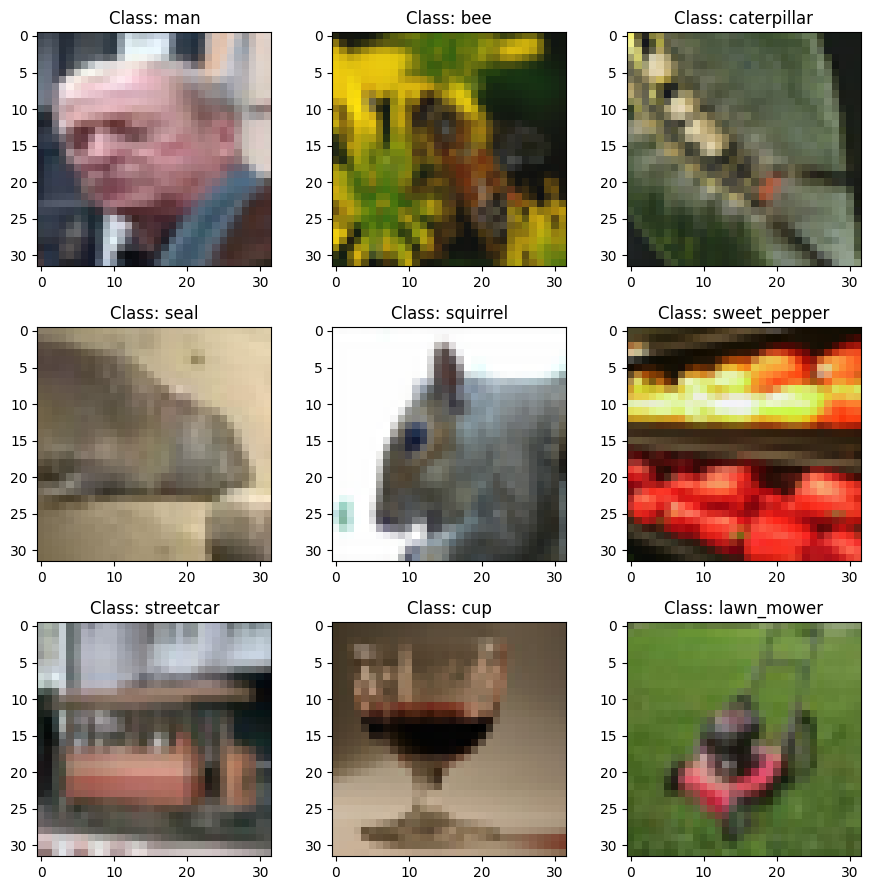

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)

classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
    'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange',
    'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy',
    'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal',
    'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar',
    'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

for i in range(9):
    plt.subplot(3, 3, i + 1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num])
    plt.title("Class: {}".format(classes[y_train[num][0]]))



plt.tight_layout()

#Reshaping data and dividing the pixels to change the range from [0,255] to [0.0, 1.0]

In [ ]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (50000, 32, 32, 3)
Testing matrix shape (10000, 32, 32, 3)


In [ ]:
nb_classes = 100
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()
input_shape=(32,32,3)
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
model.add(AveragePooling2D(pool_size=(2,2), strides=1))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
modelf = model.fit(X_train, y_train, batch_size=1000, epochs=2, verbose=1, validation_data=(X_test, y_test))

Epoch 1/2
50/50 [==============================] - 245s 5s/step - loss: 4.3971 - accuracy: 0.0565 - val_loss: 3.8546 - val_accuracy: 0.1495
Epoch 2/2
50/50 [==============================] - 239s 5s/step - loss: 3.7596 - accuracy: 0.1483 - val_loss: 3.4234 - val_accuracy: 0.2178


In [ ]:
model.save('cnn_model.keras')

In [ ]:
train_Loss = modelf.history['loss']
train_Acc = modelf.history['accuracy']

val_Loss = modelf.history['val_loss']
val_Acc = modelf.history['val_accuracy']

#Training results in terms of accuracy and loss


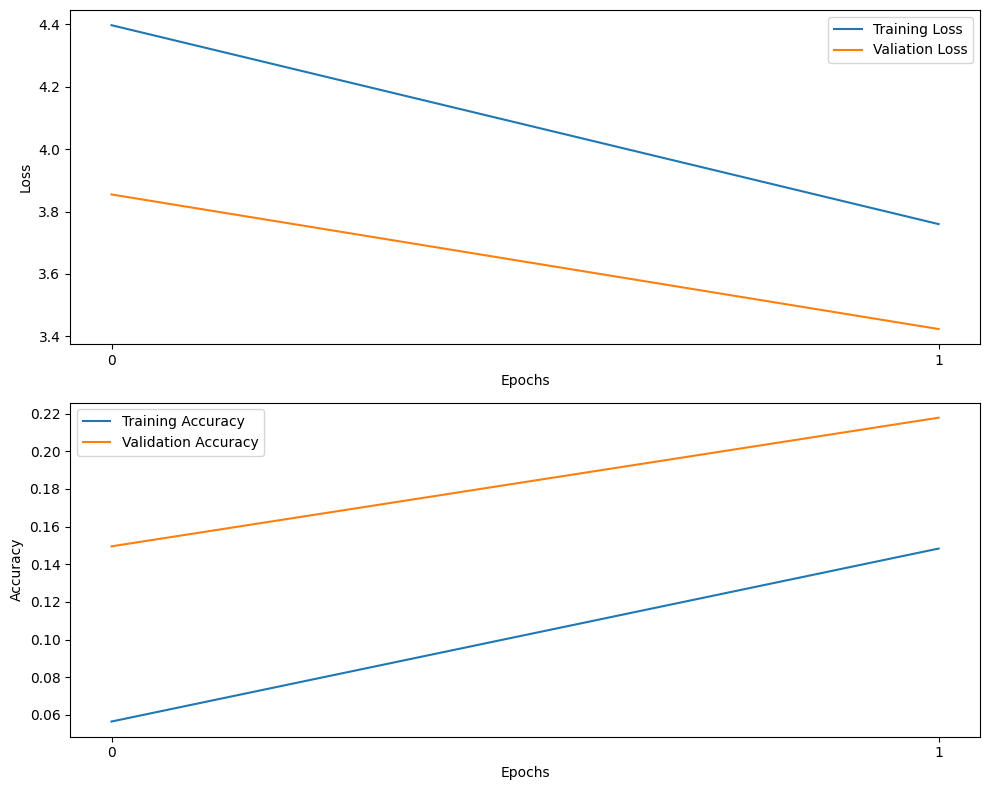

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)

xt = np.arange(0,2)

plt.subplot(2,1,1)
plt.plot(train_Loss, label='Training Loss')
plt.plot(val_Loss, label='Valiation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks(xt)
plt.legend()

plt.subplot(2,1,2)
plt.plot(train_Acc, label='Training Accuracy')
plt.plot(val_Acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(xt)
plt.legend()
plt.tight_layout()

#Printing out the Confusion Matrix

313/313 [==============================] - 24s 75ms/step


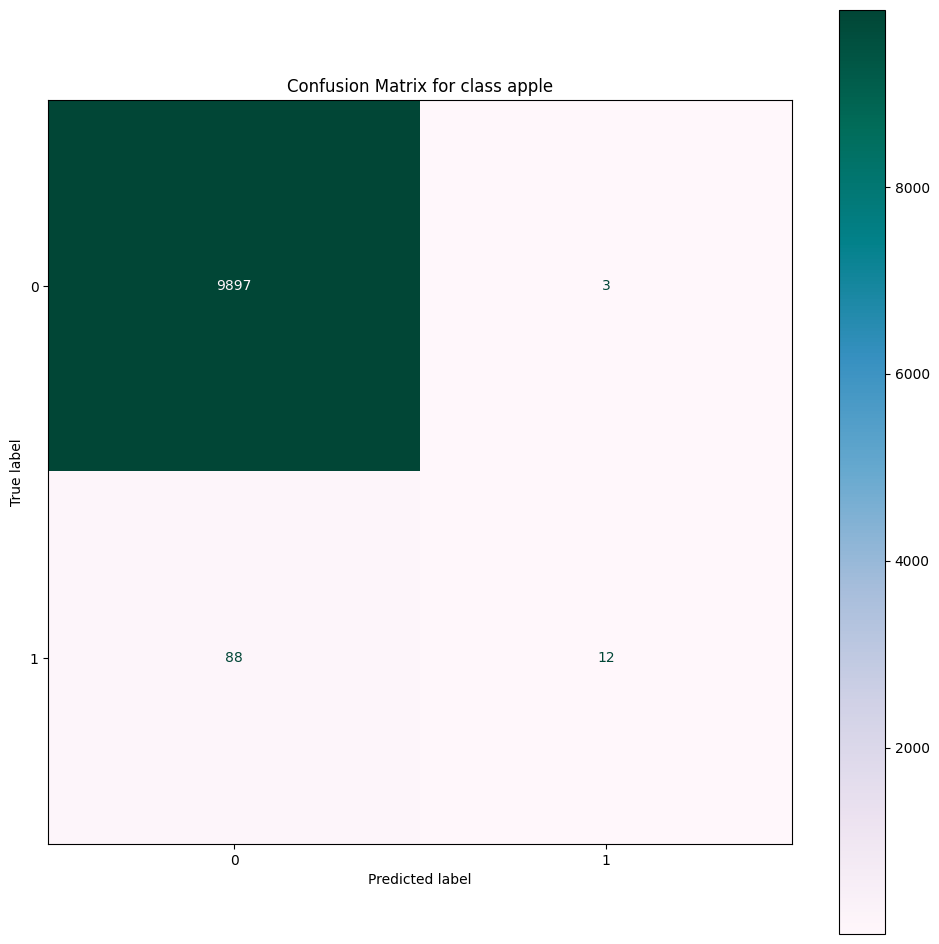

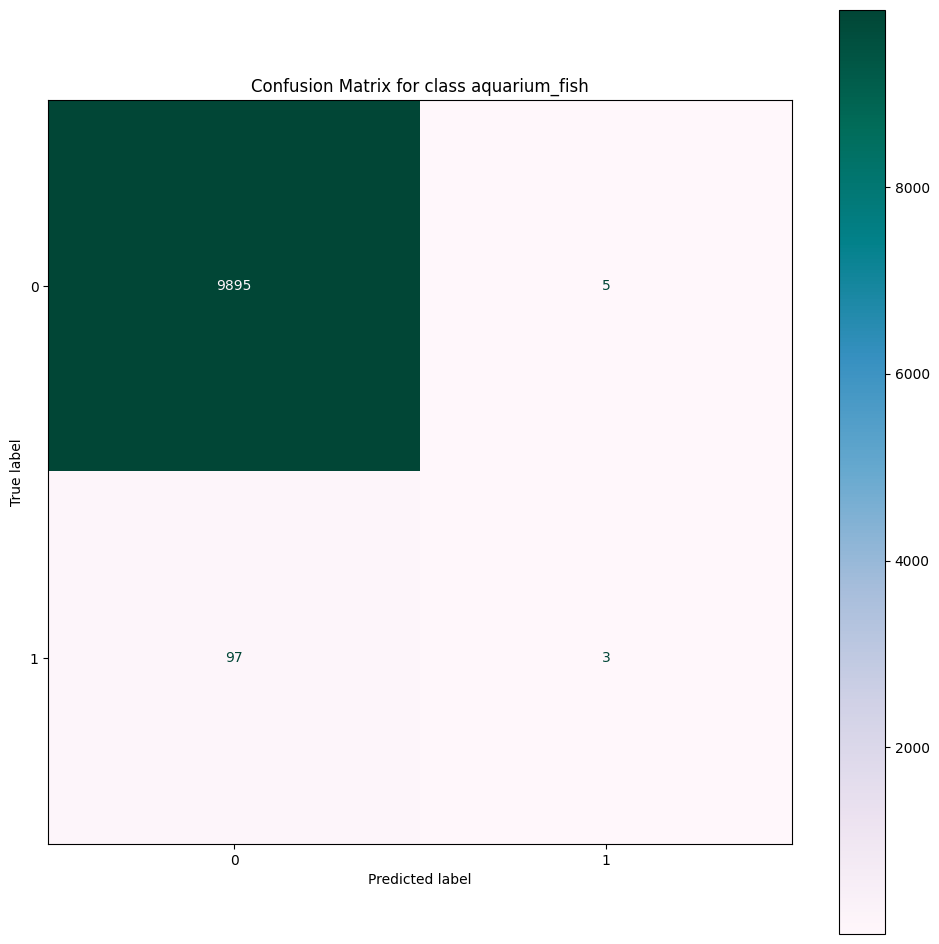

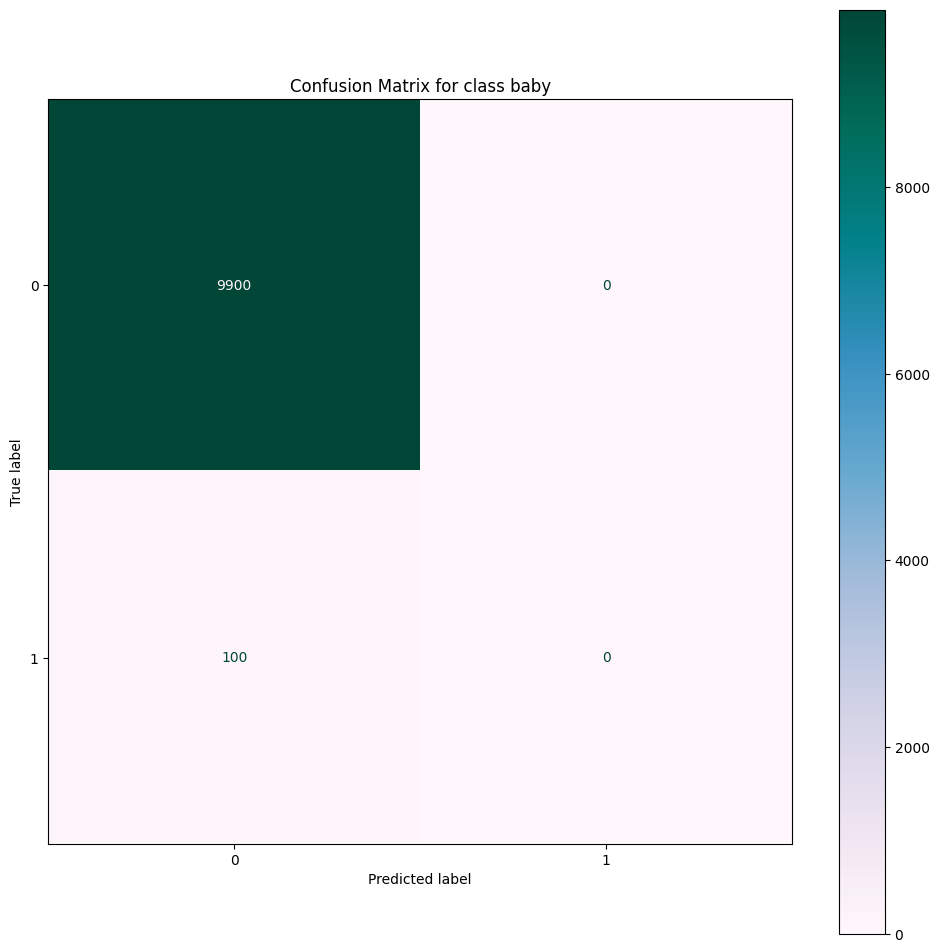

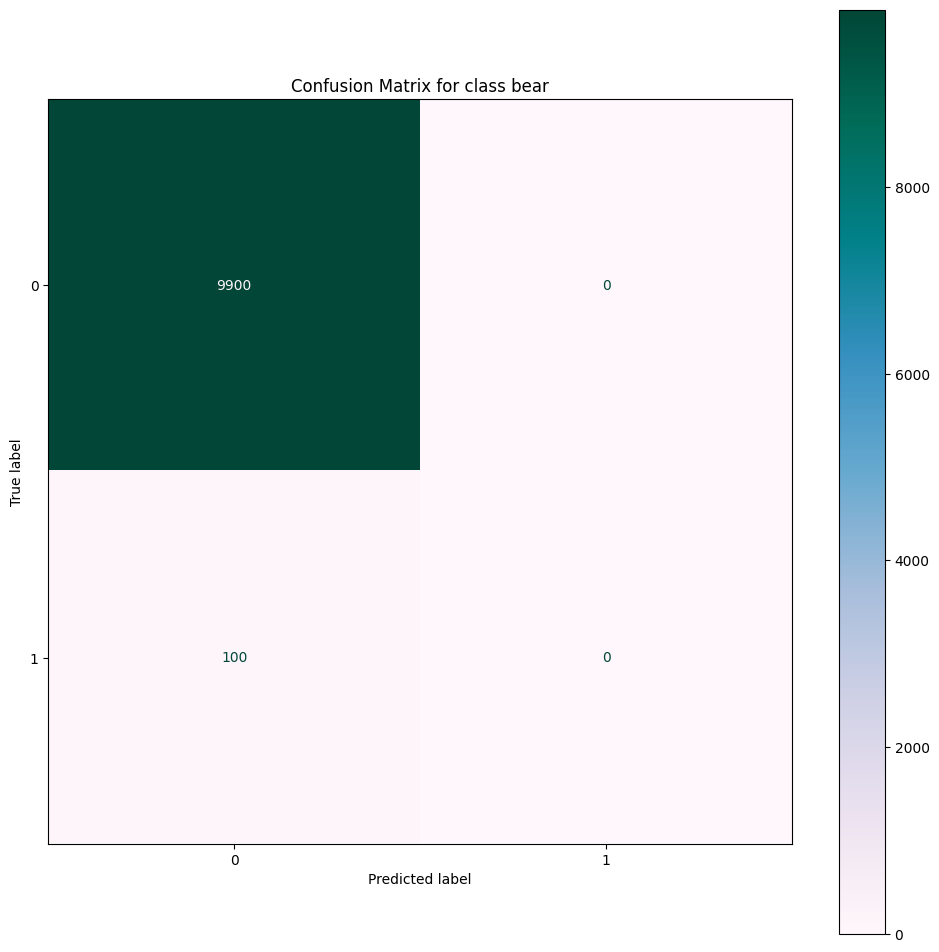

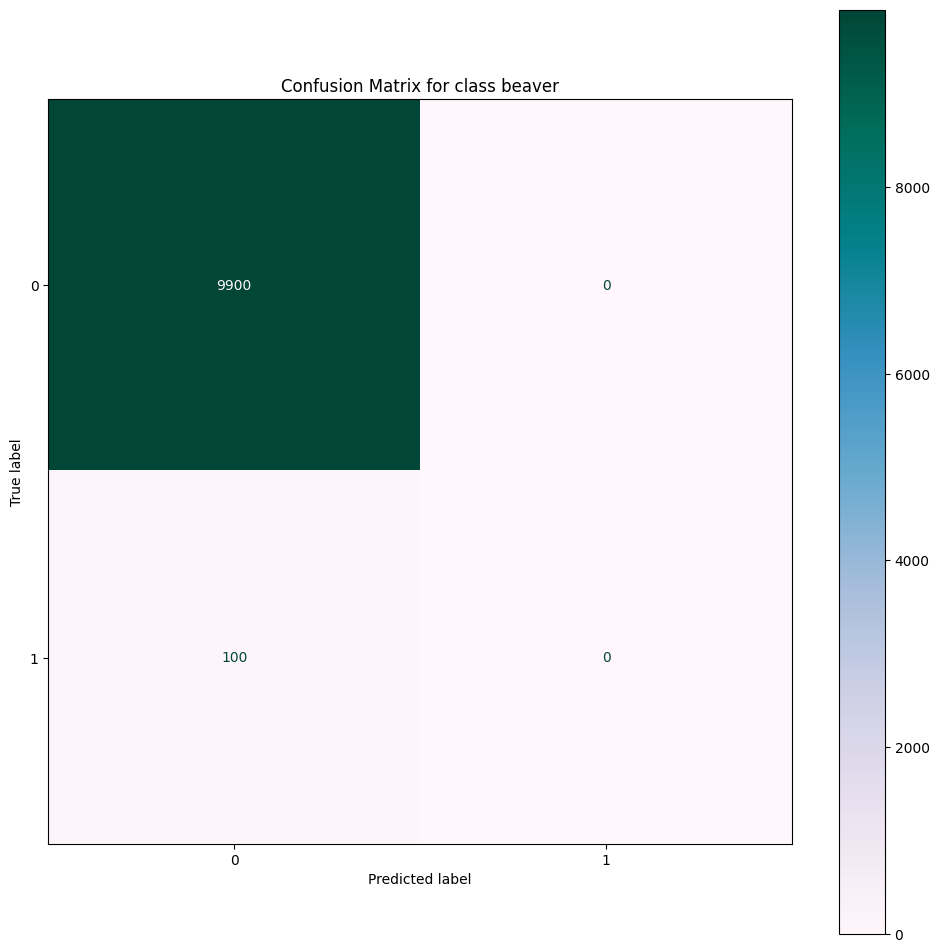

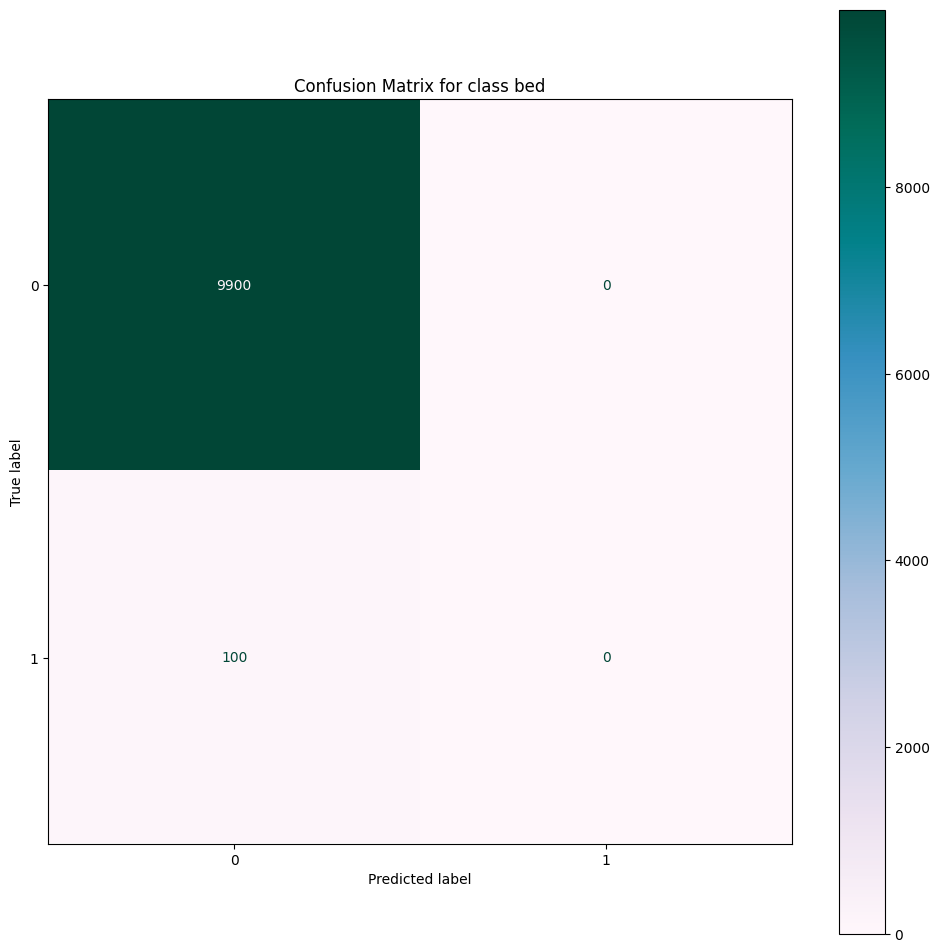

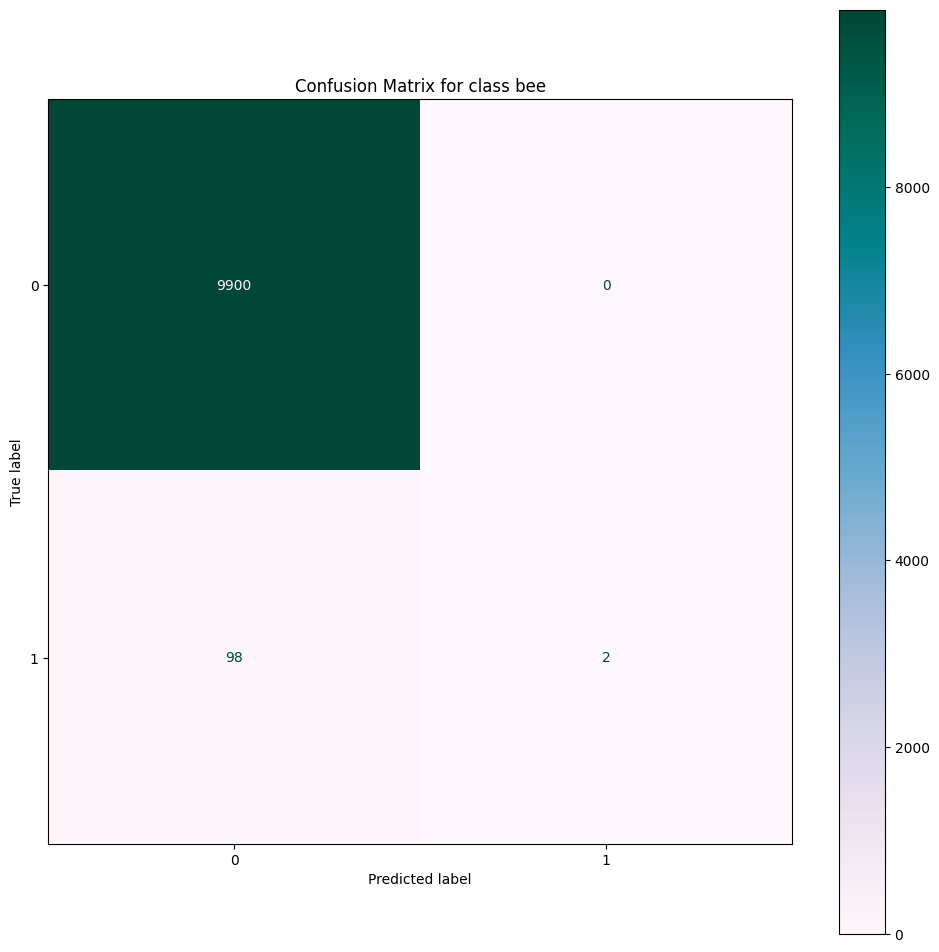

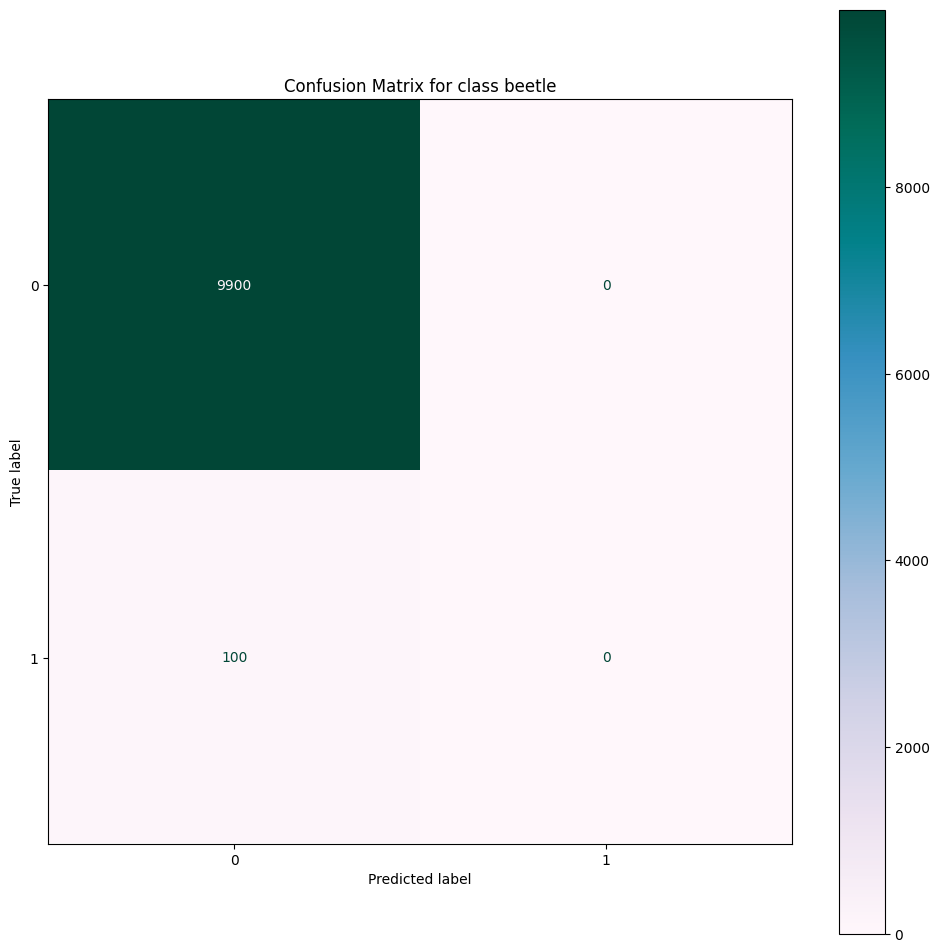

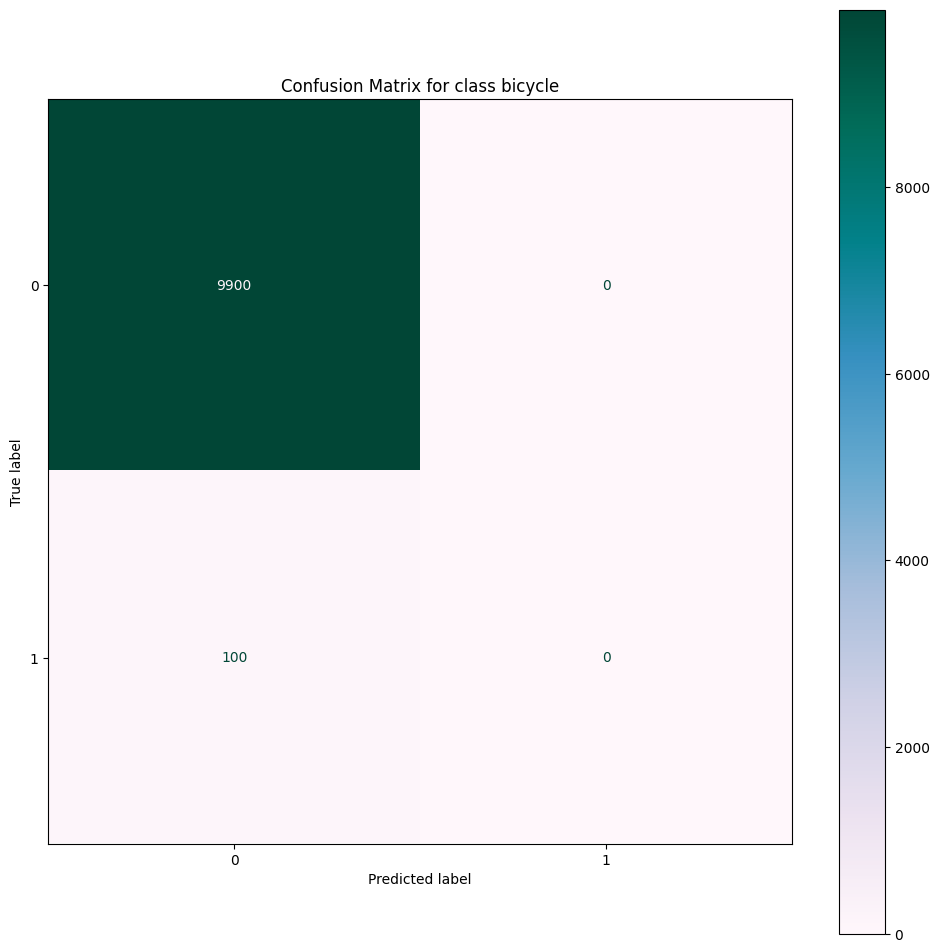

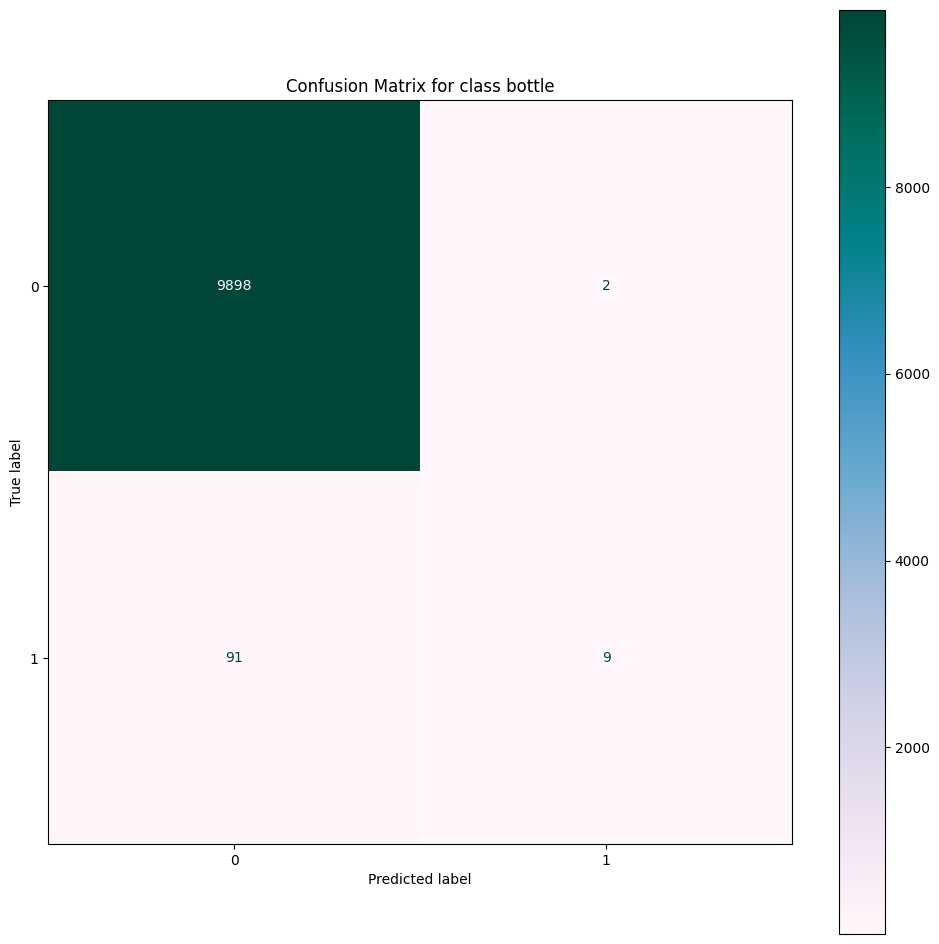

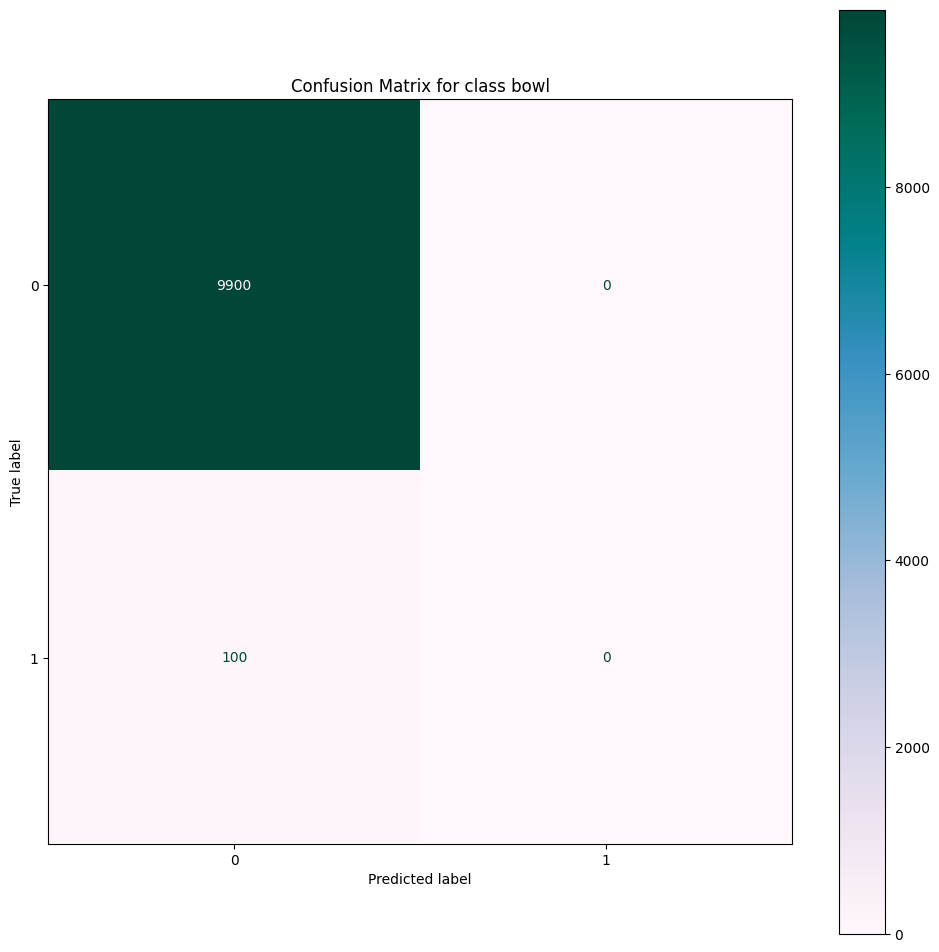

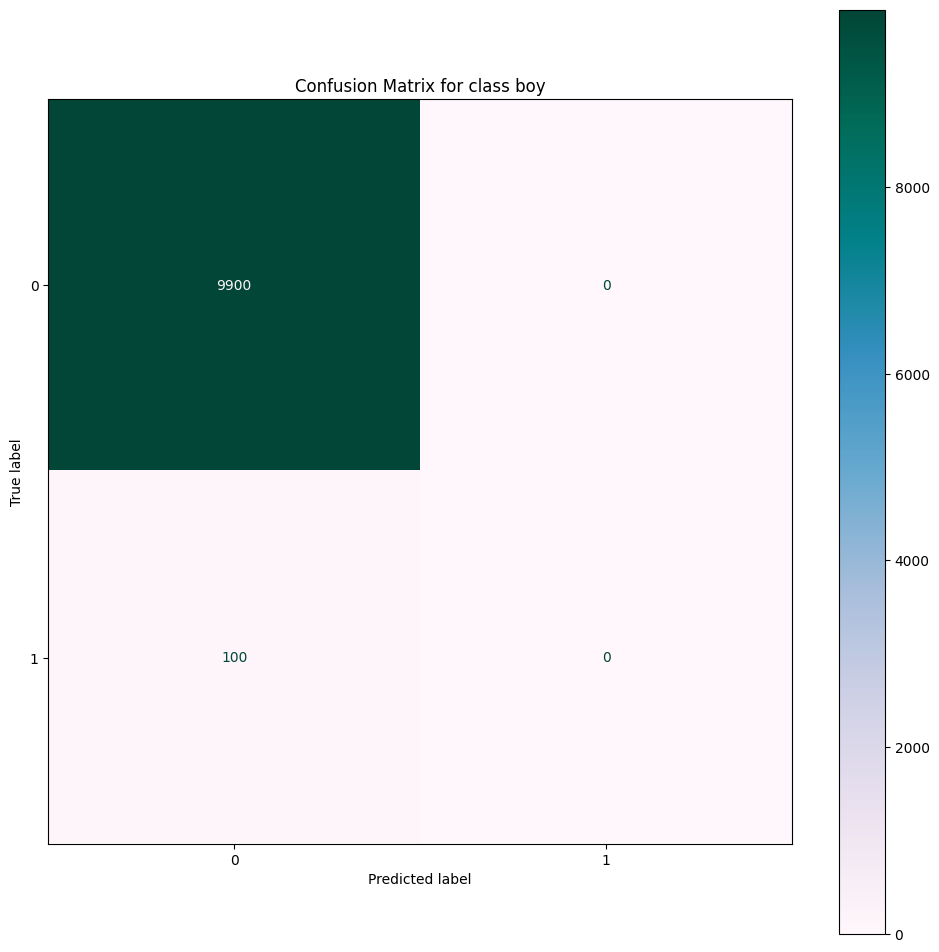

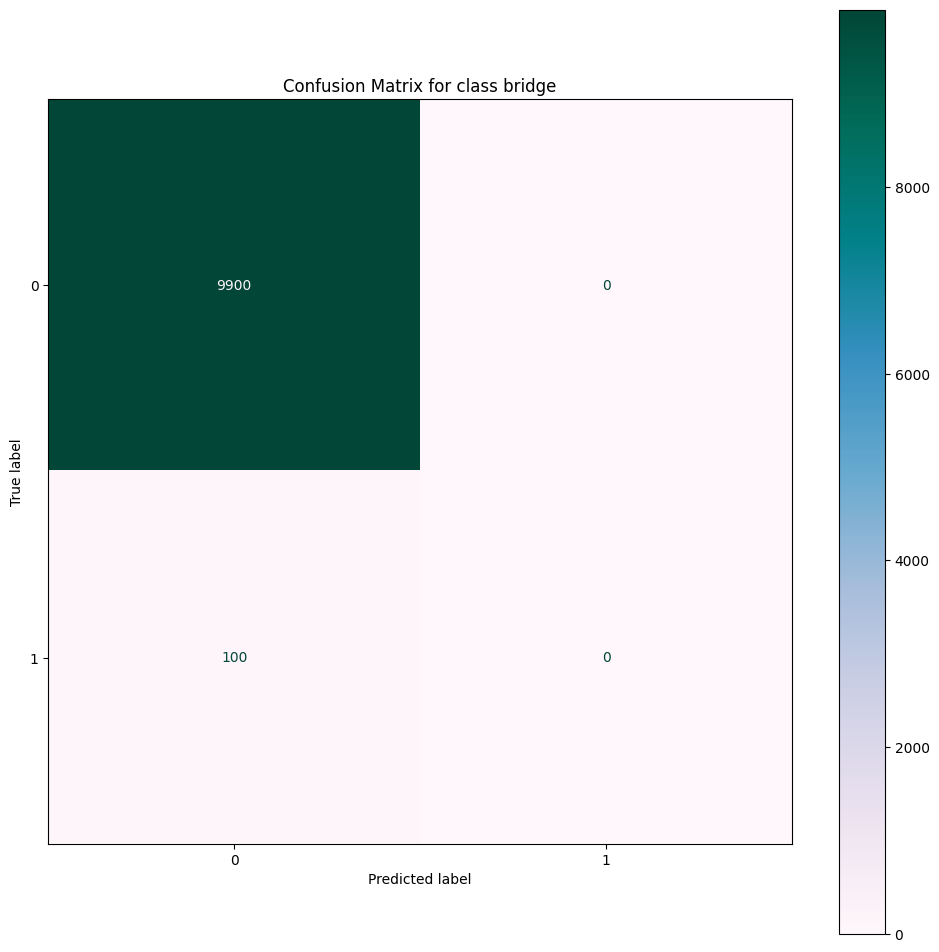

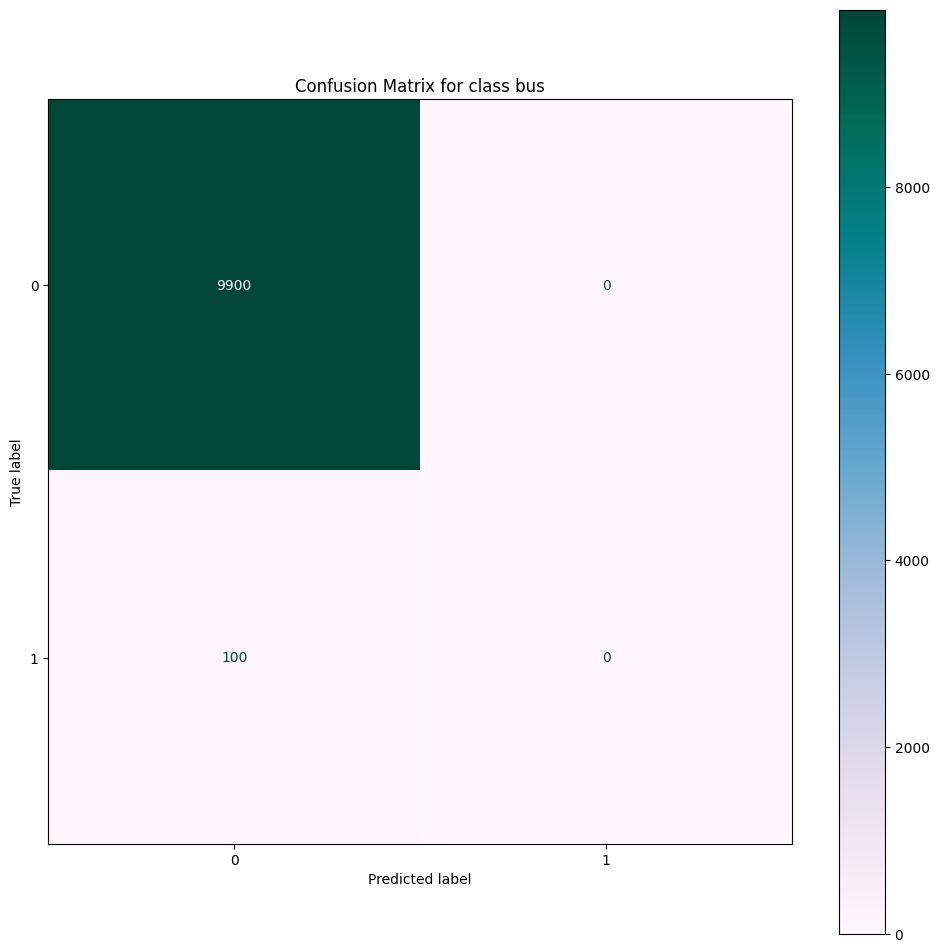

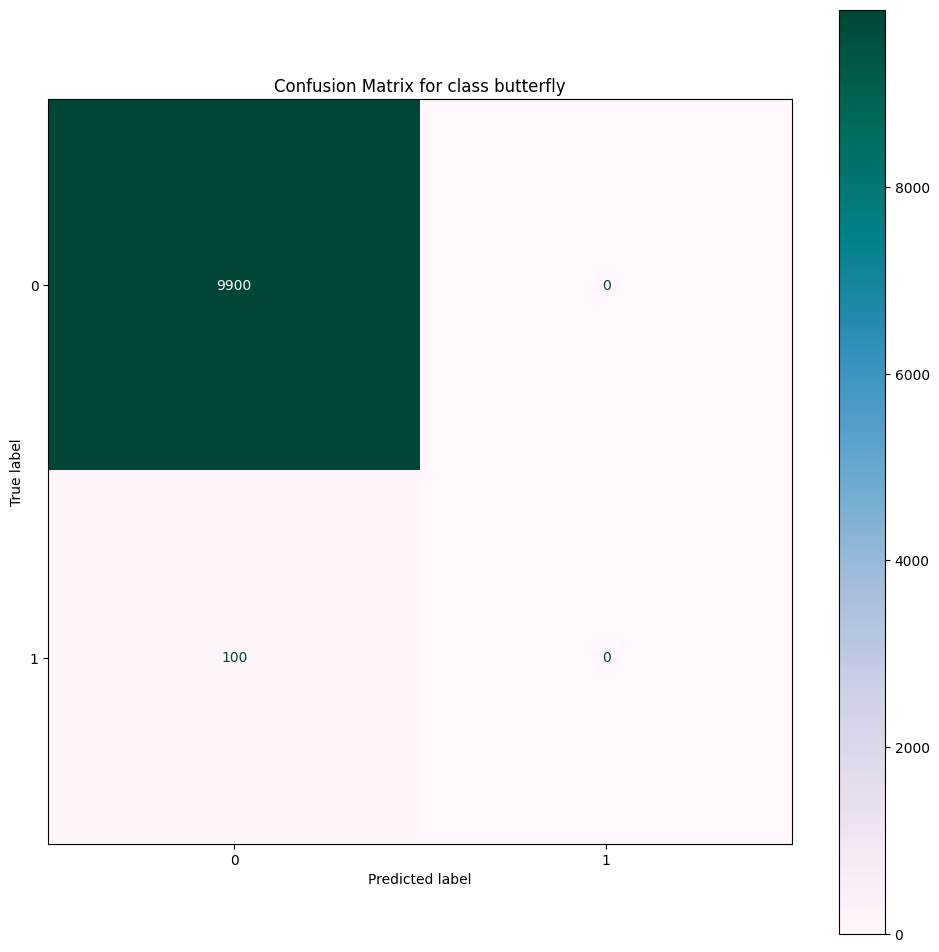

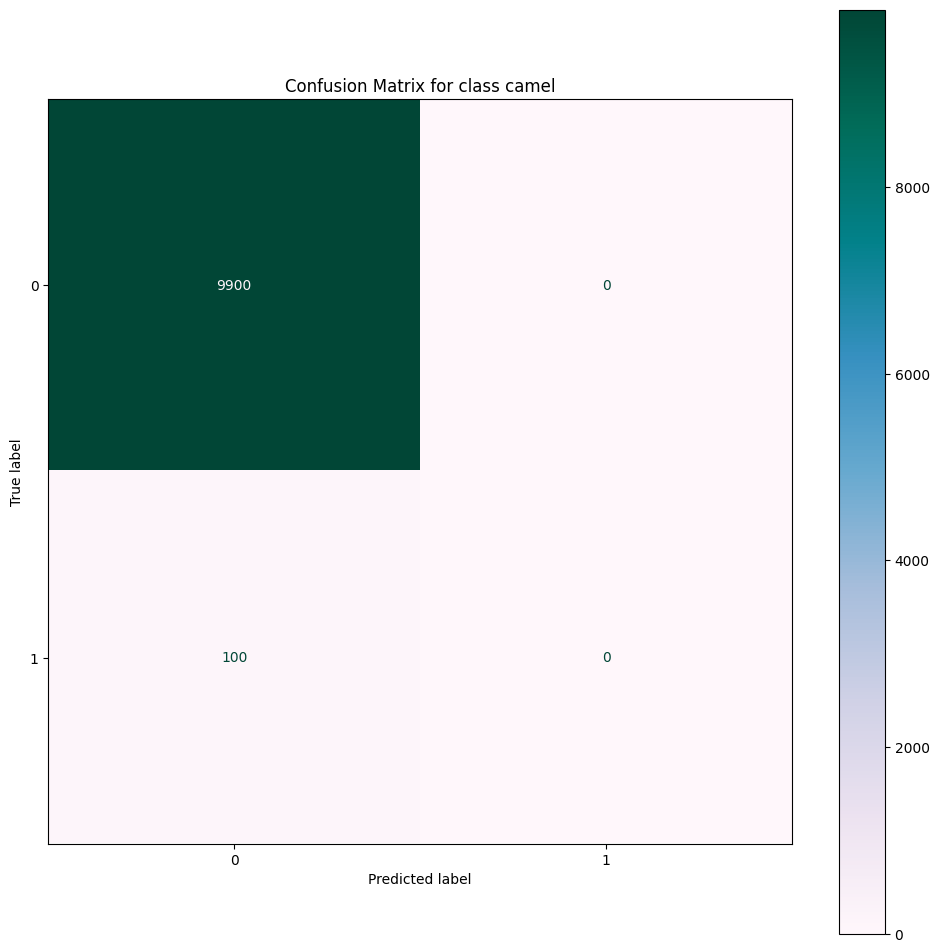

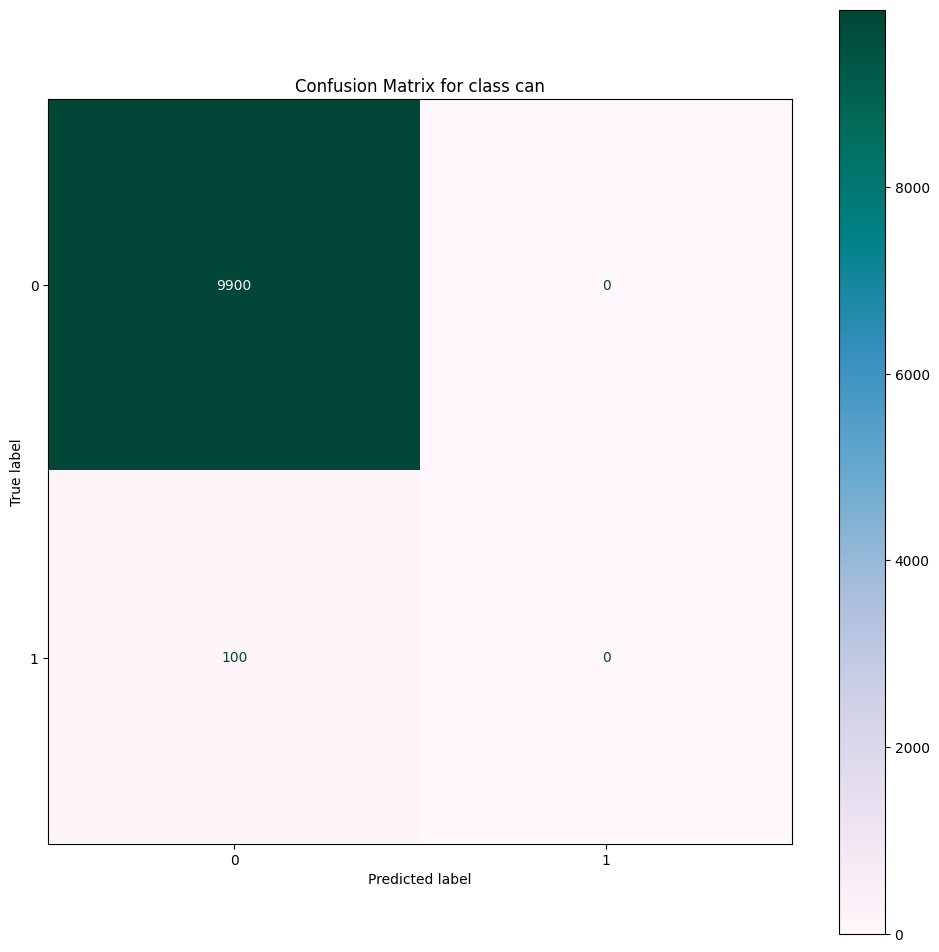

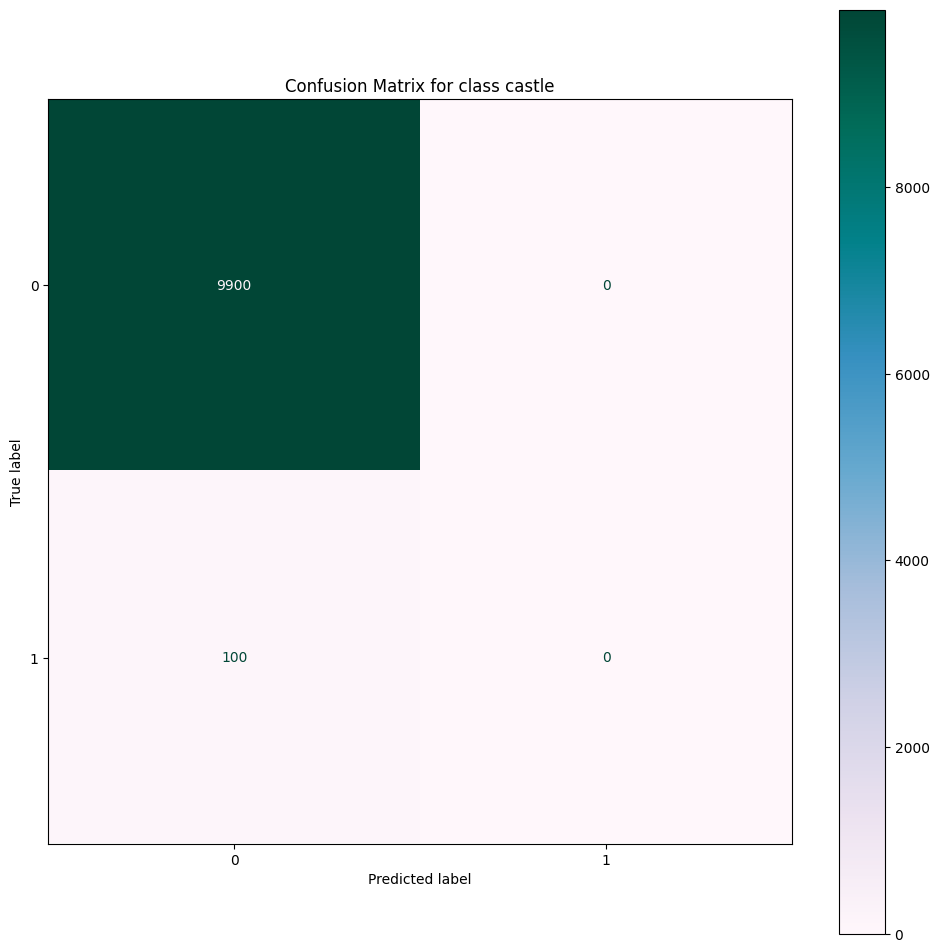

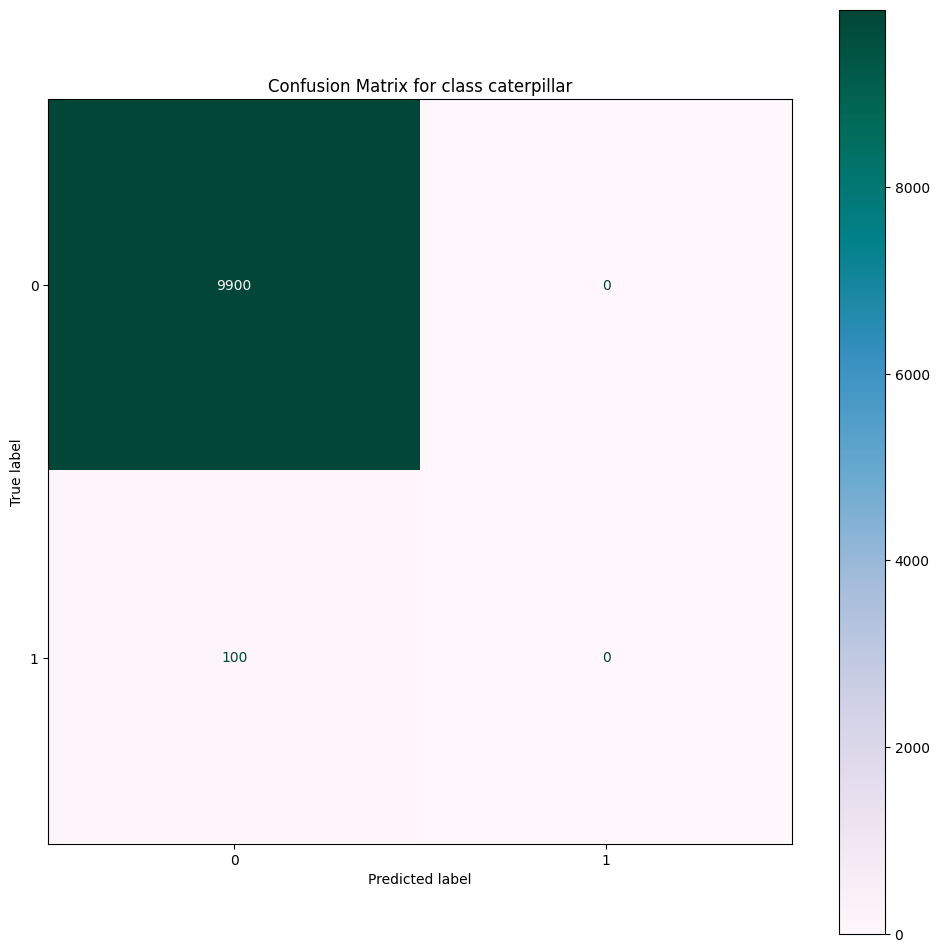

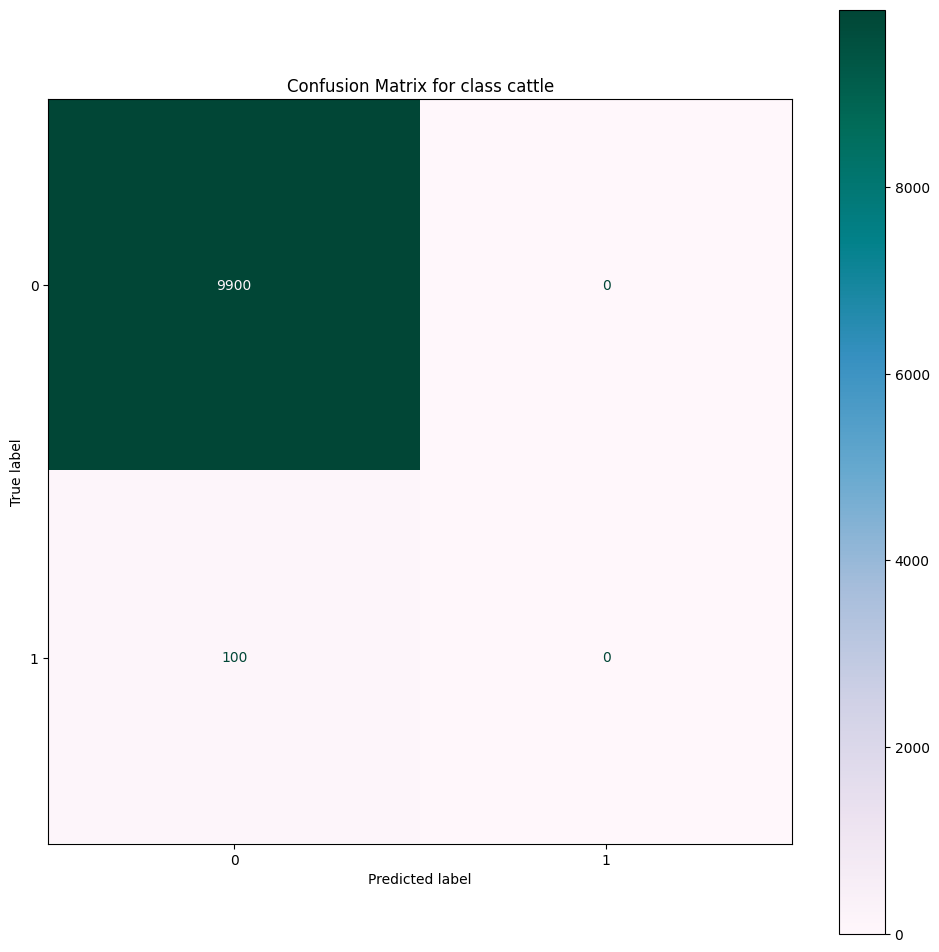

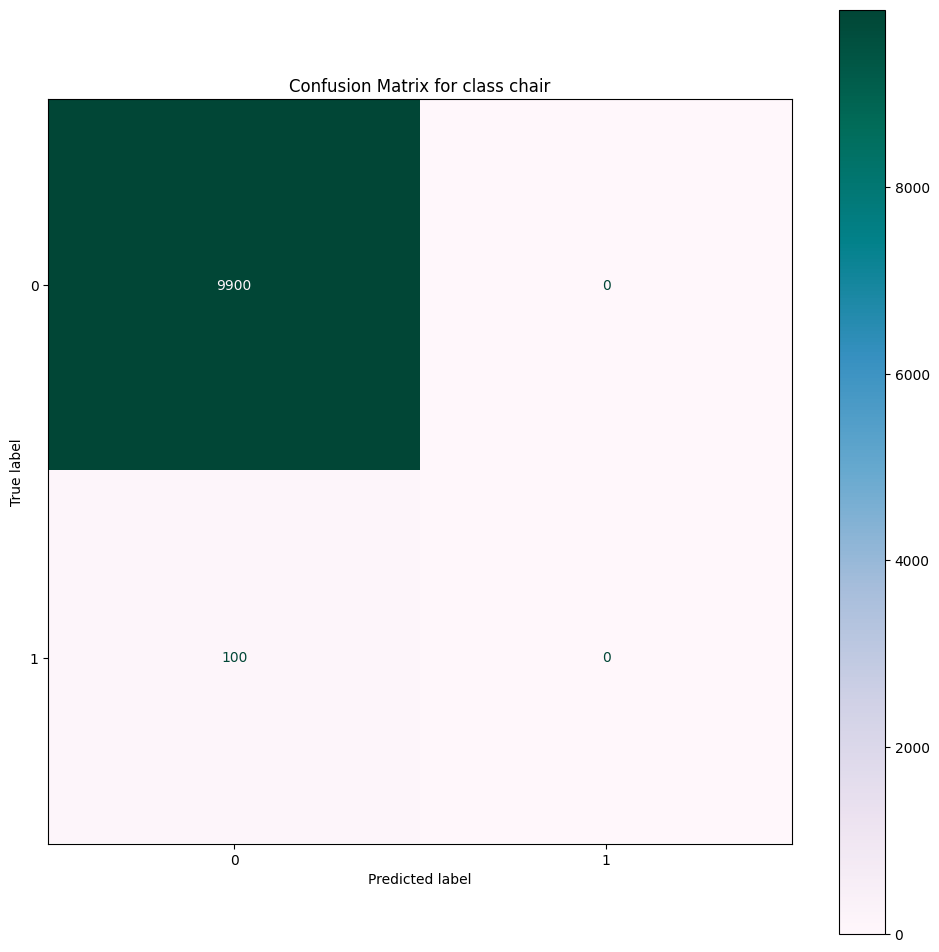

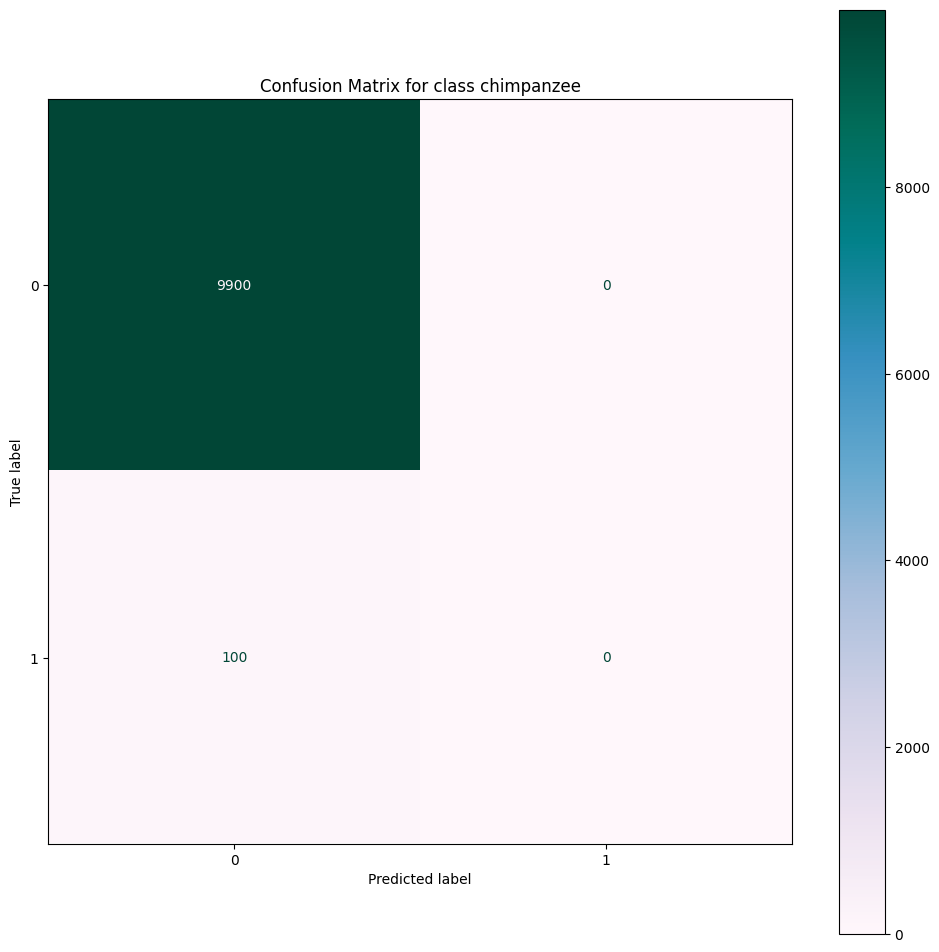

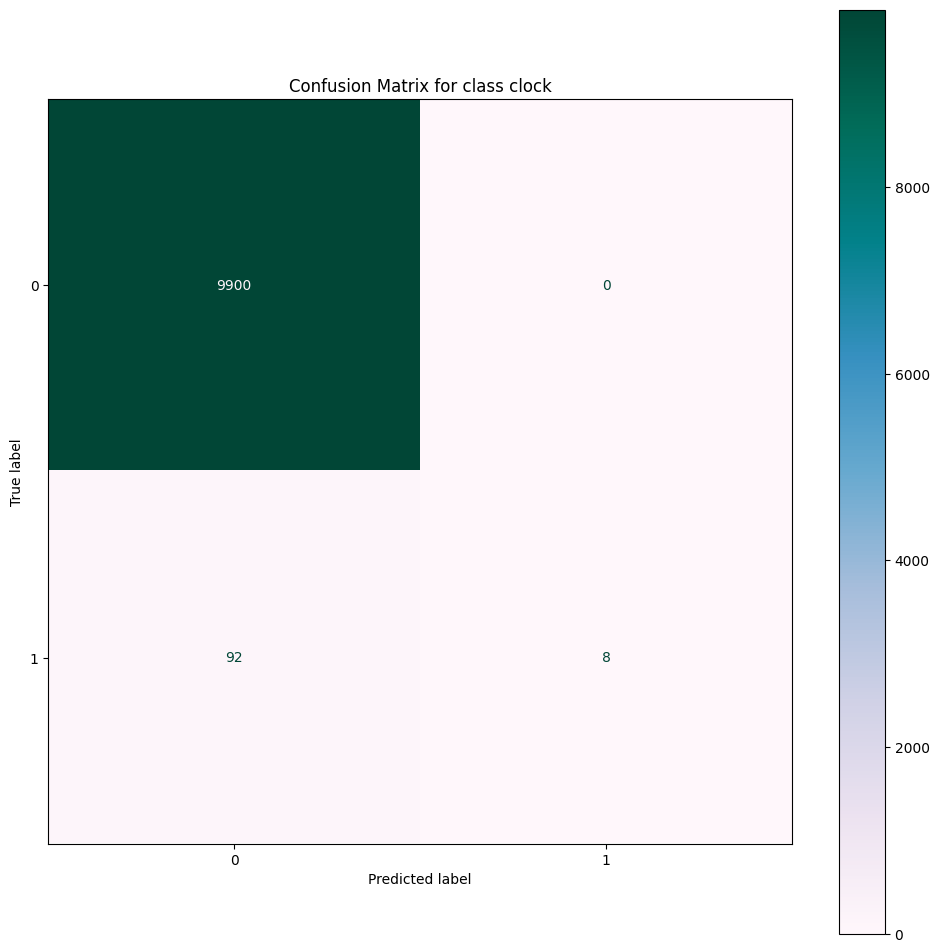

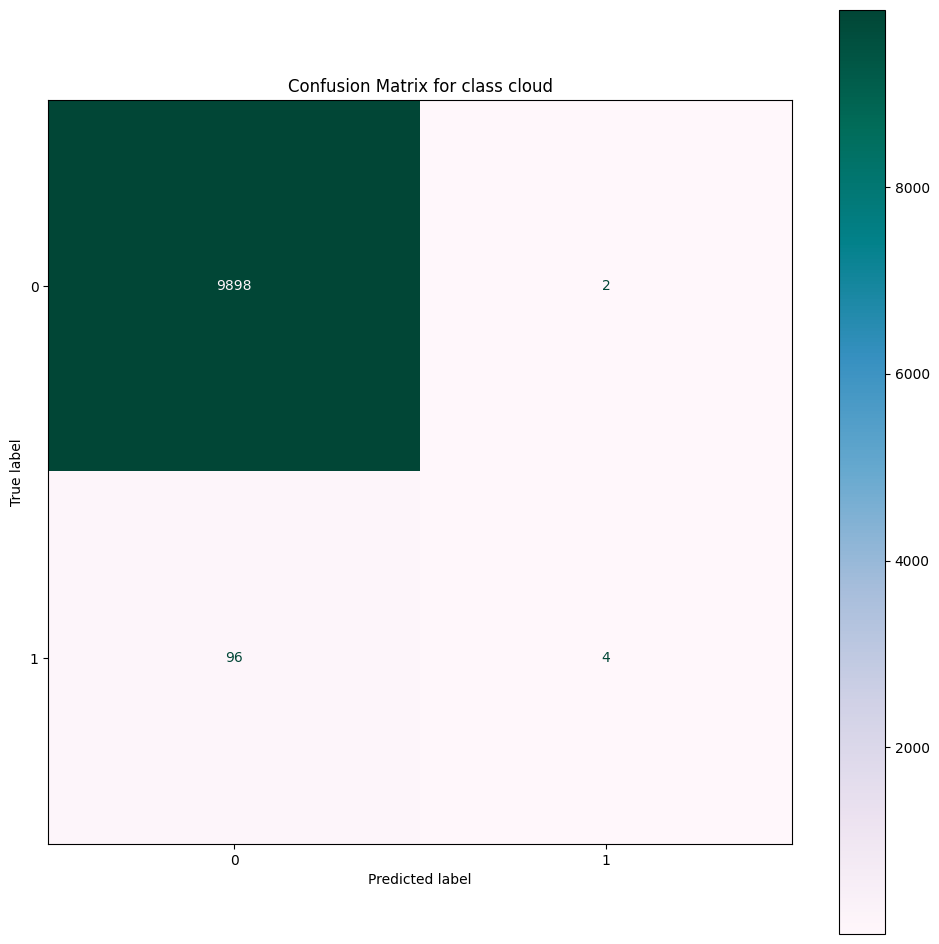

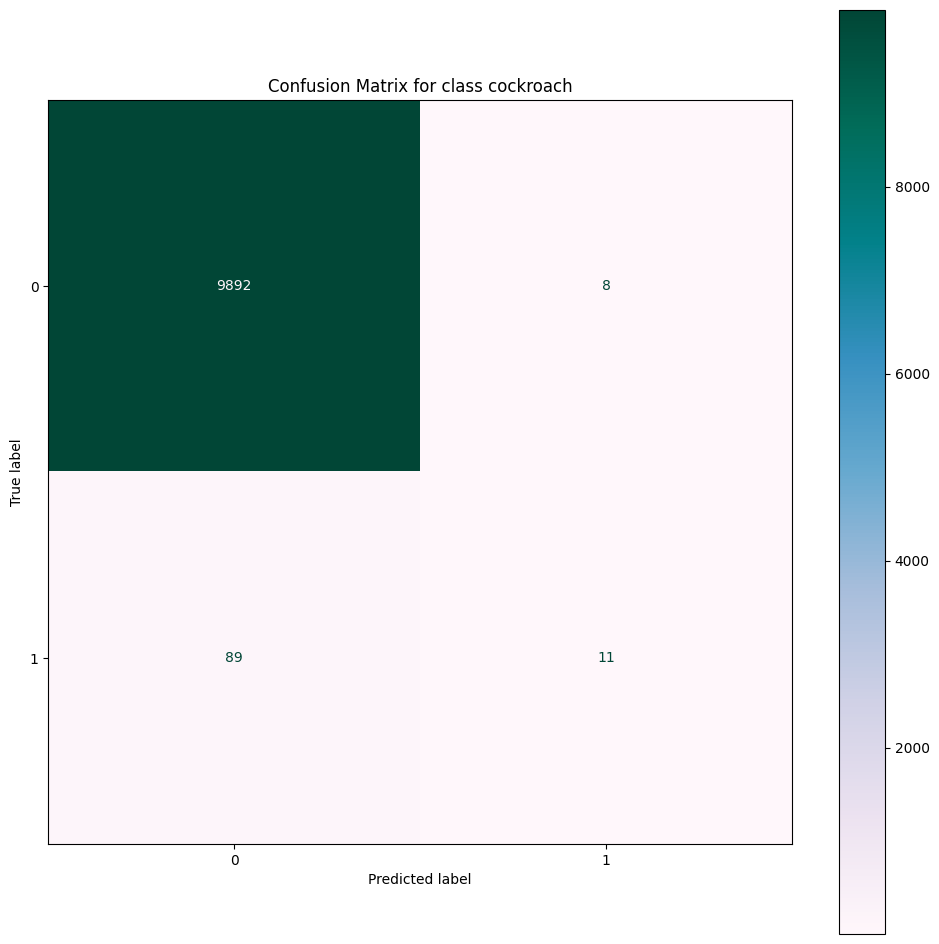

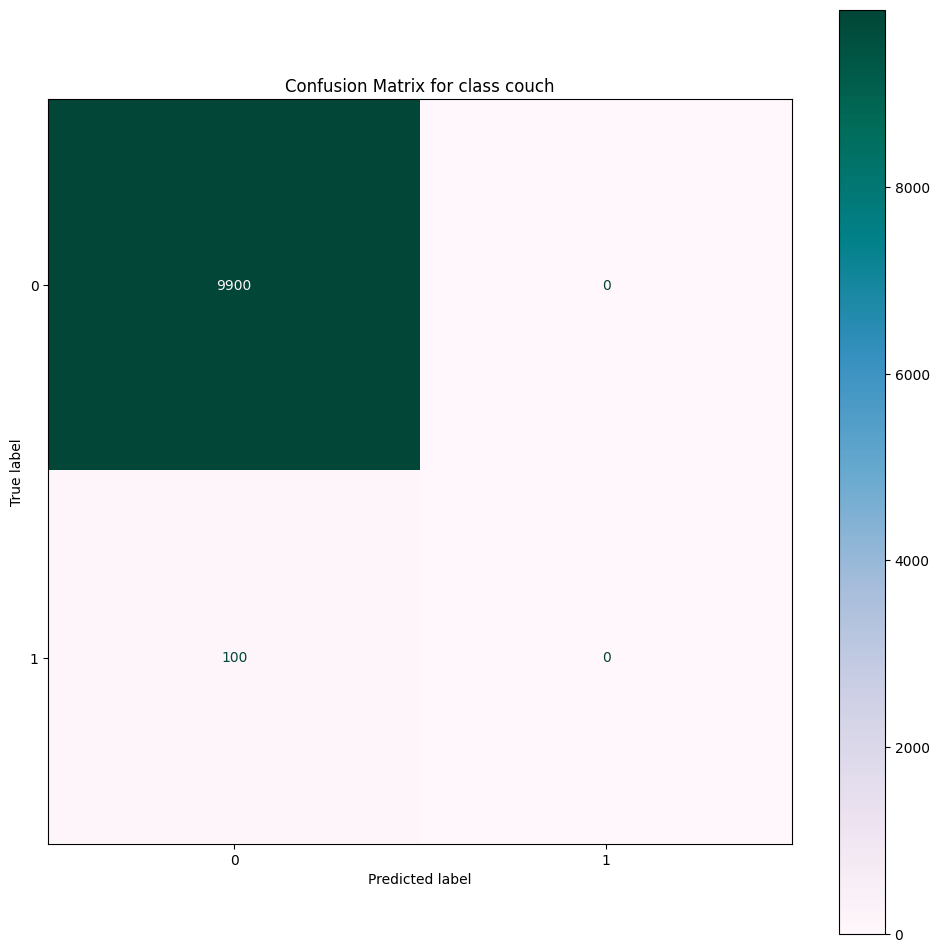

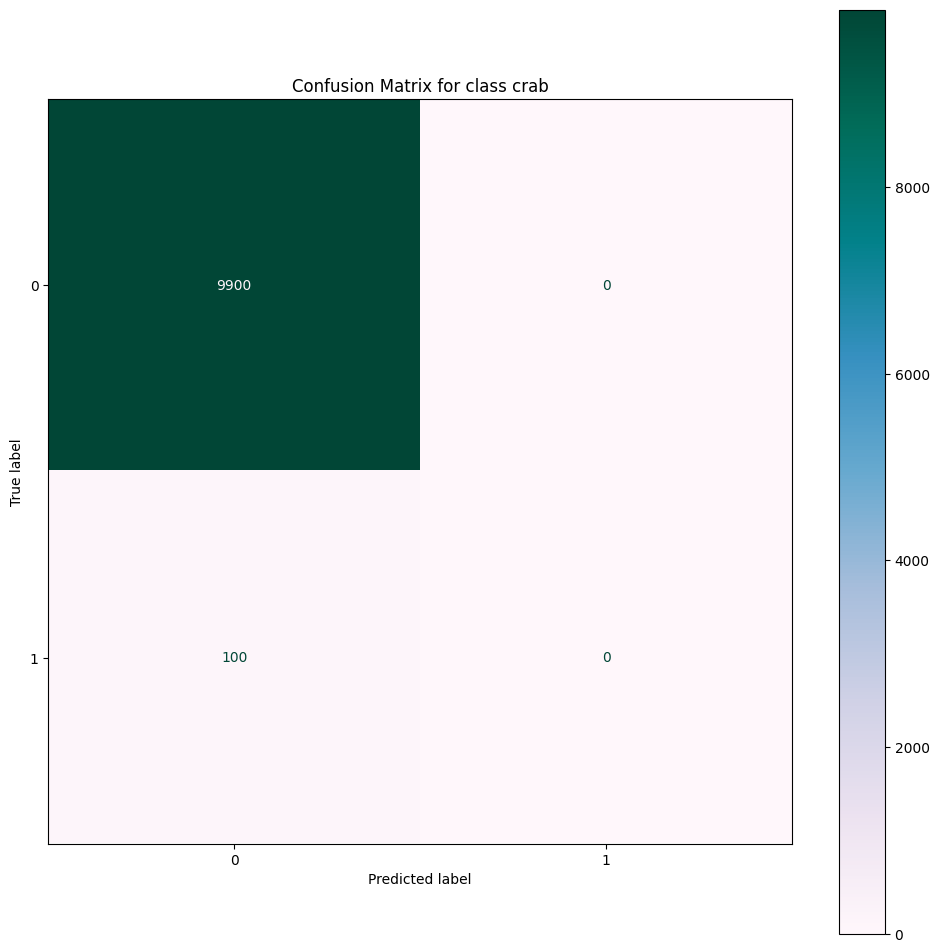

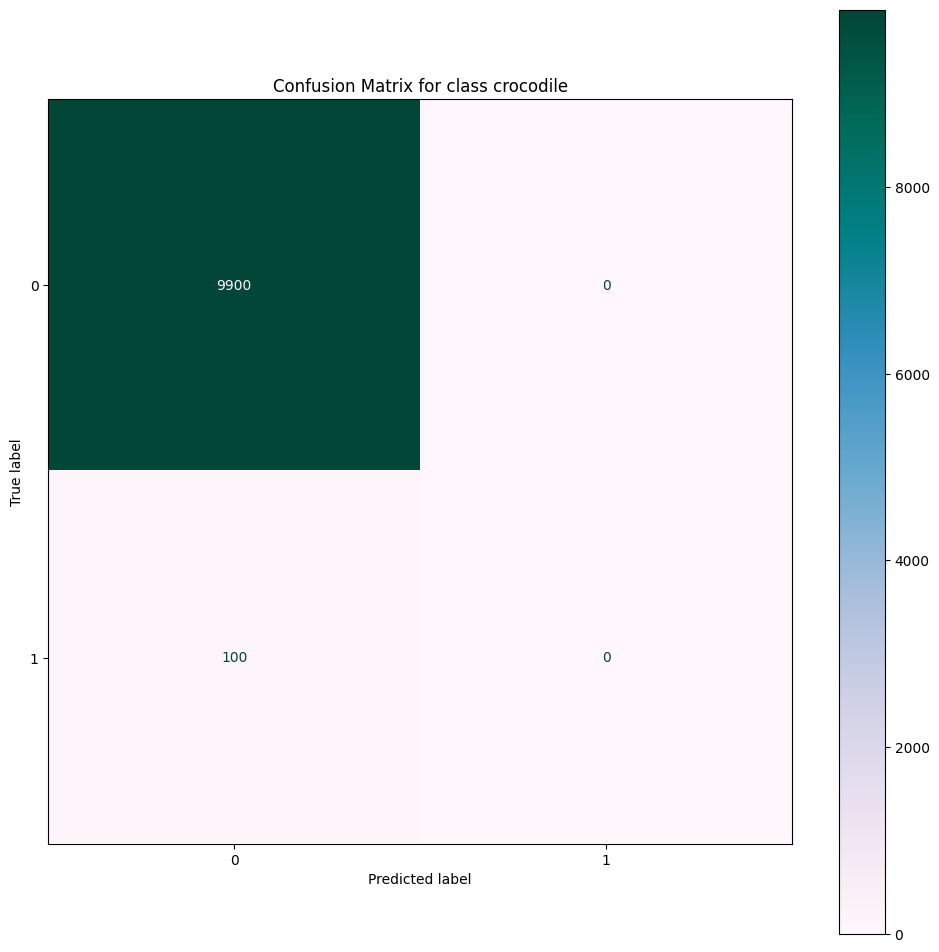

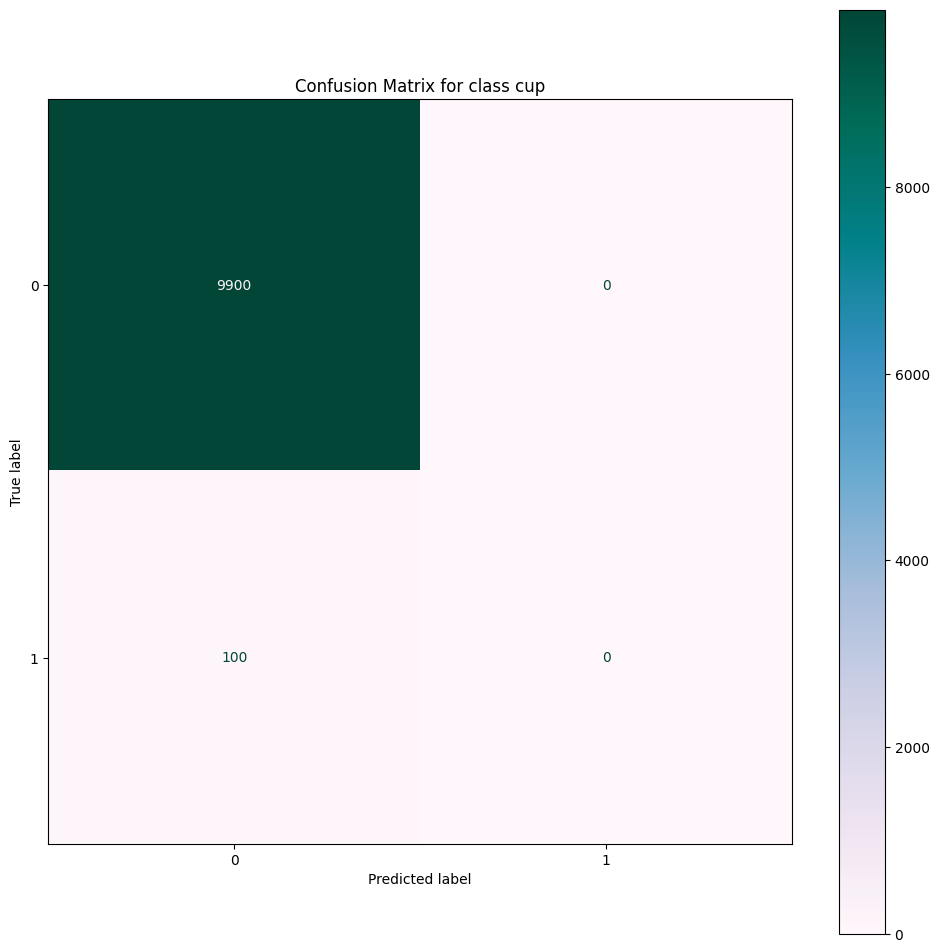

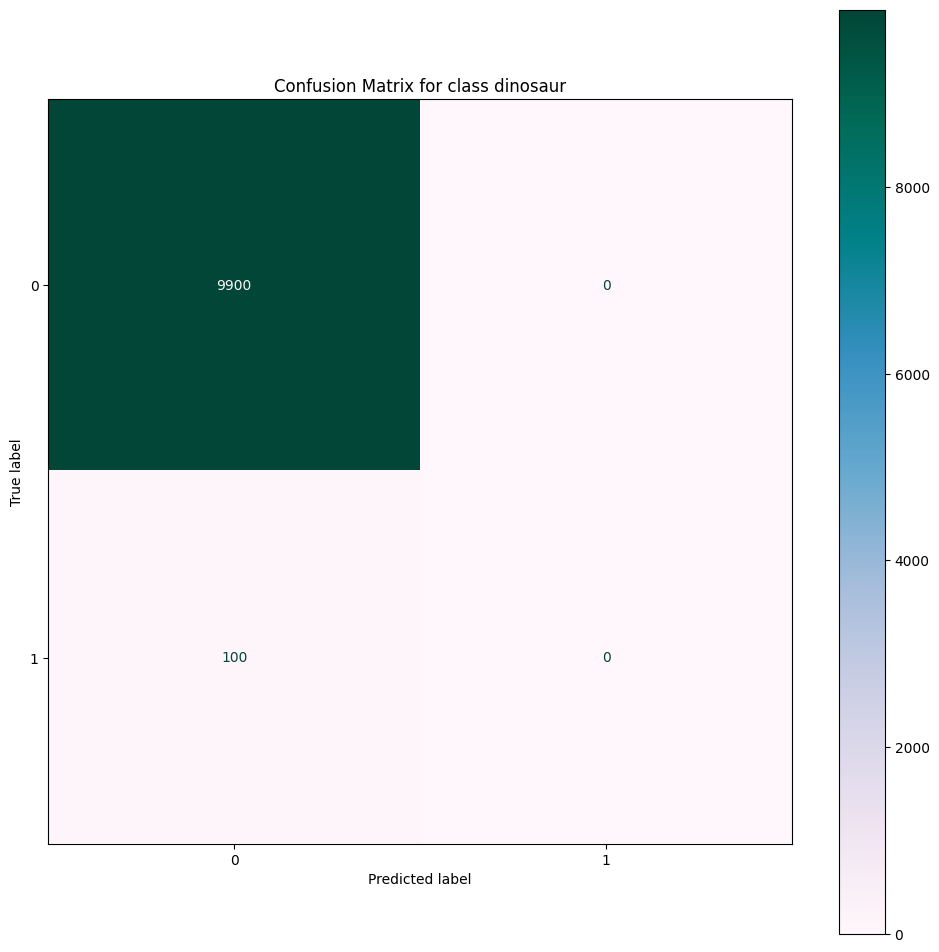

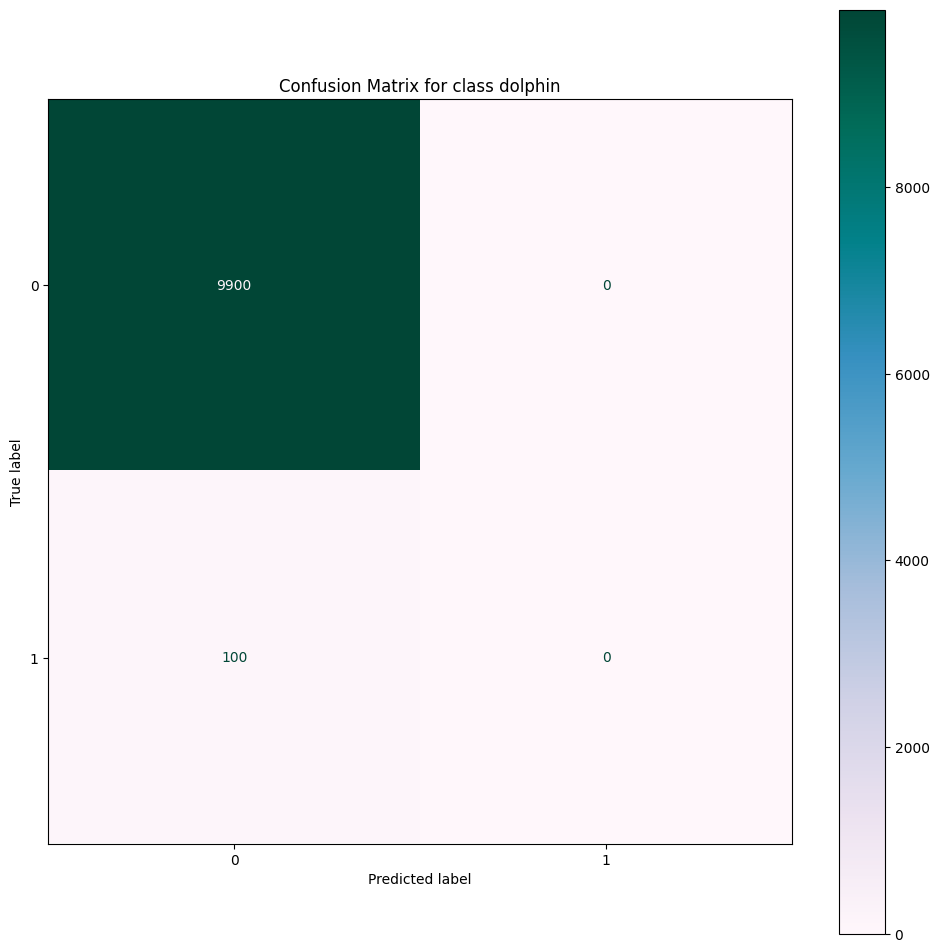

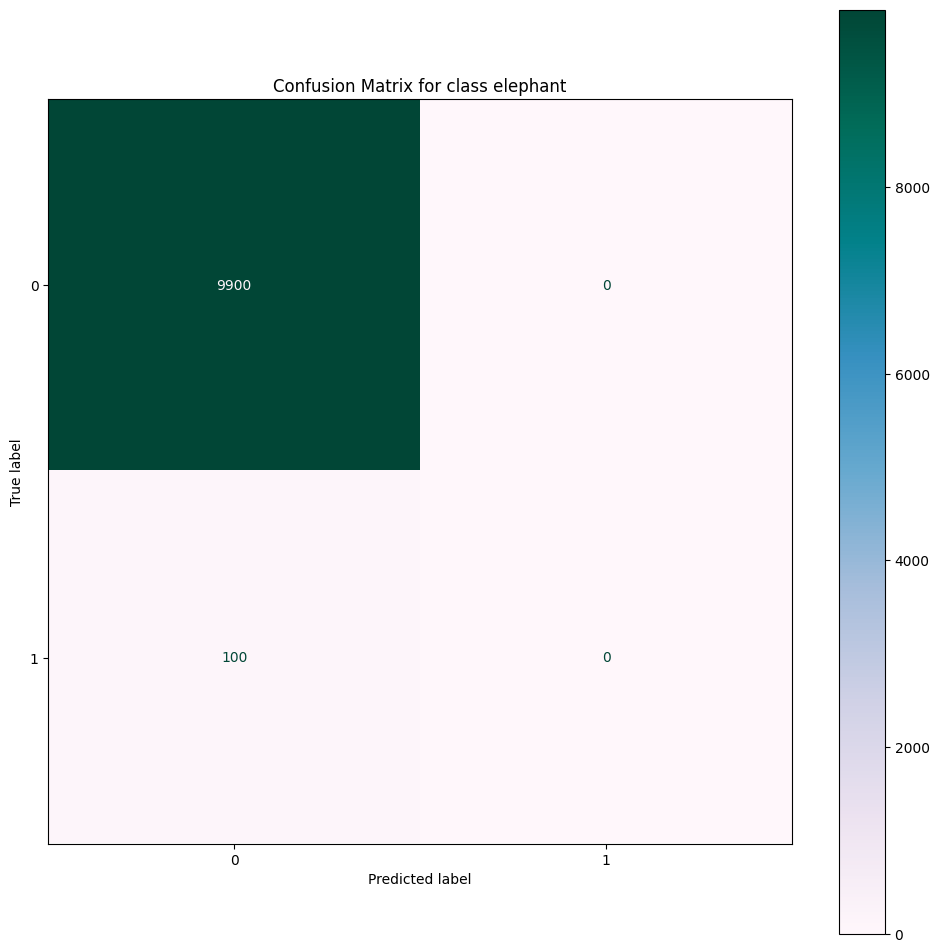

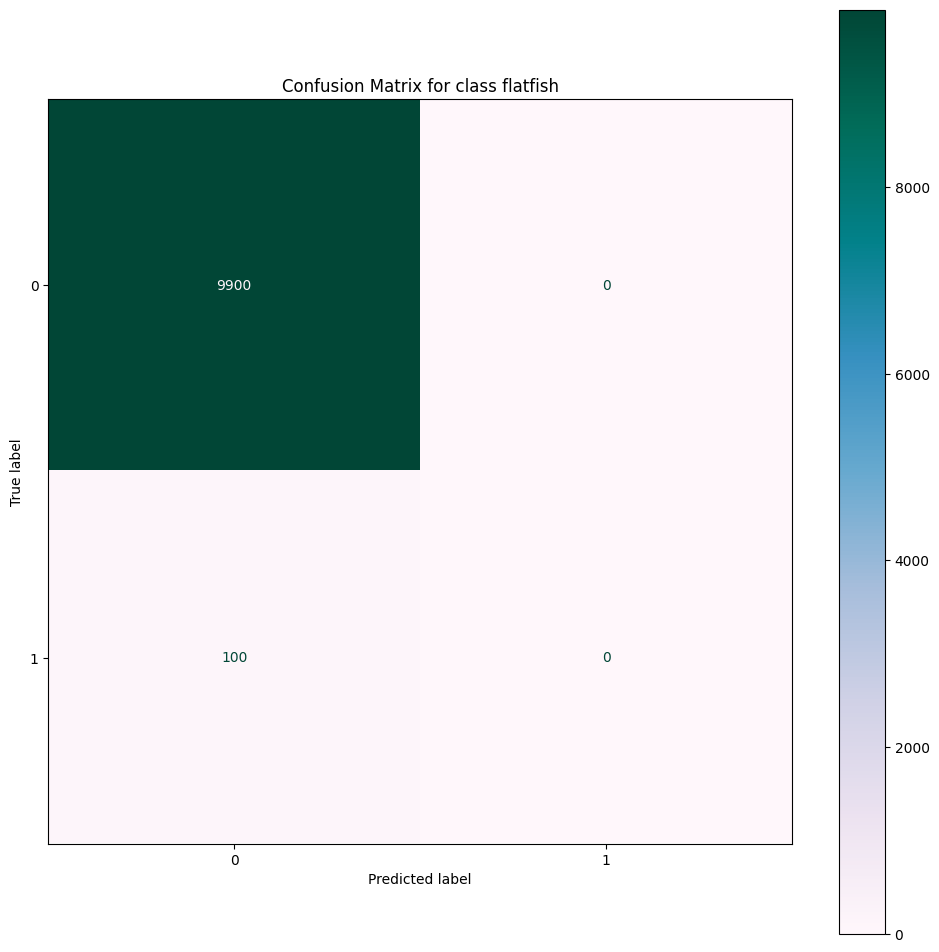

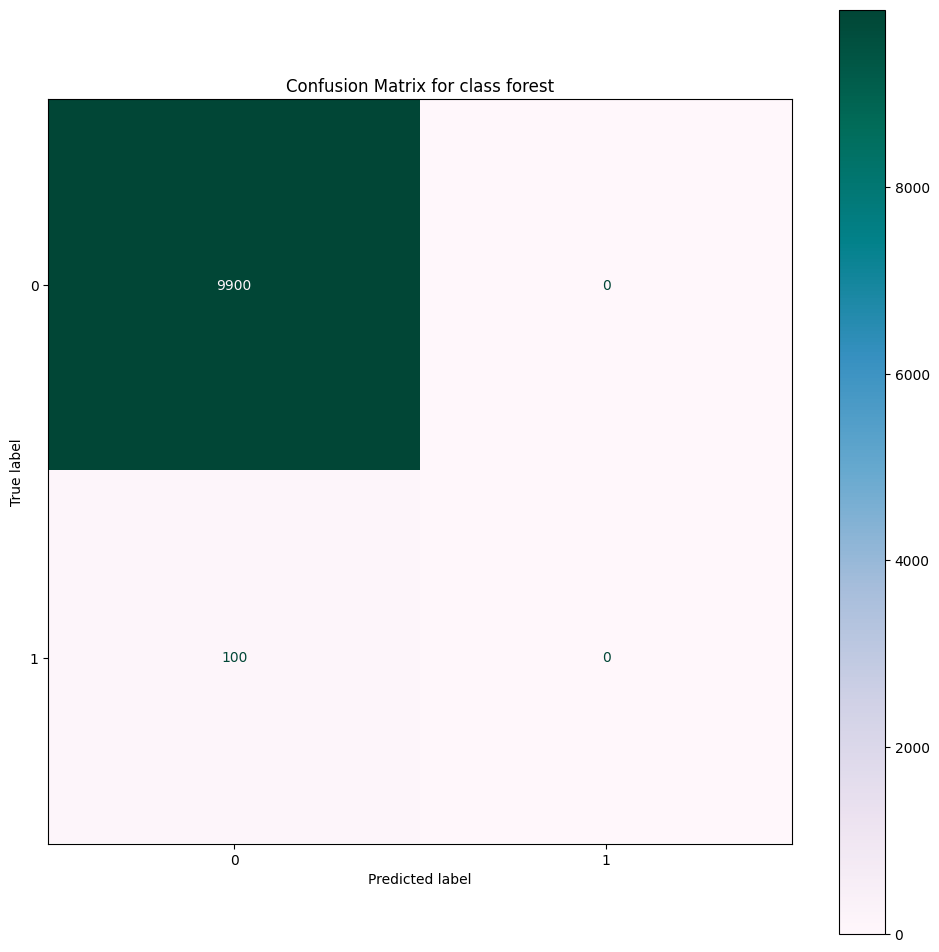

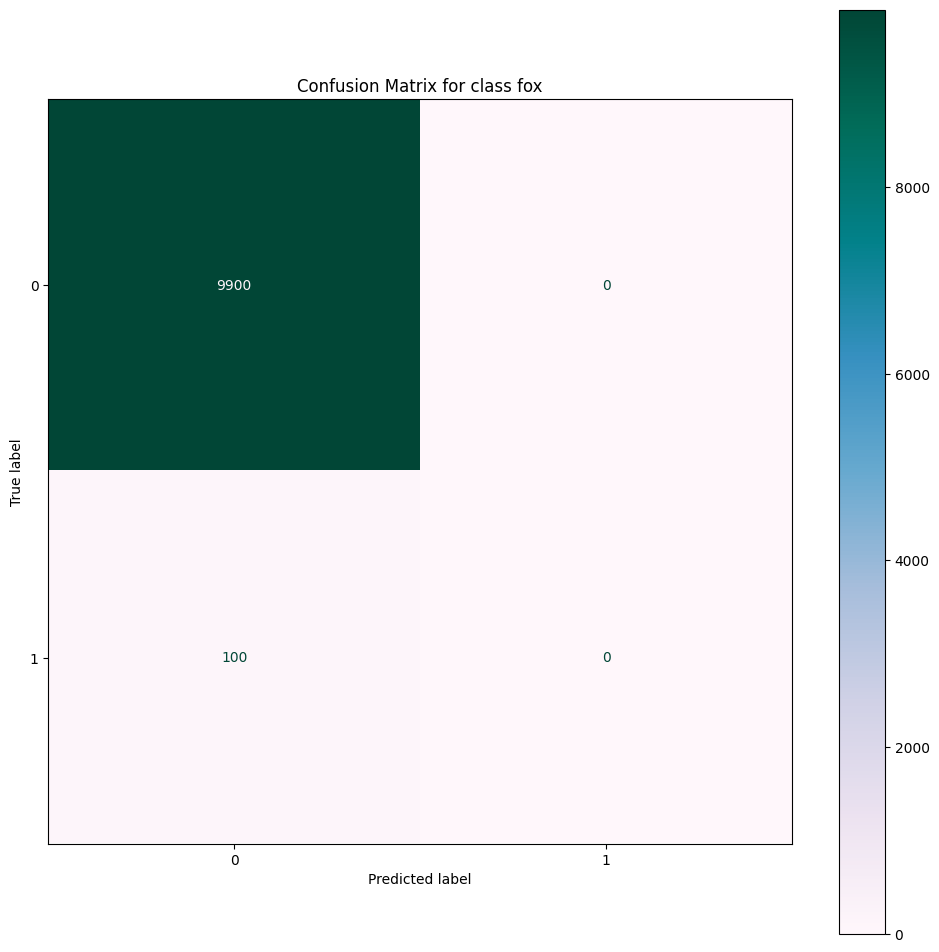

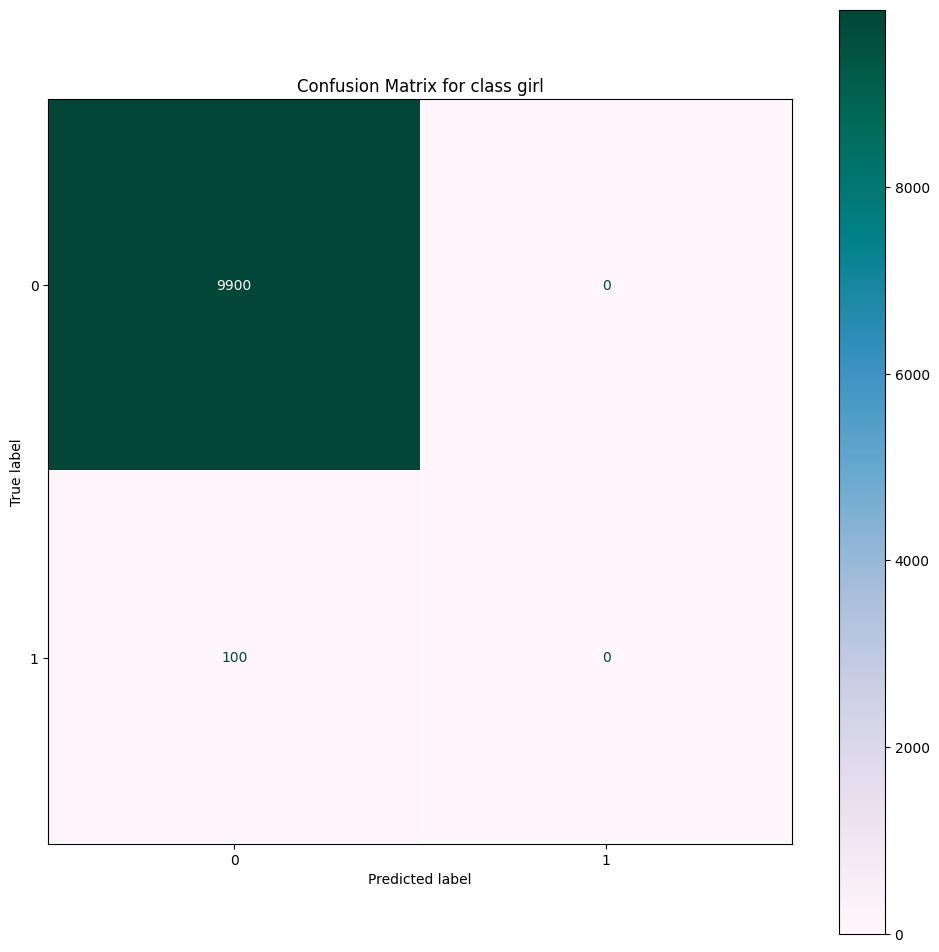

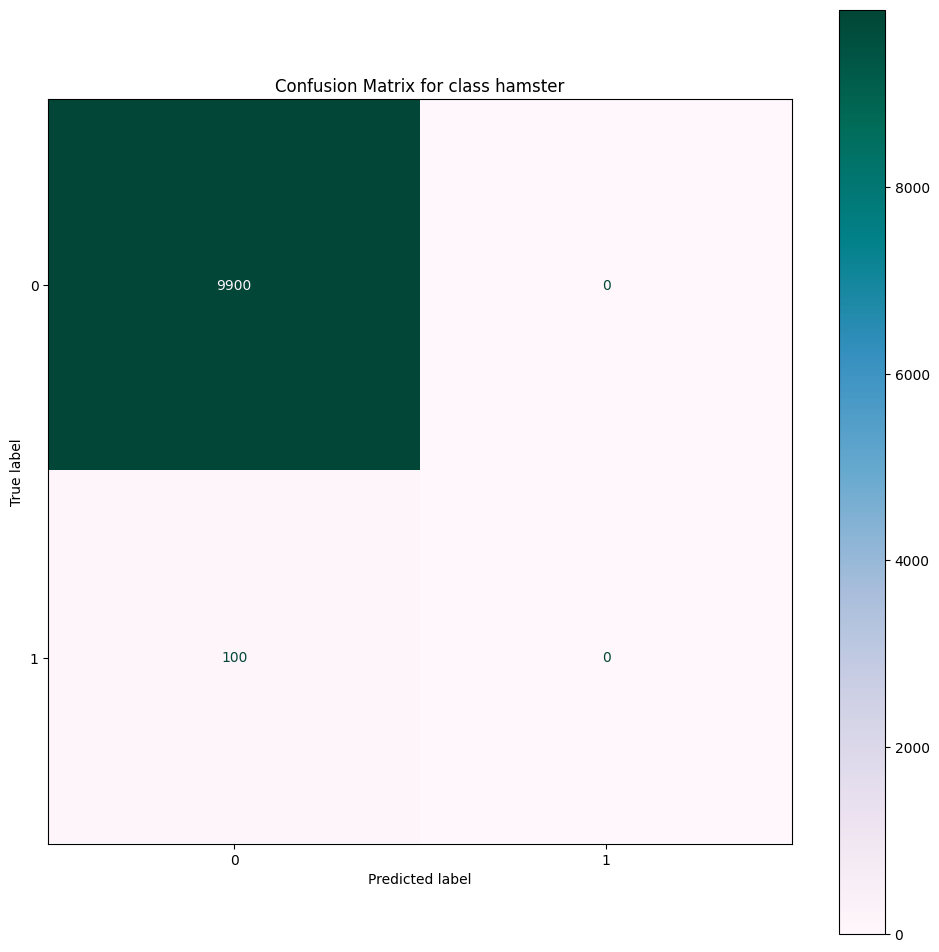

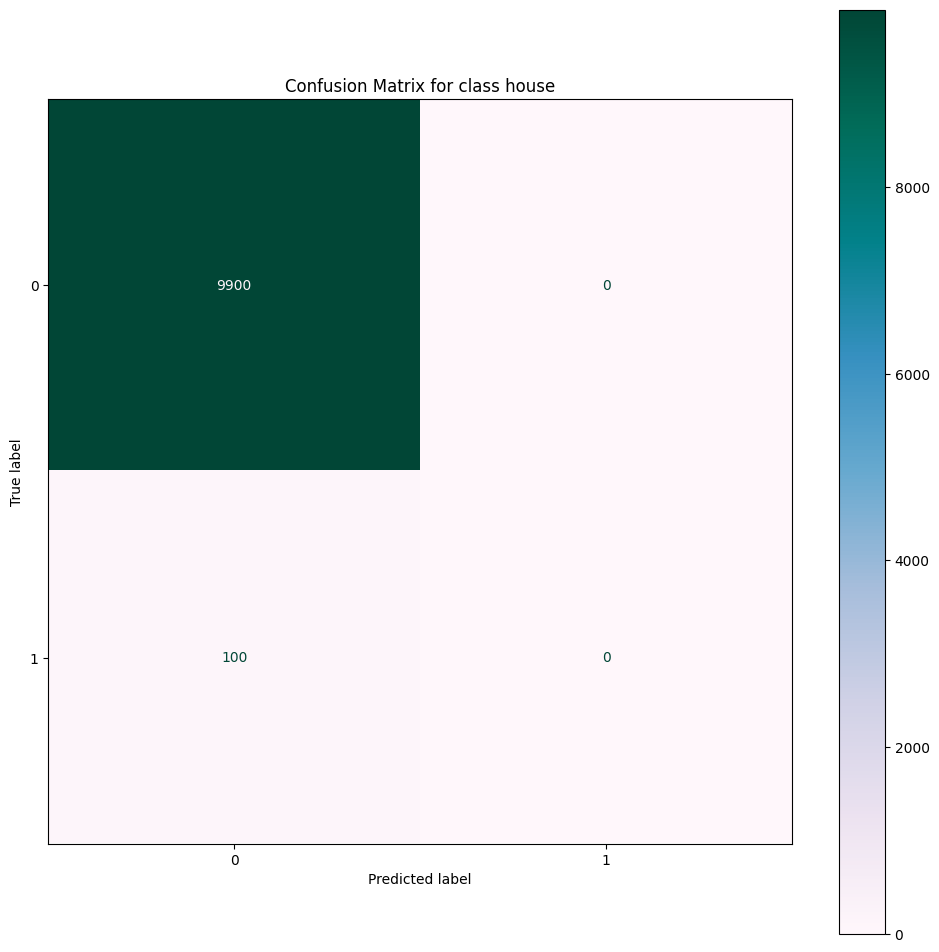

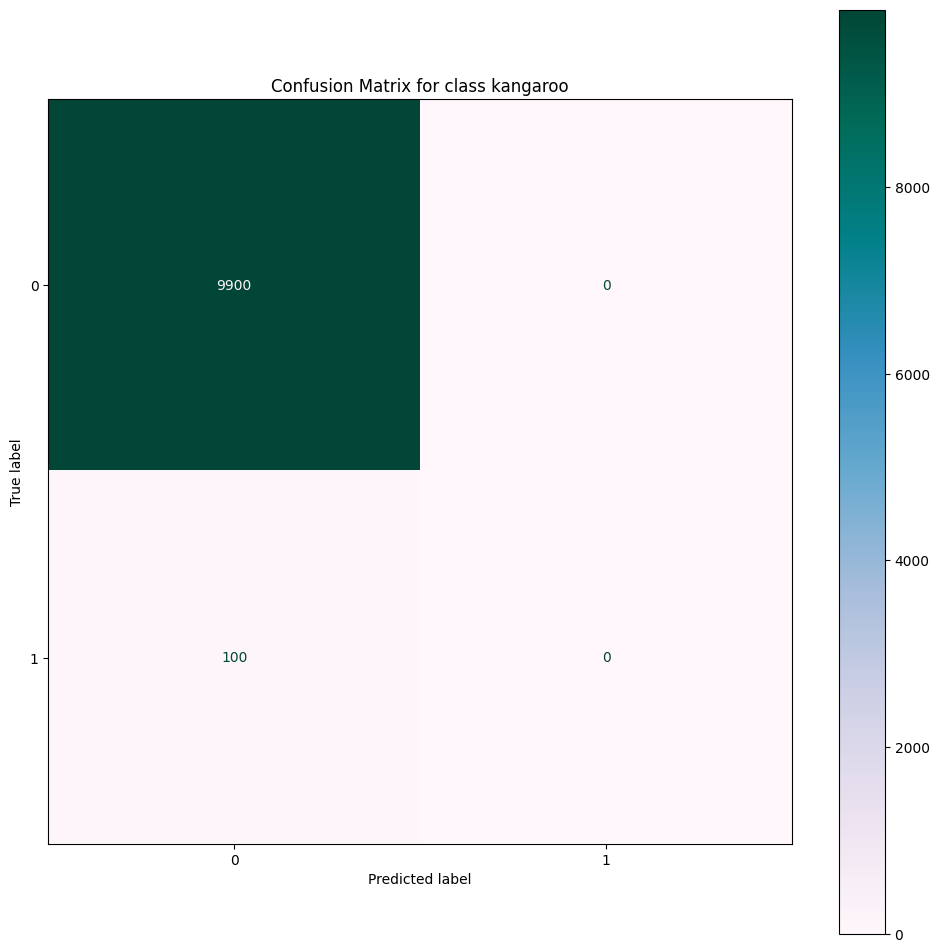

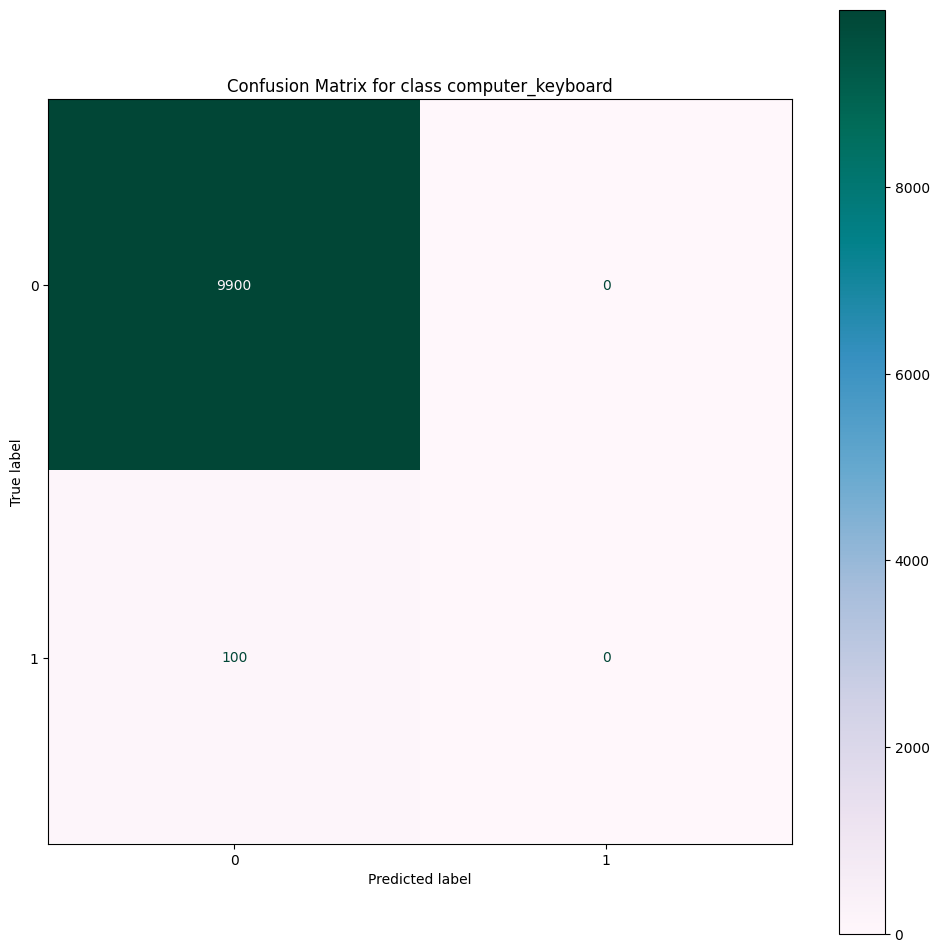

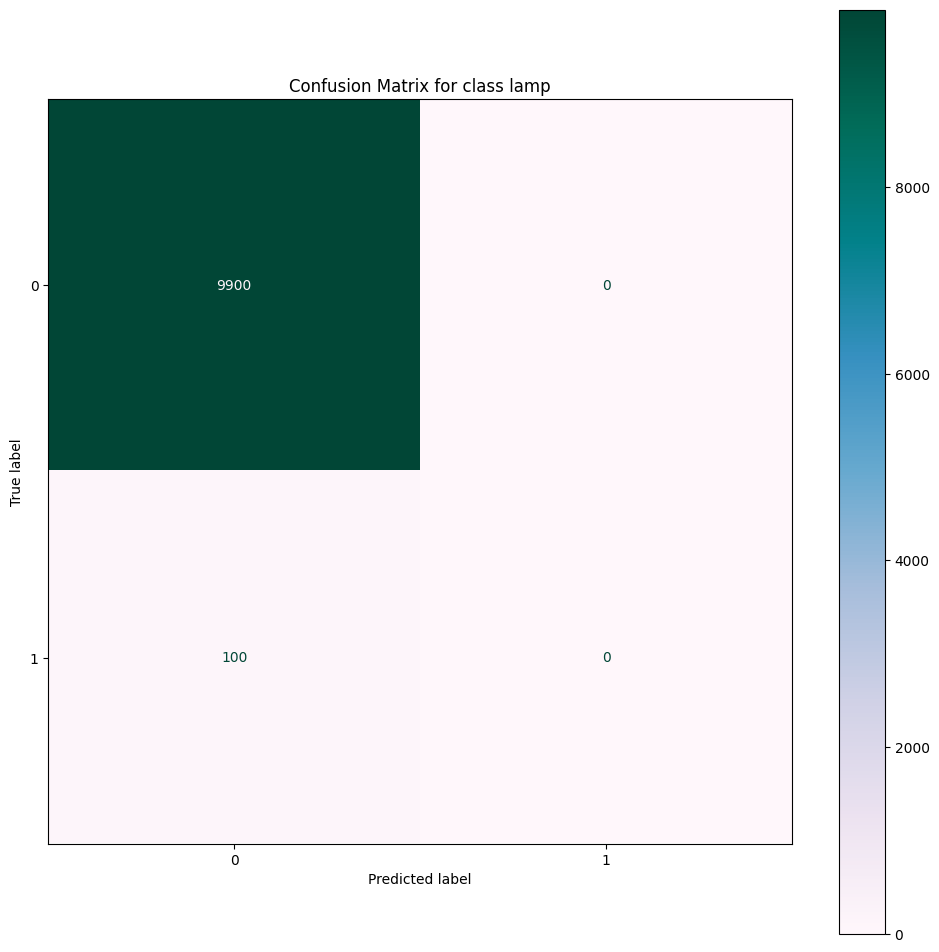

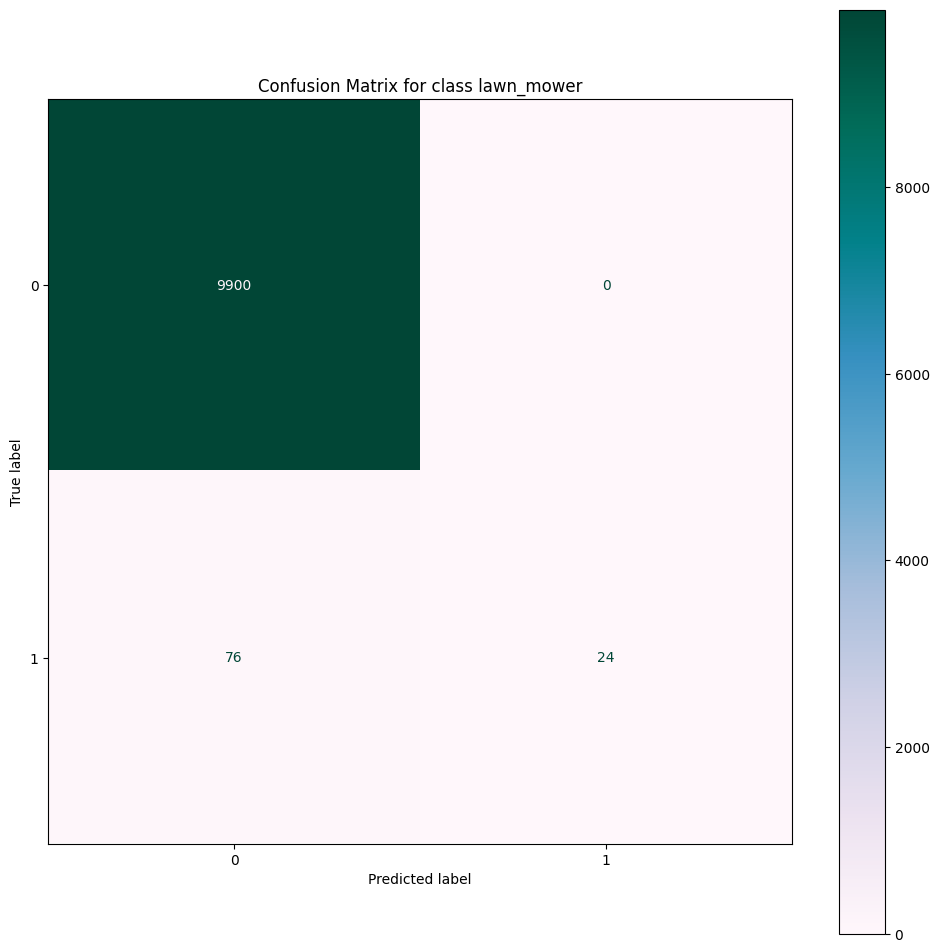

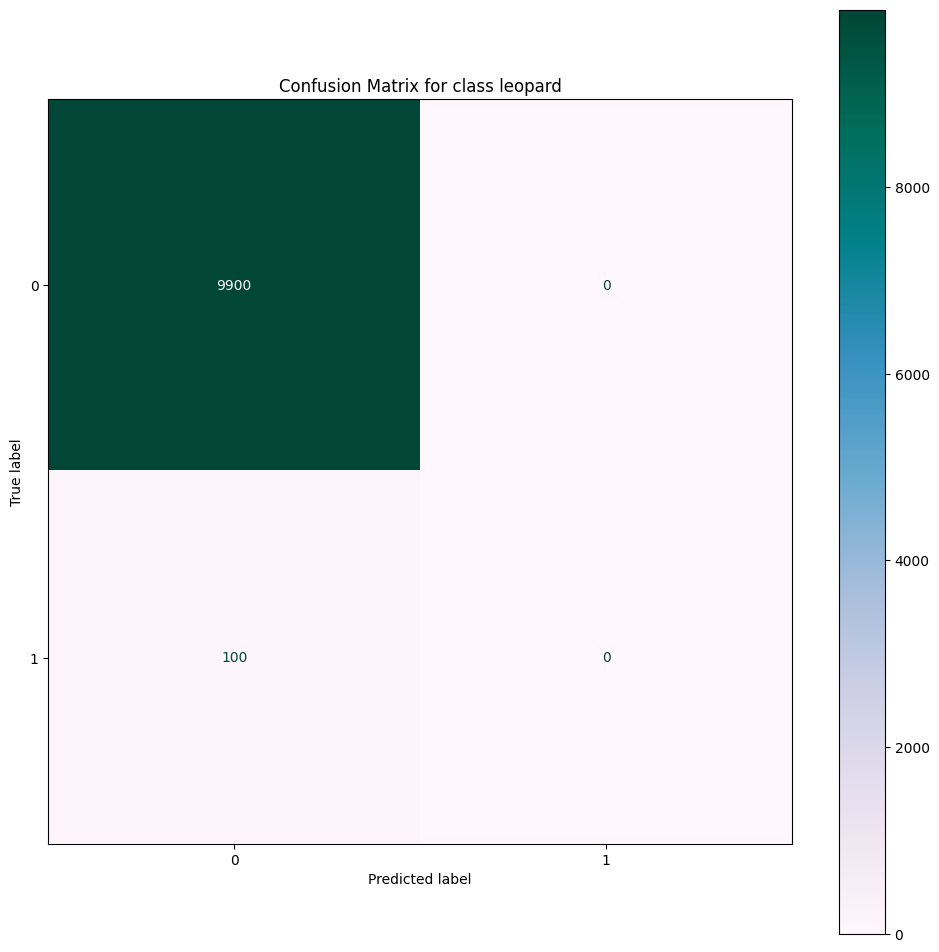

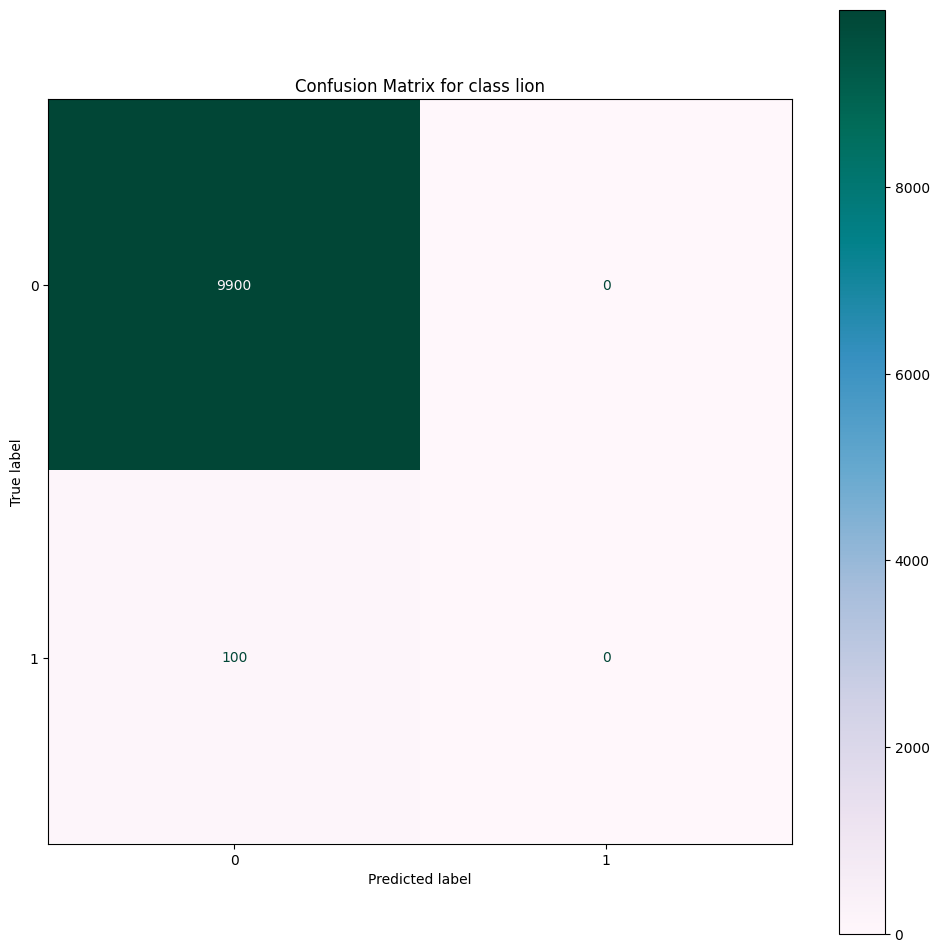

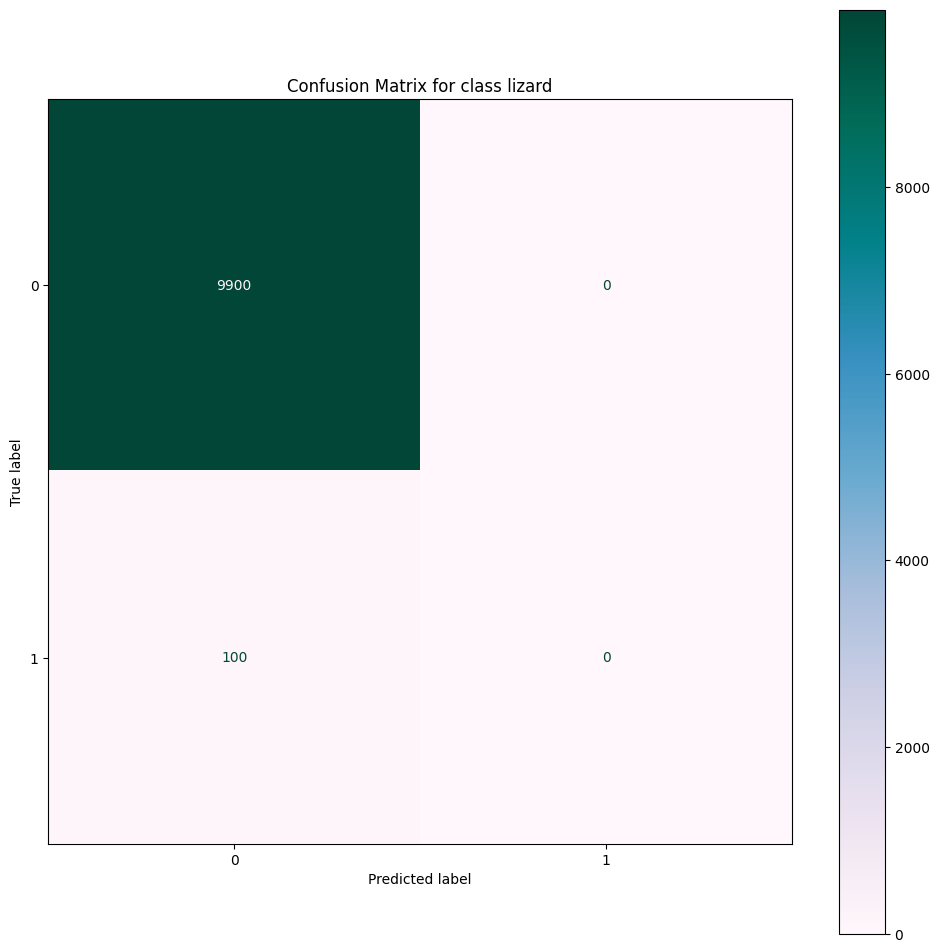

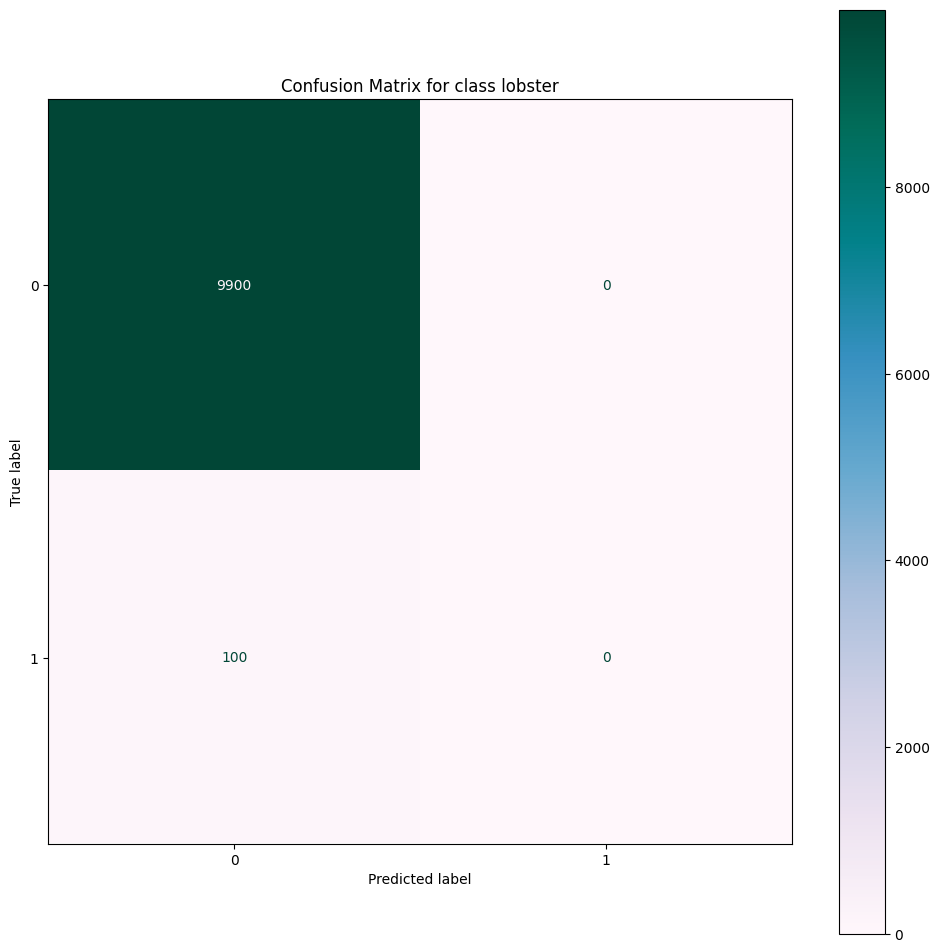

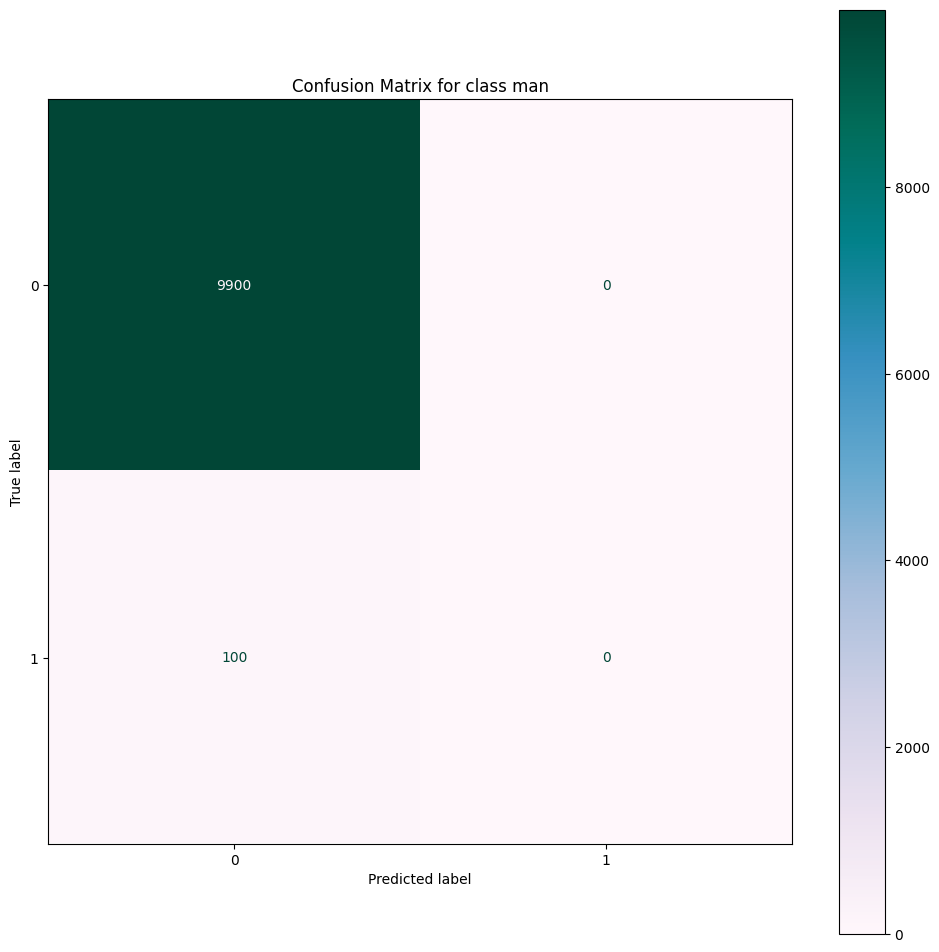

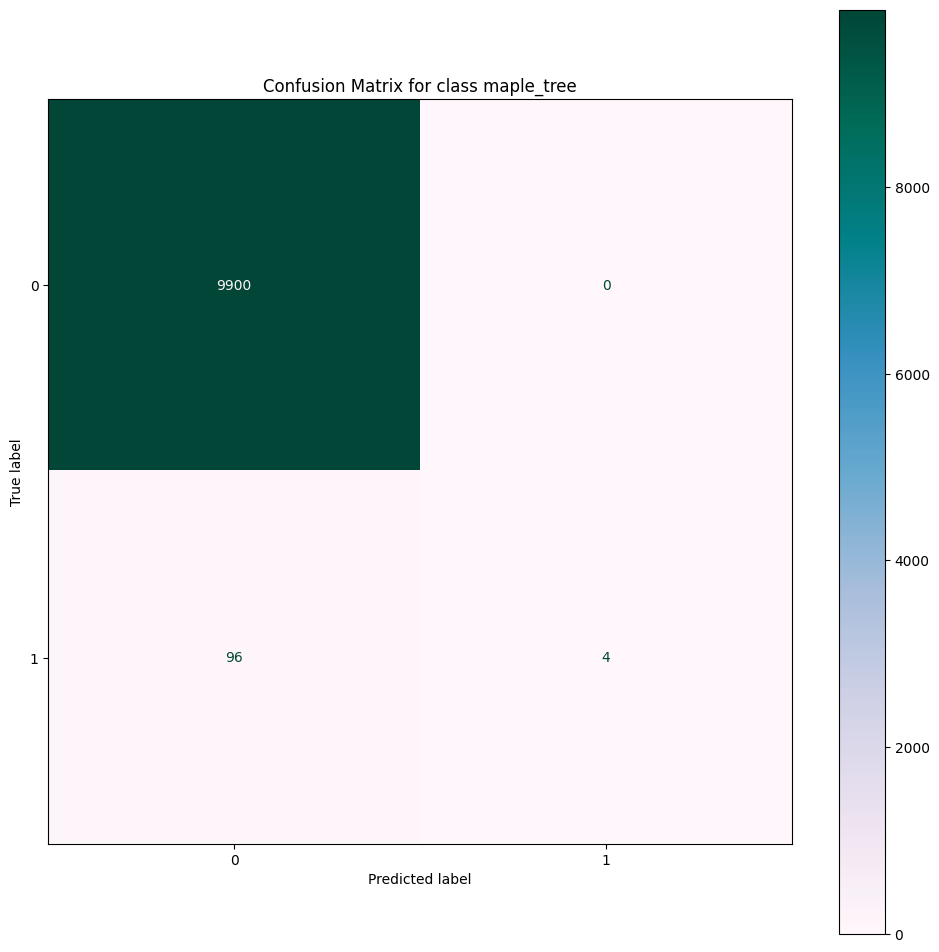

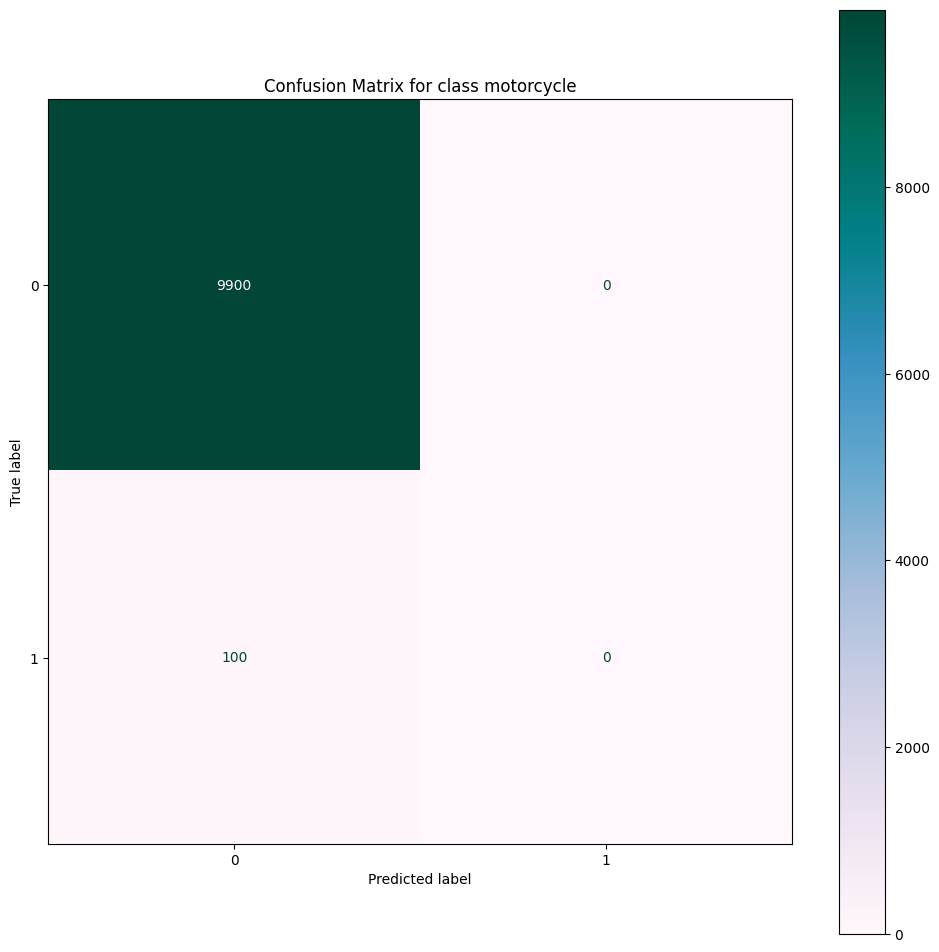

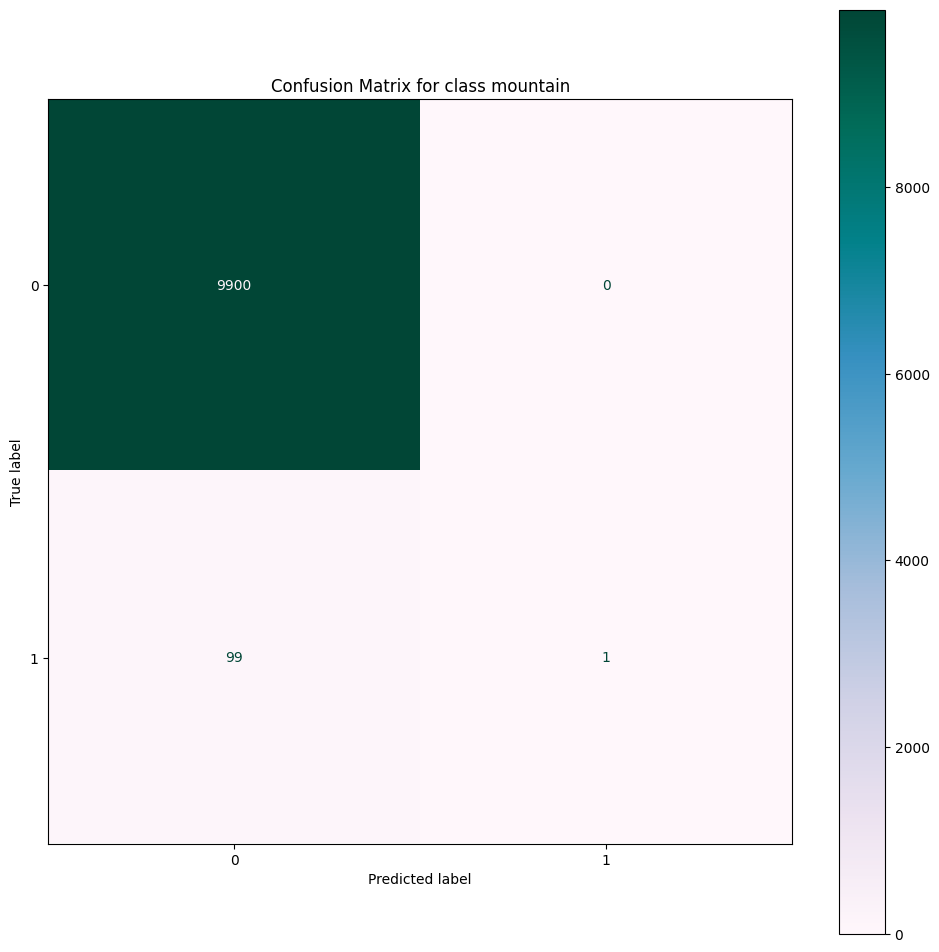

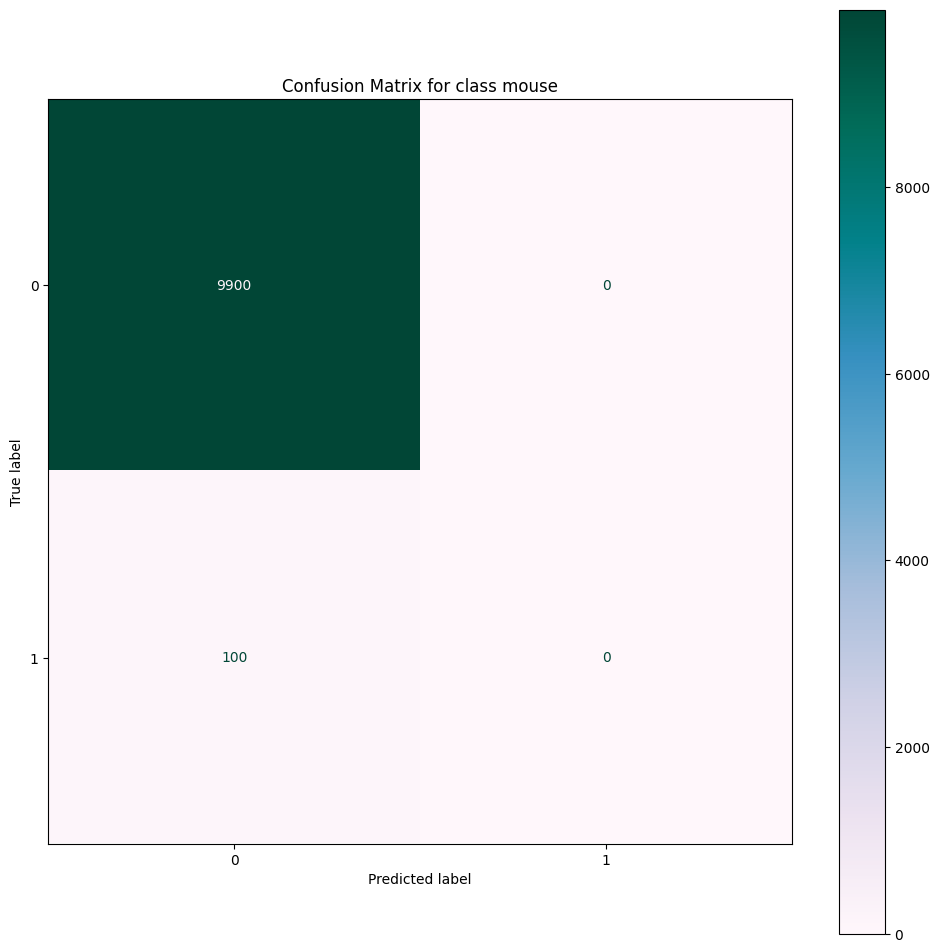

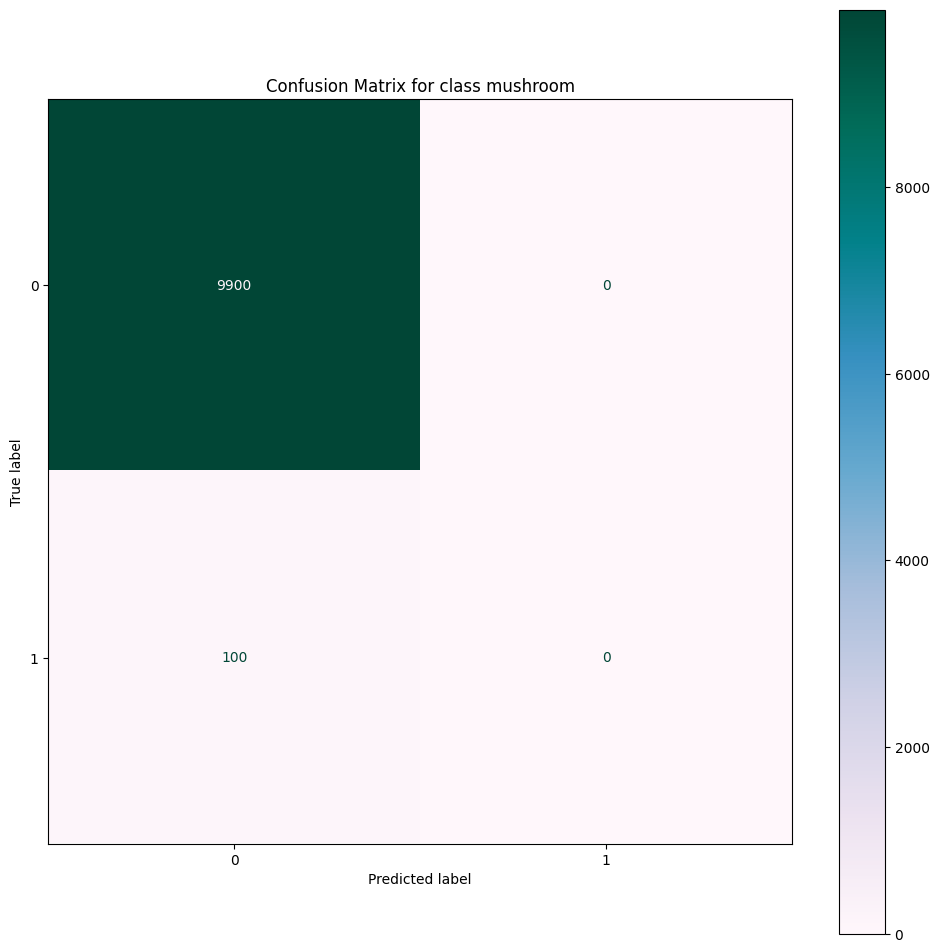

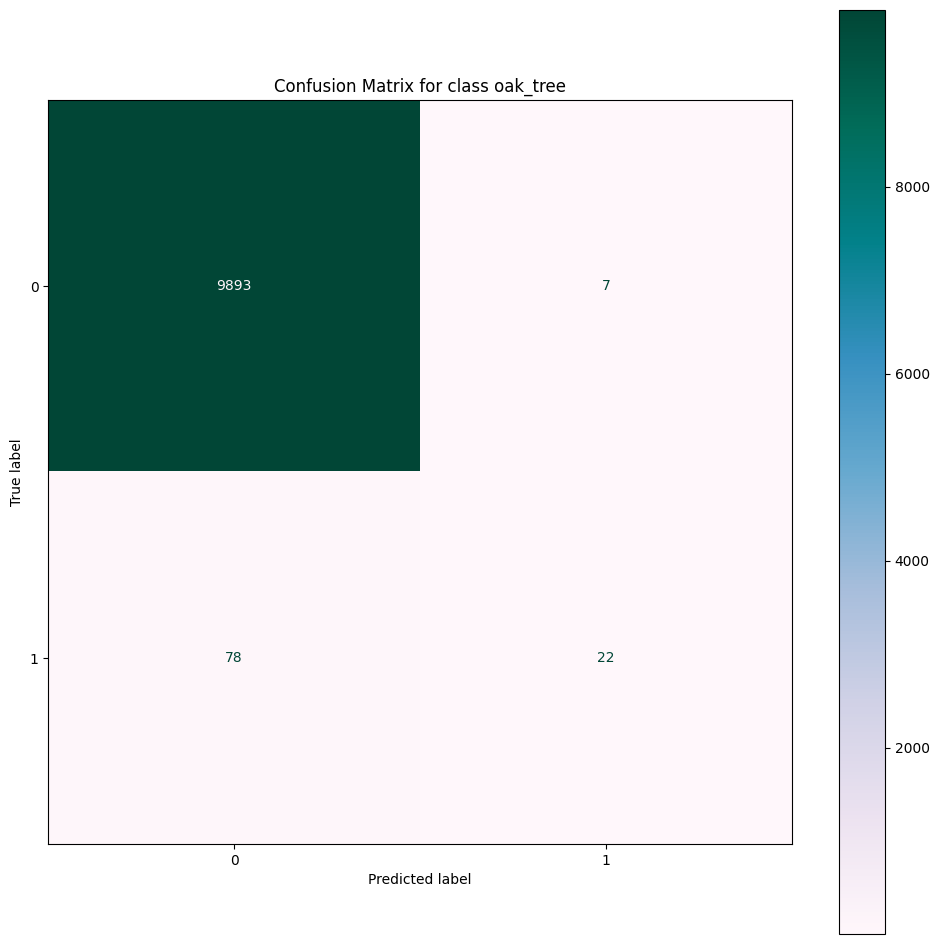

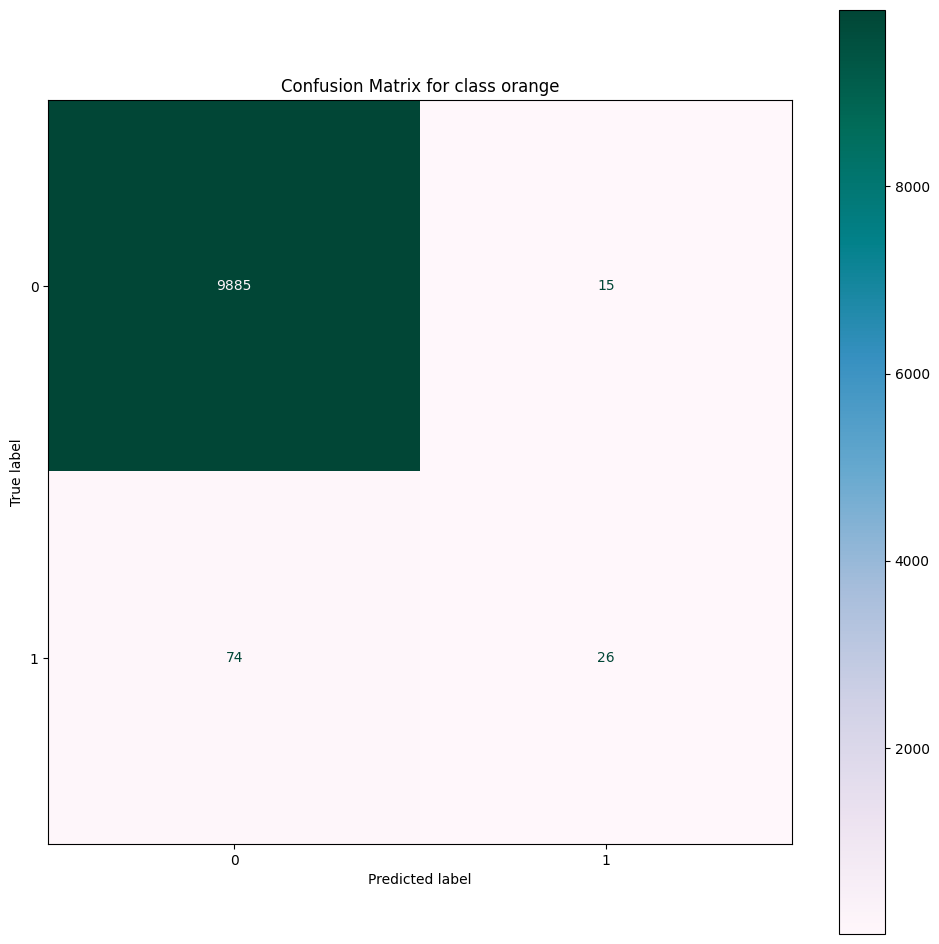

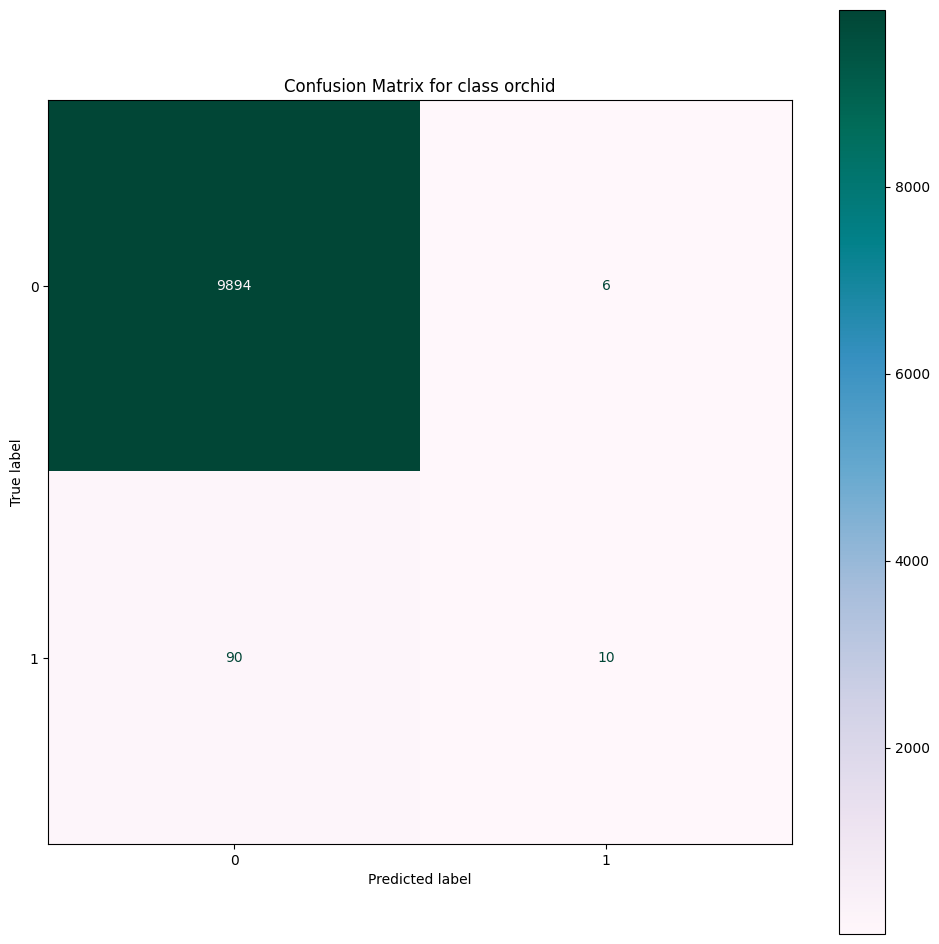

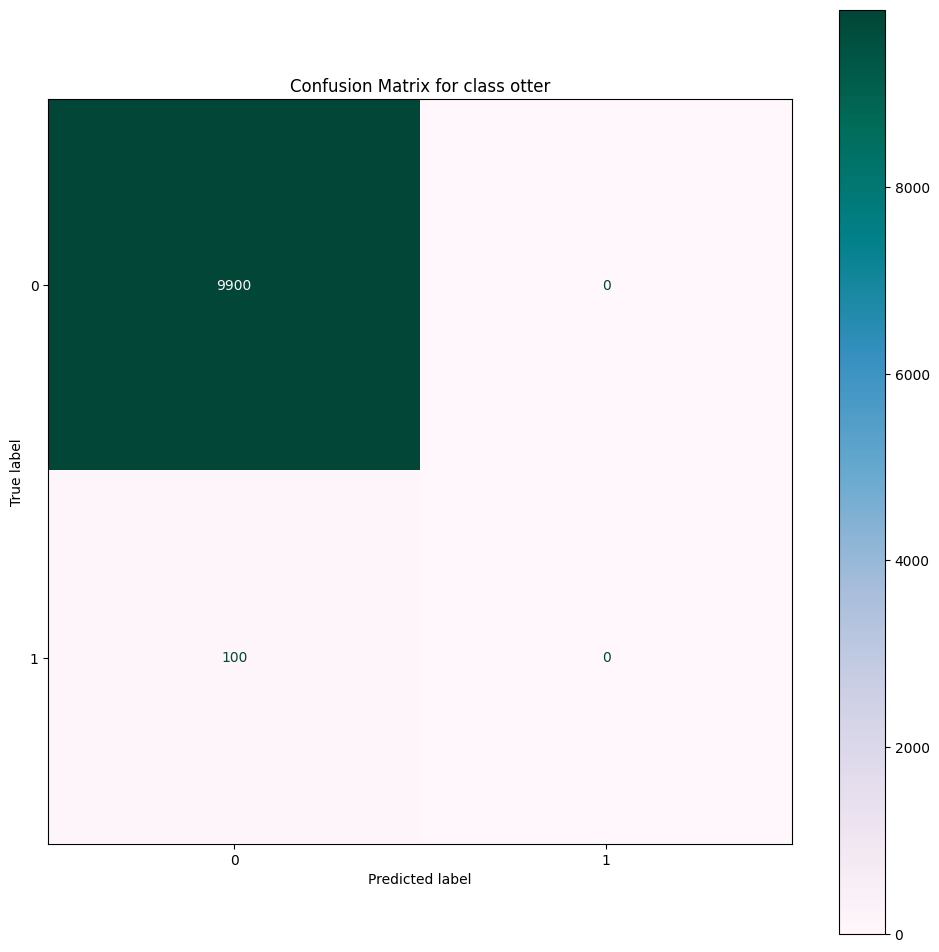

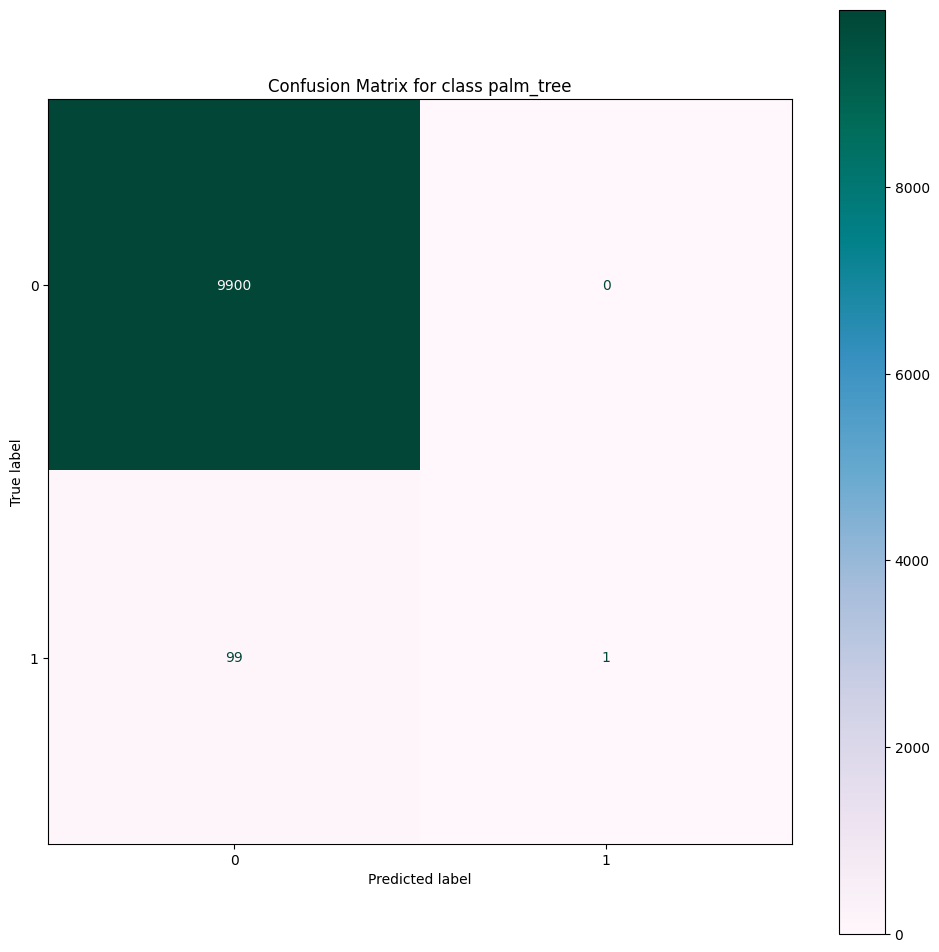

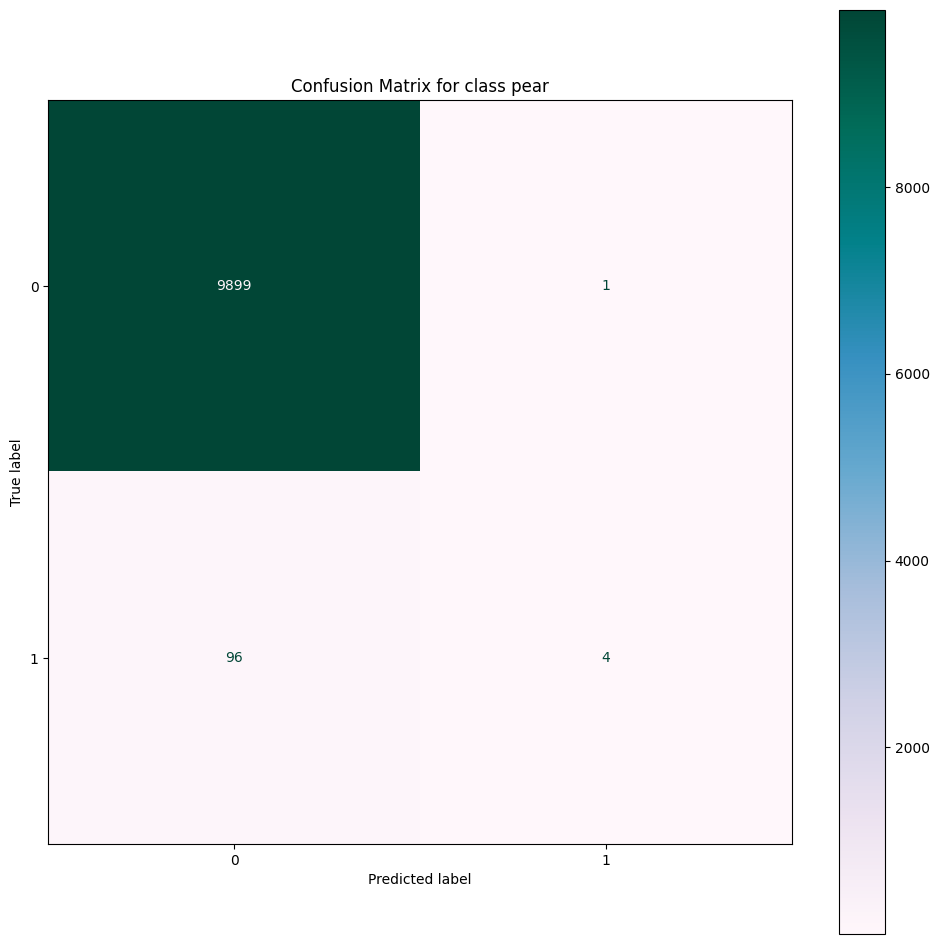

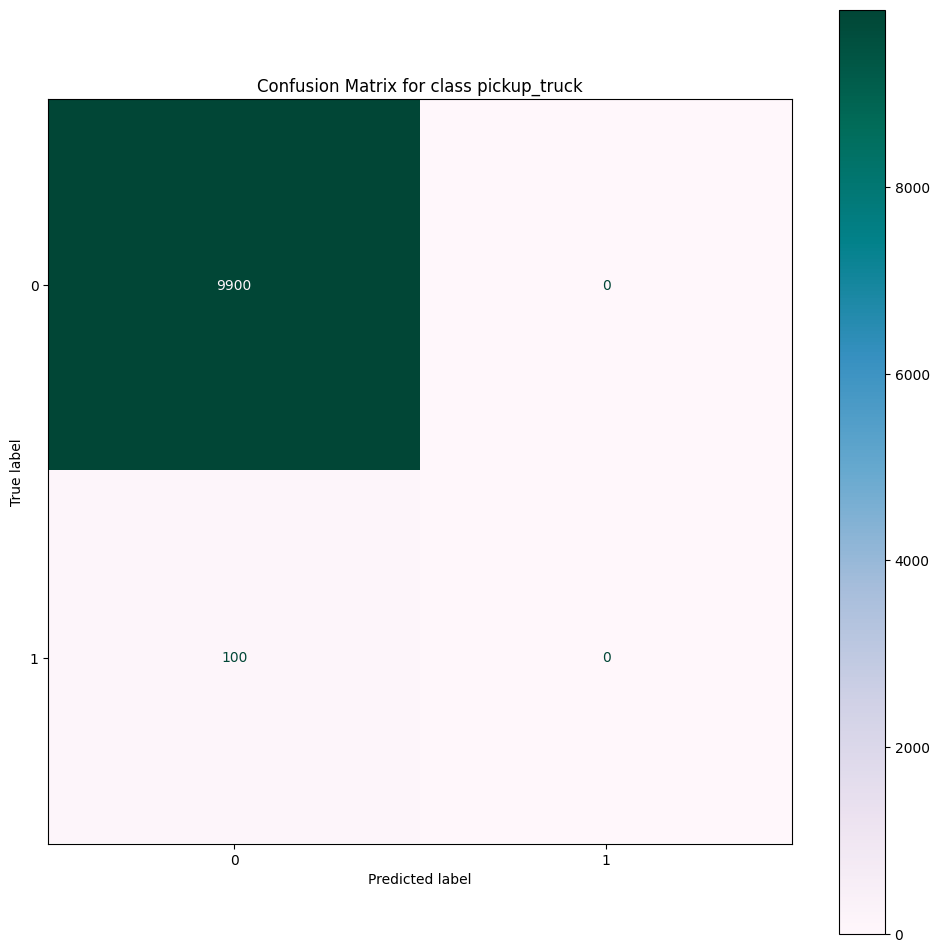

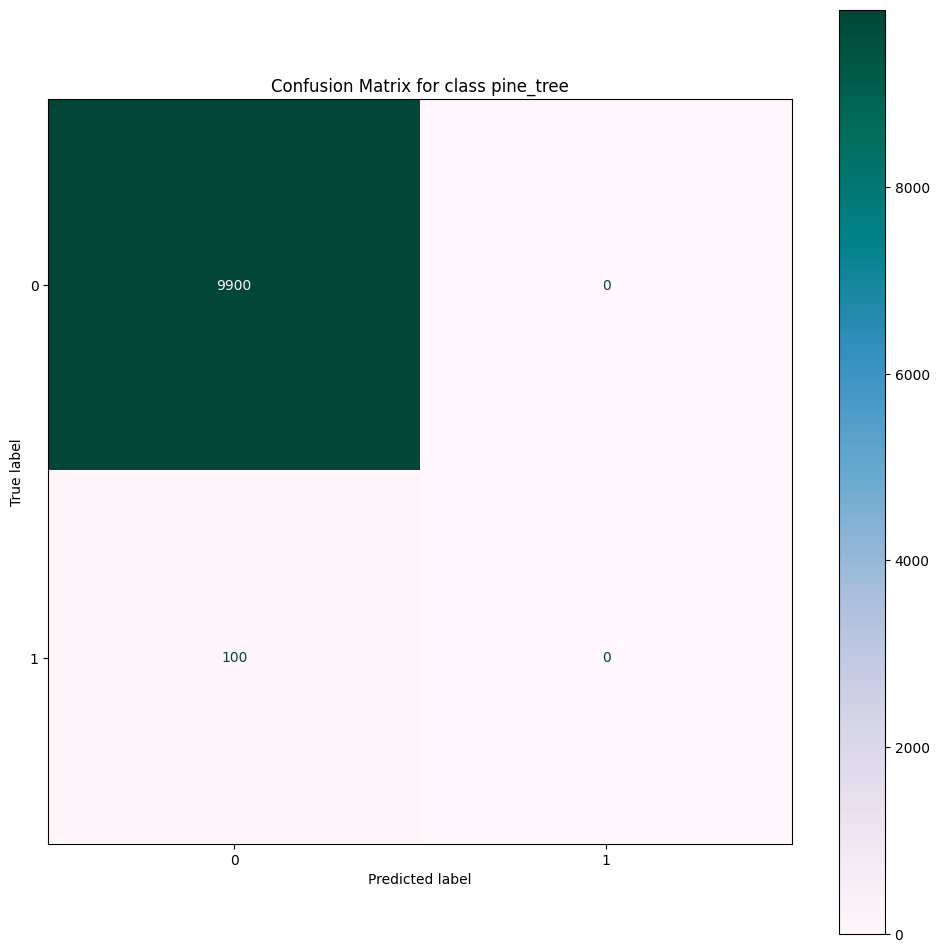

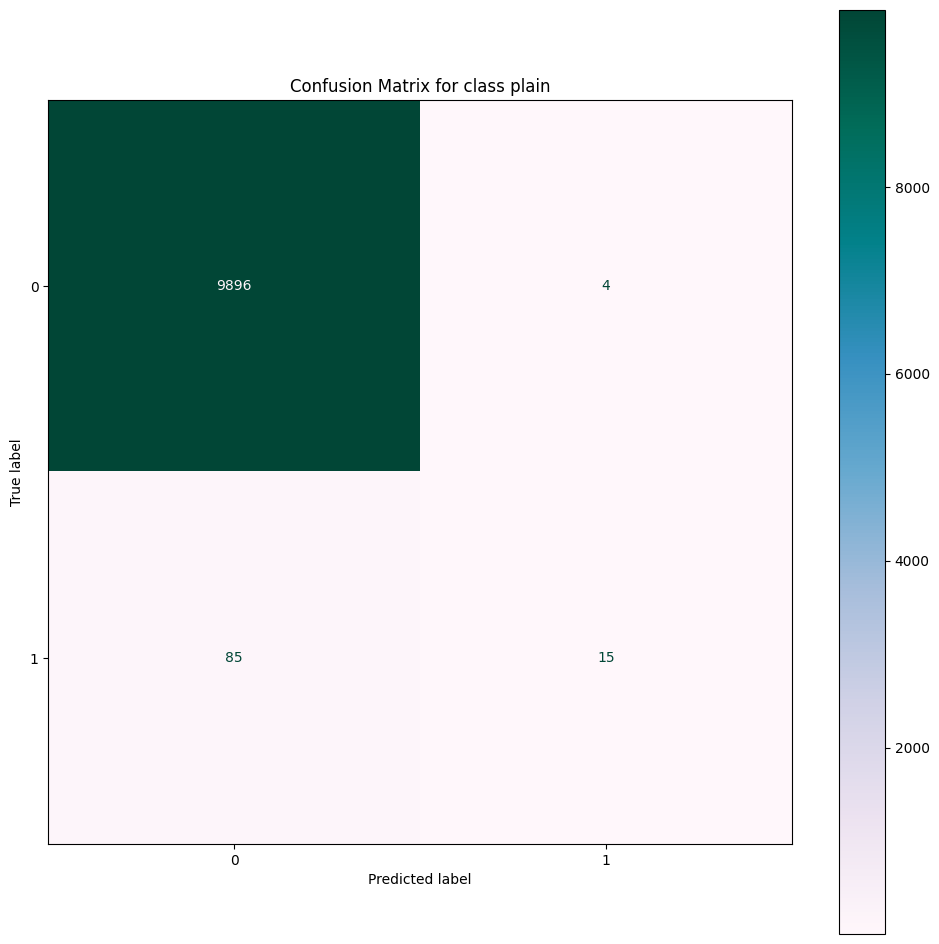

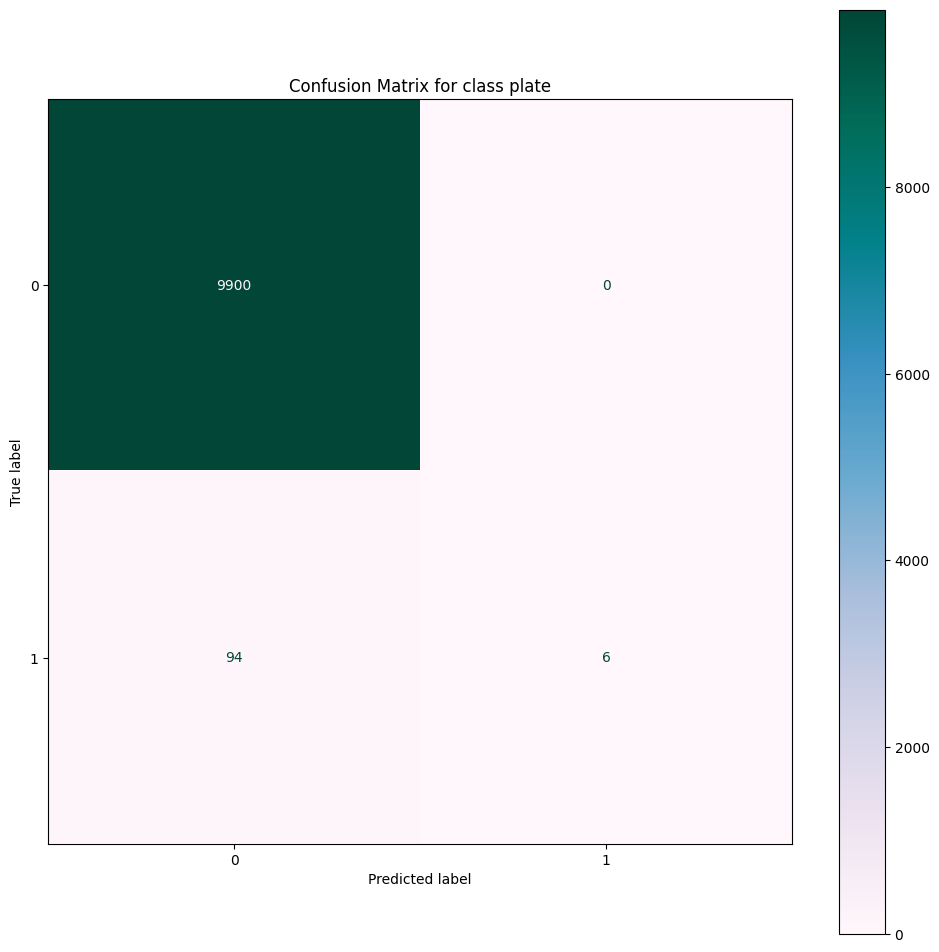

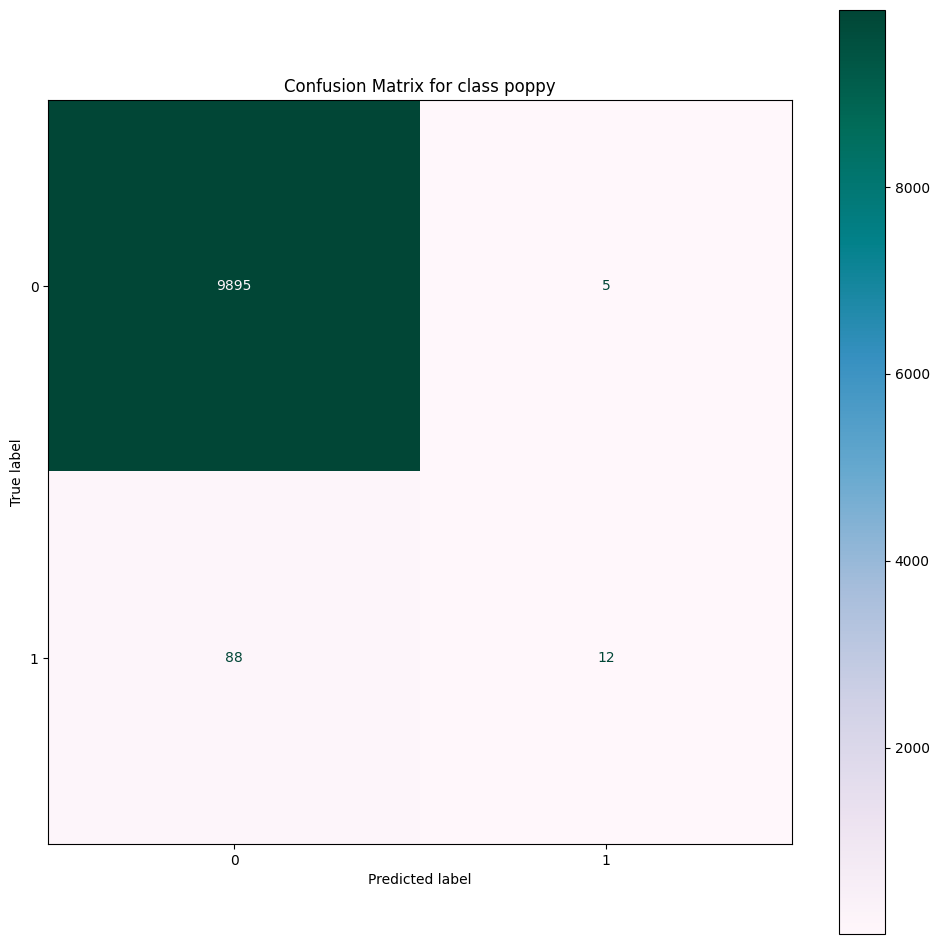

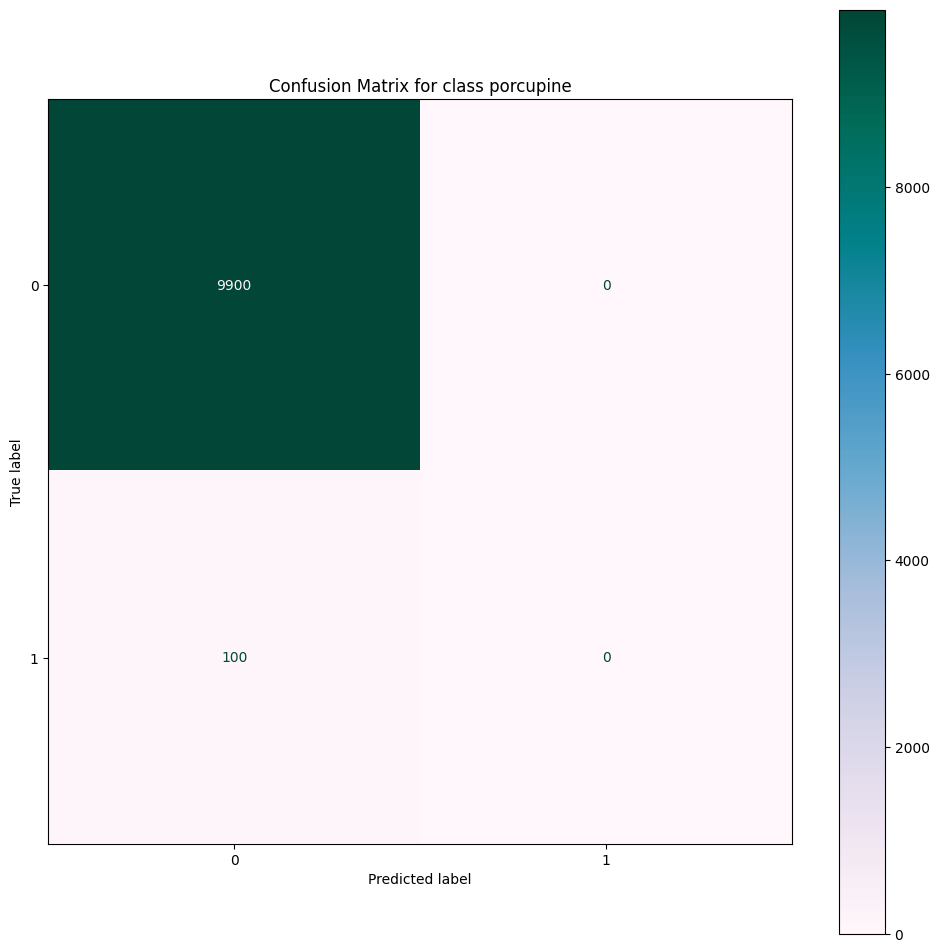

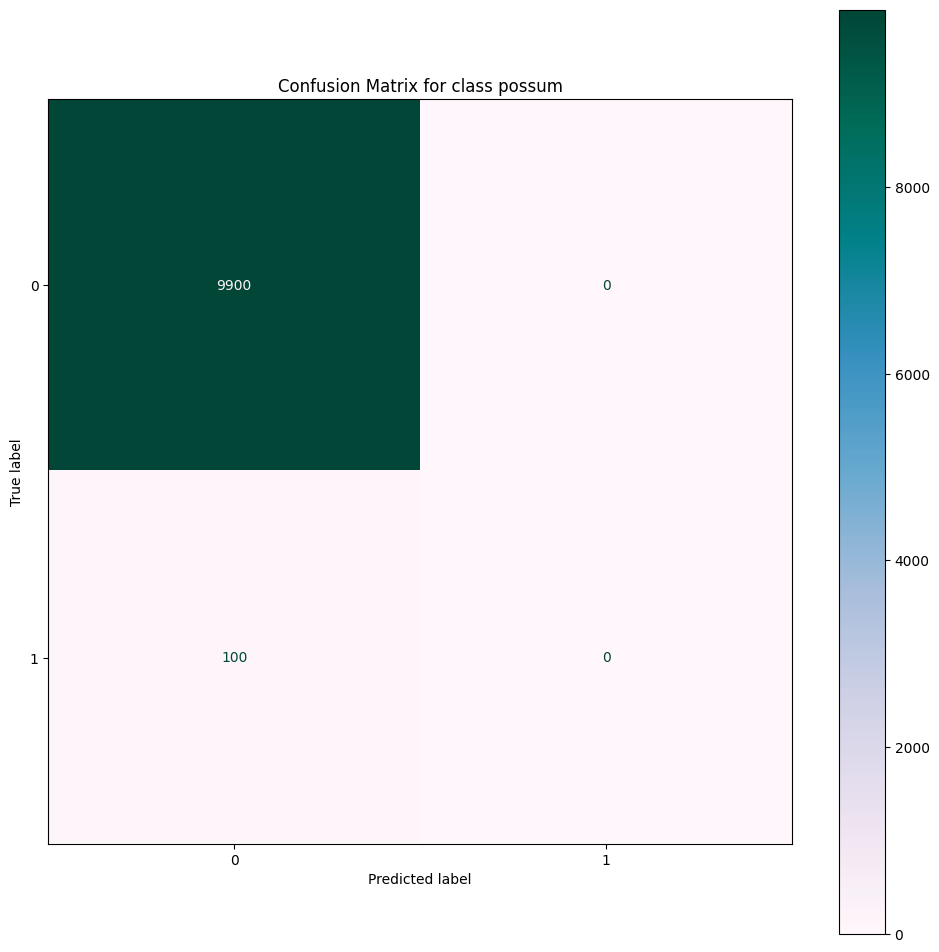

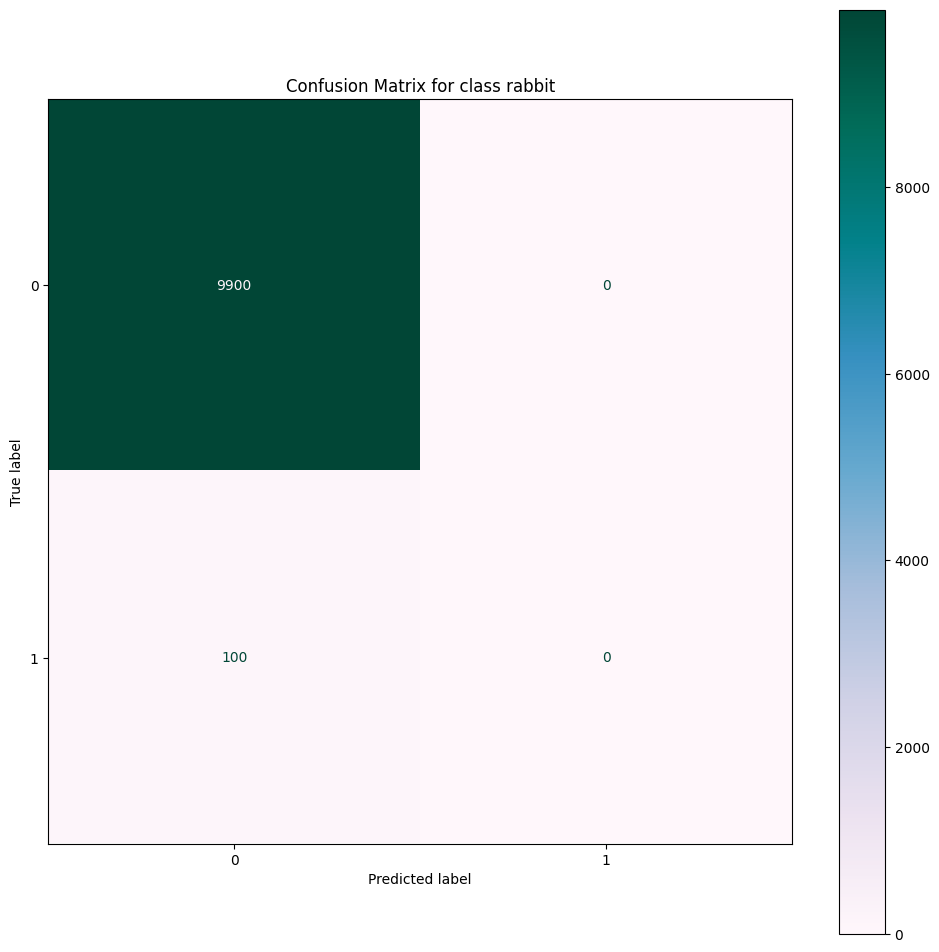

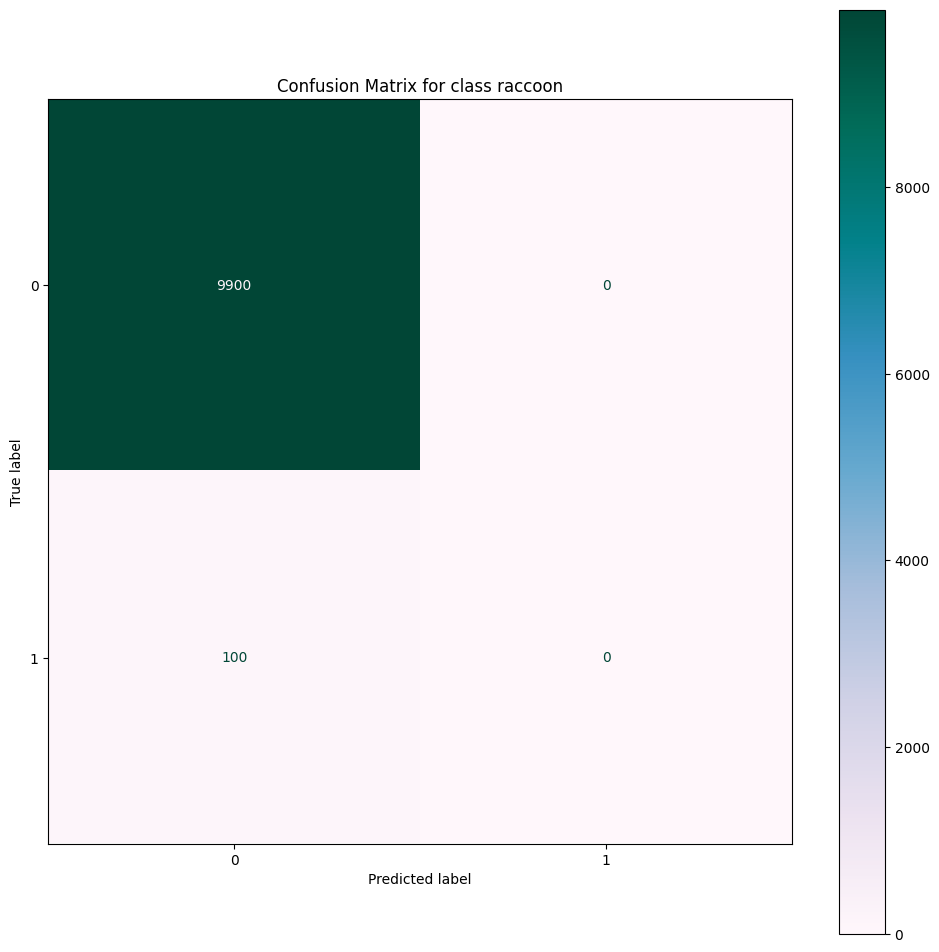

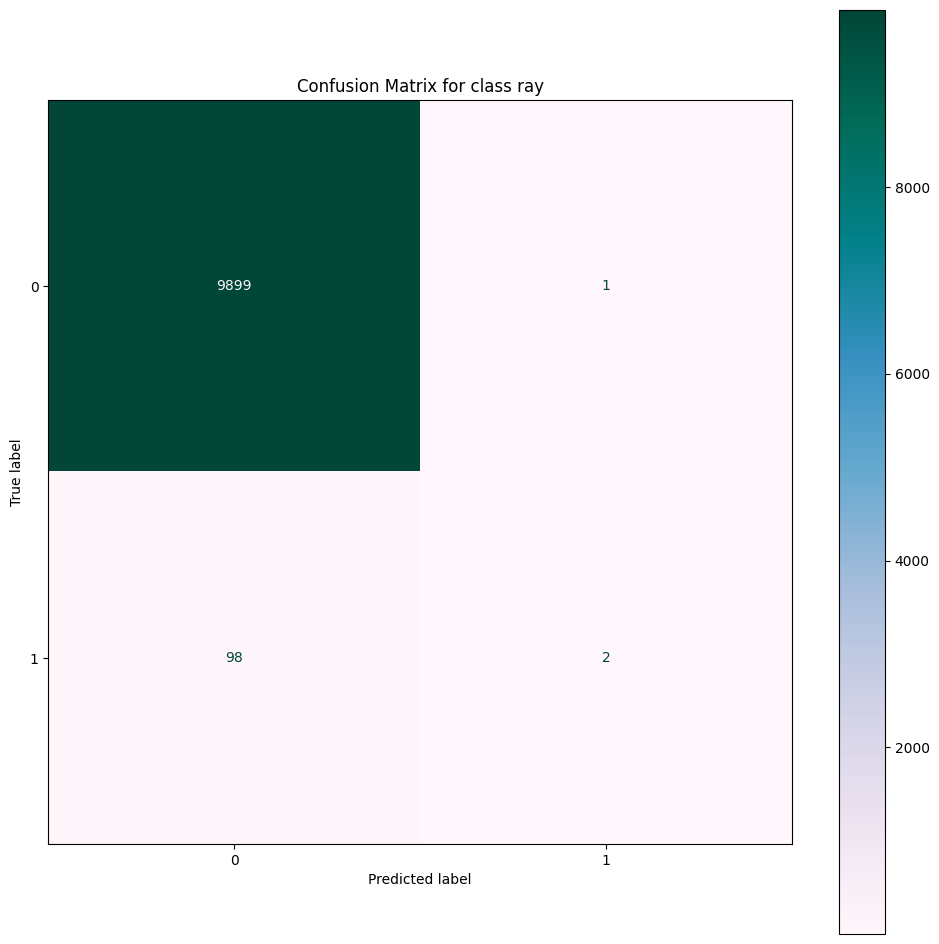

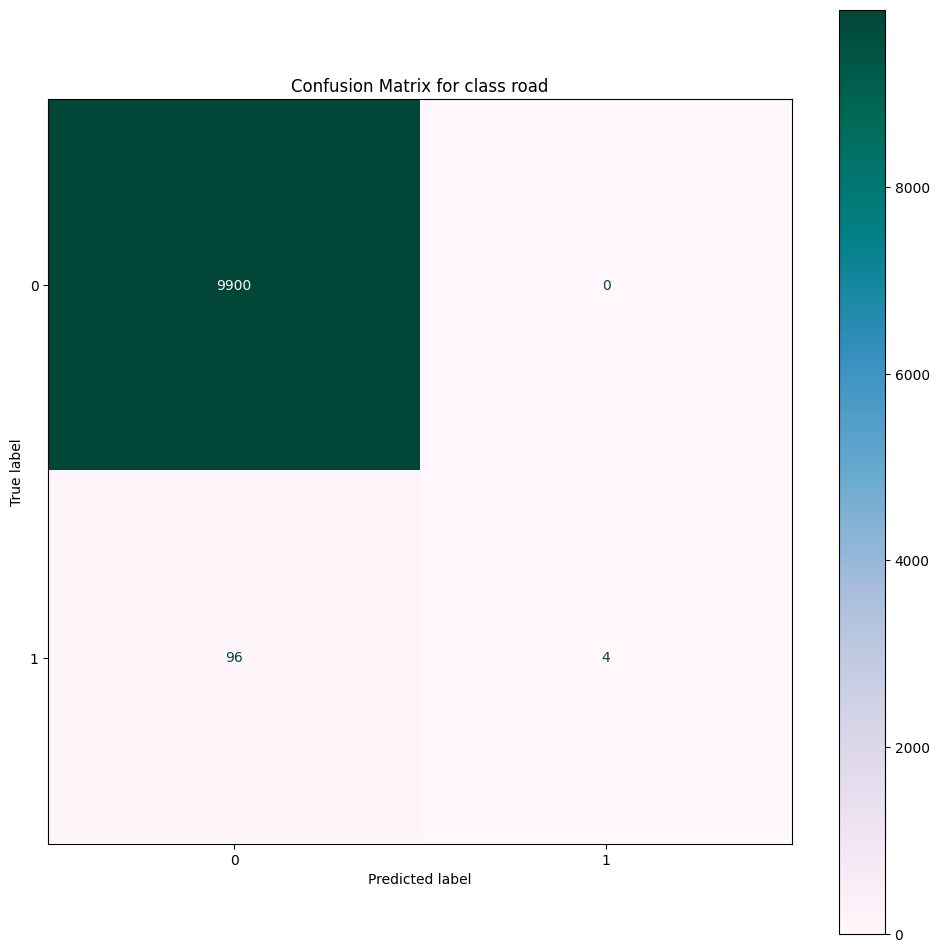

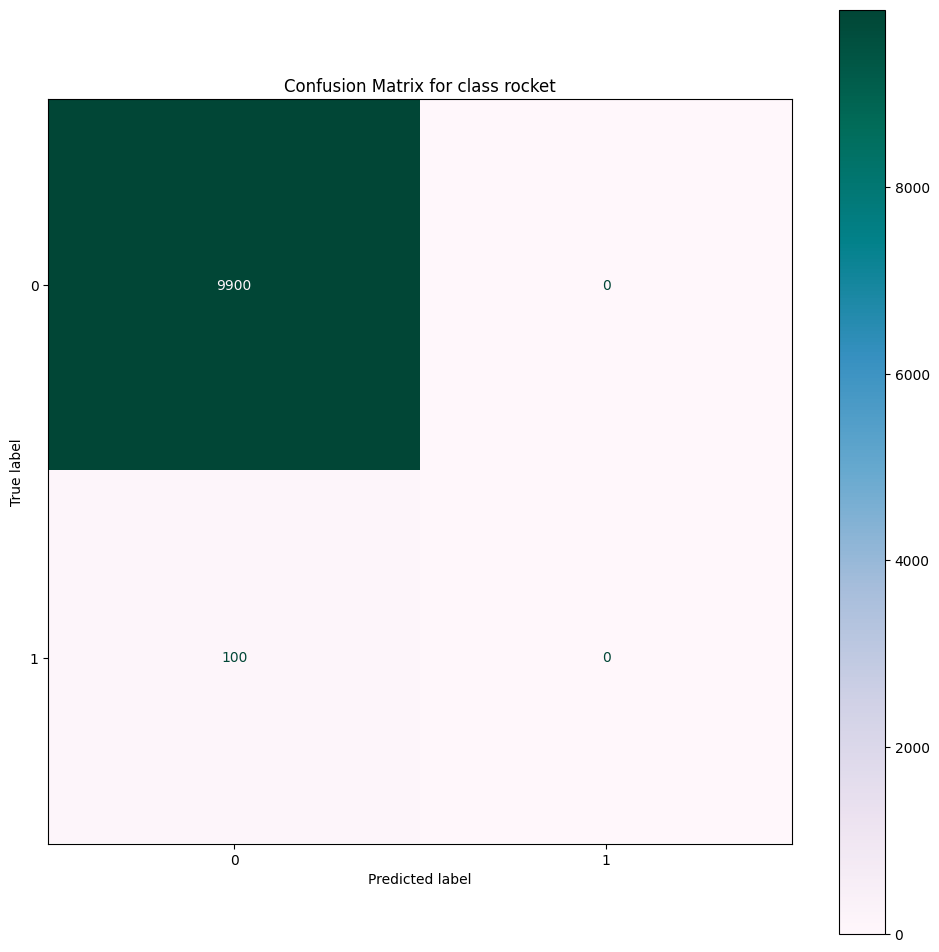

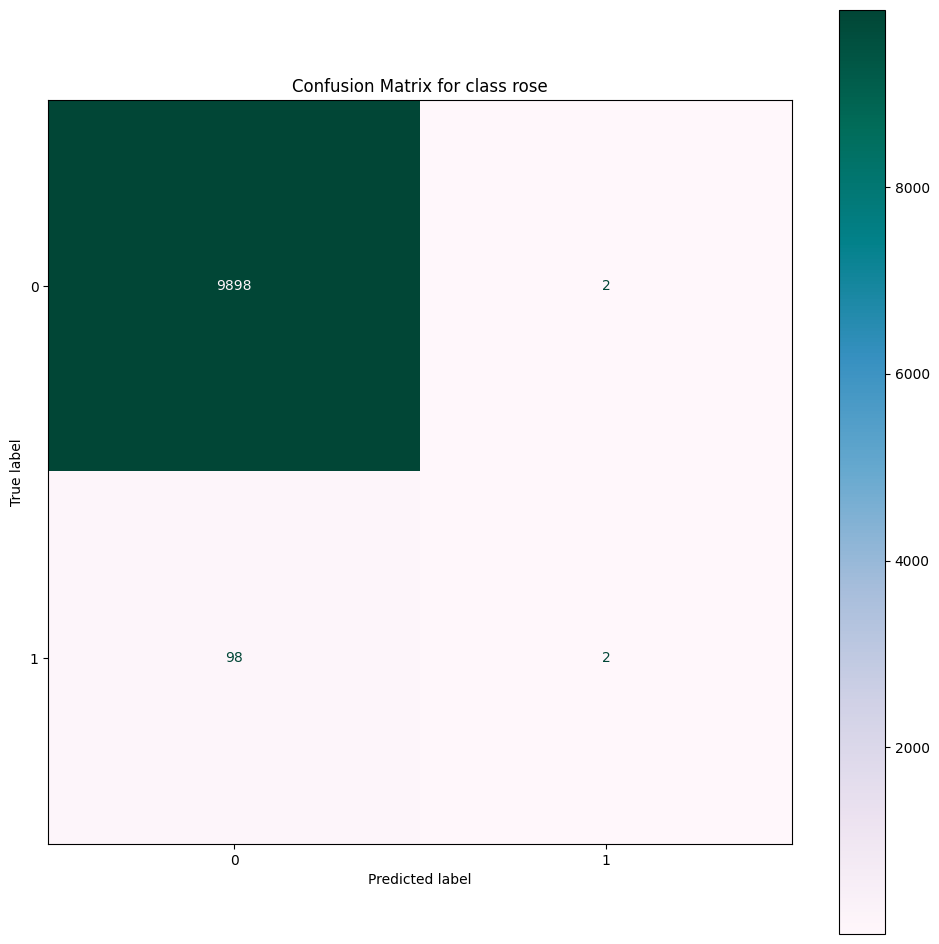

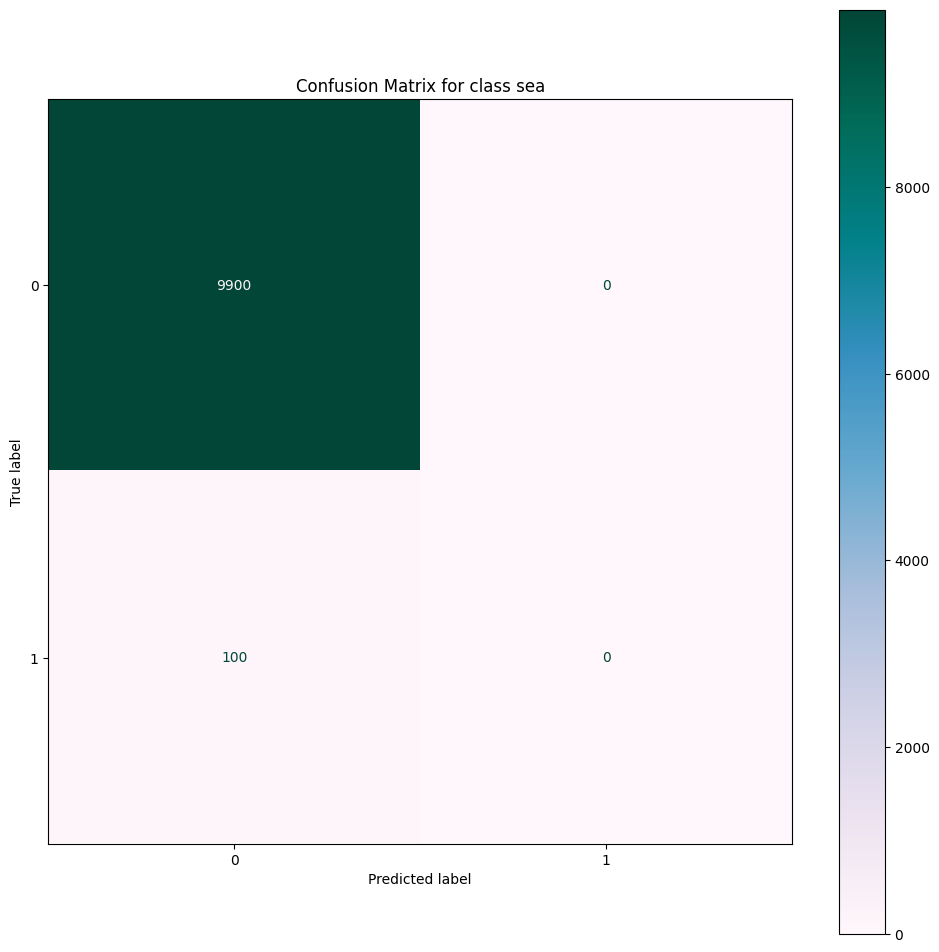

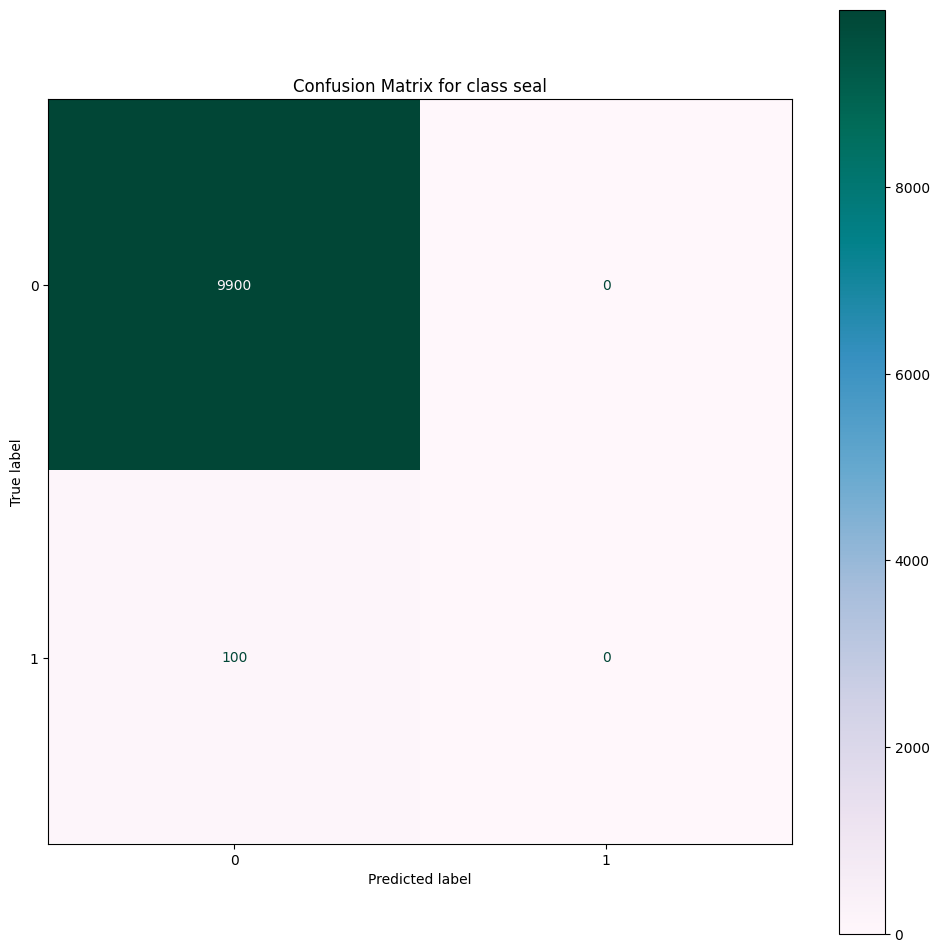

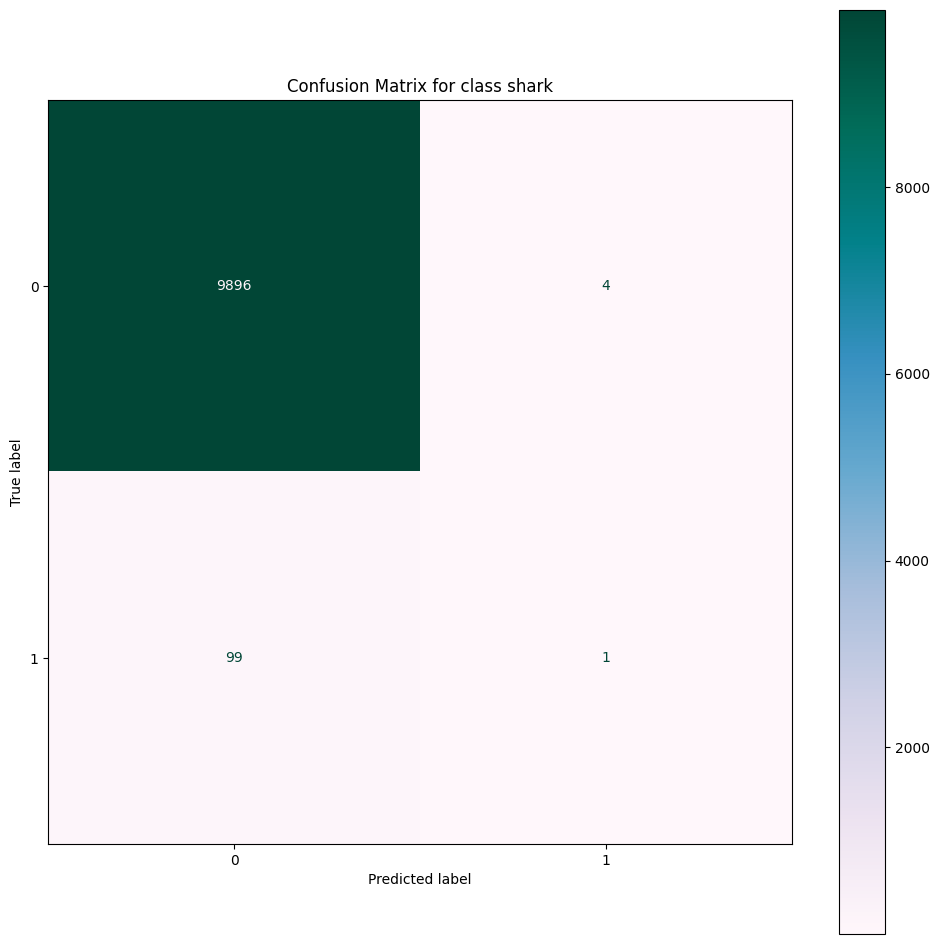

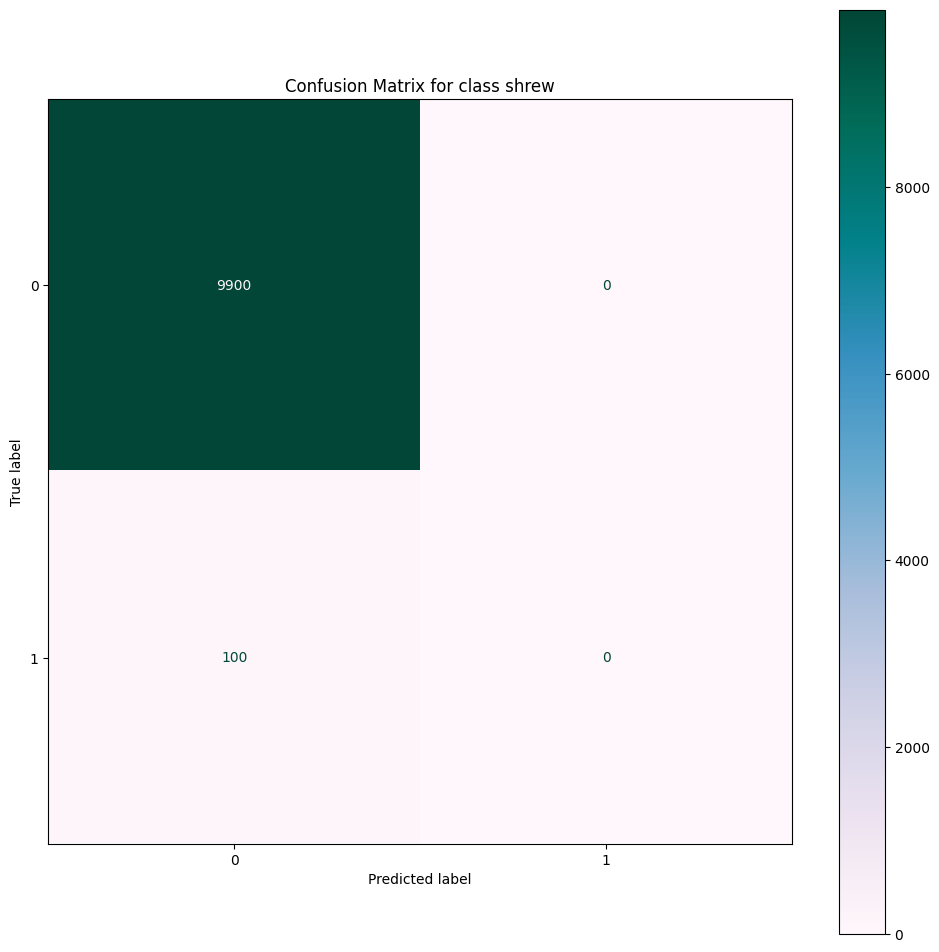

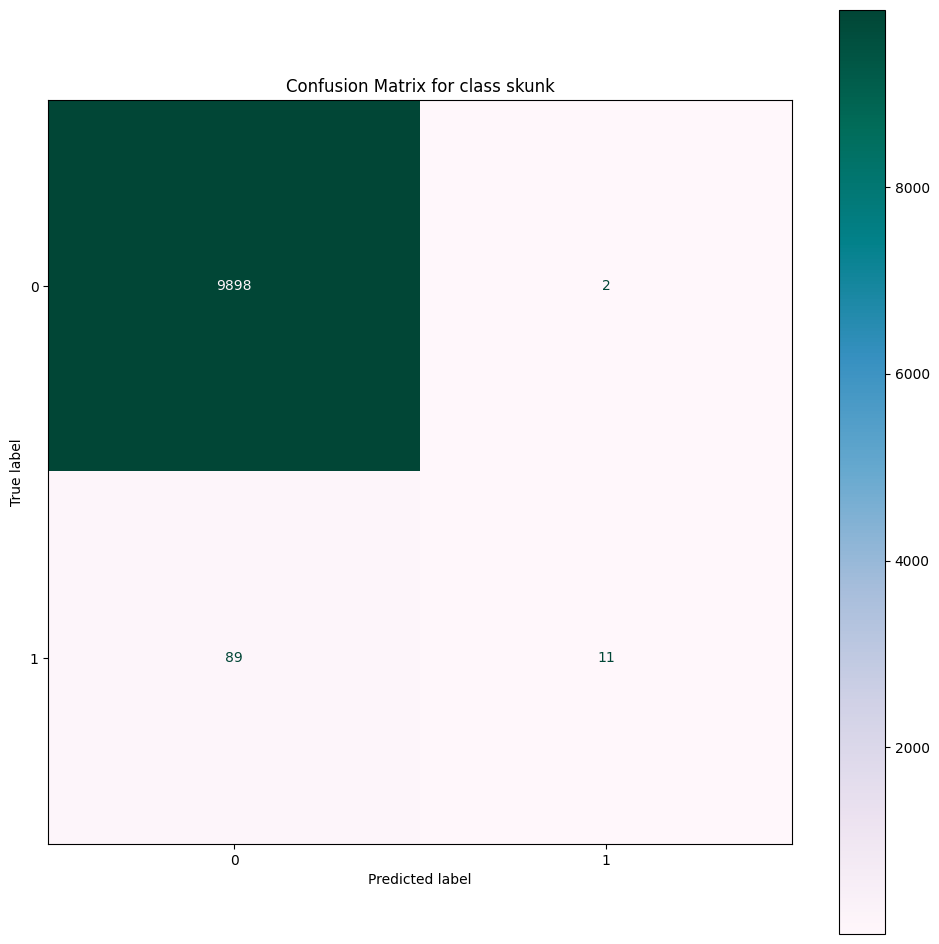

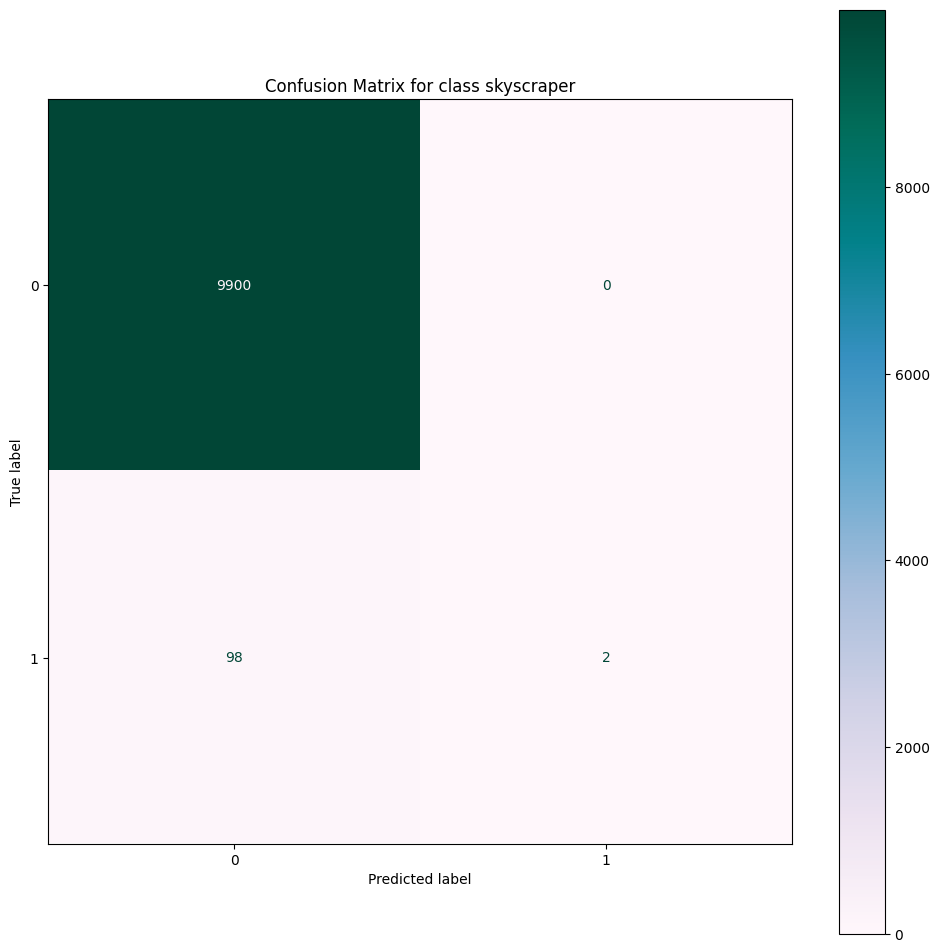

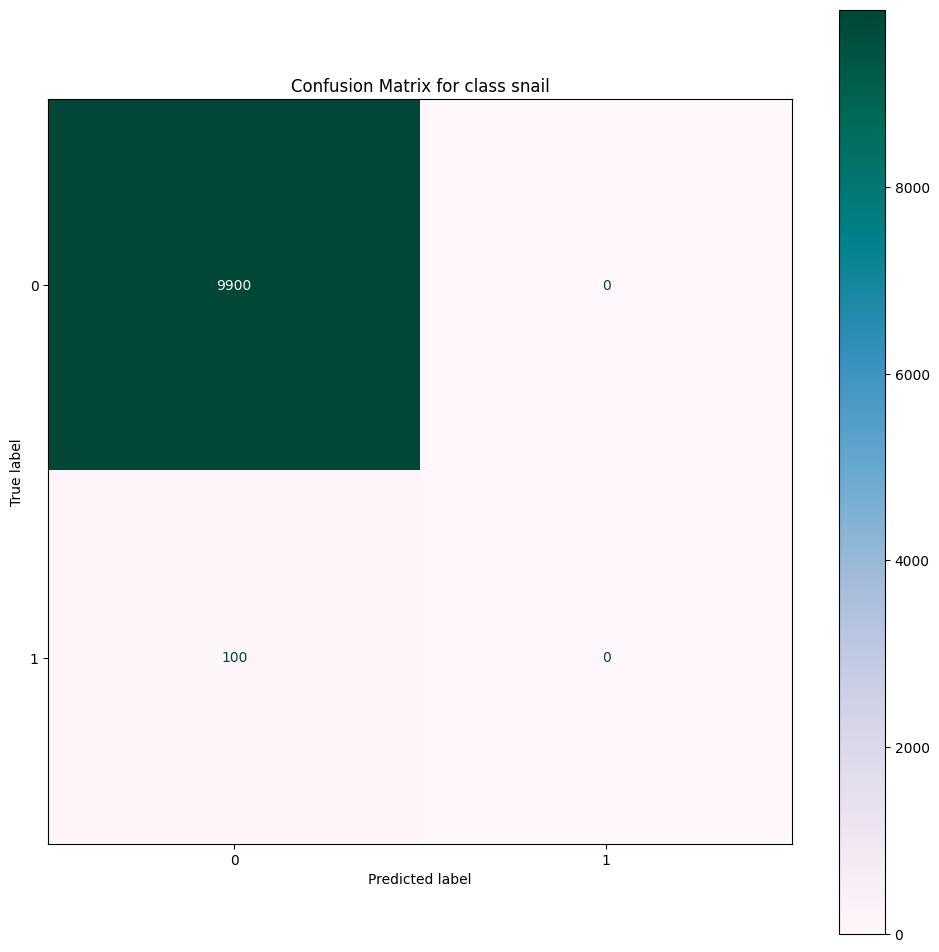

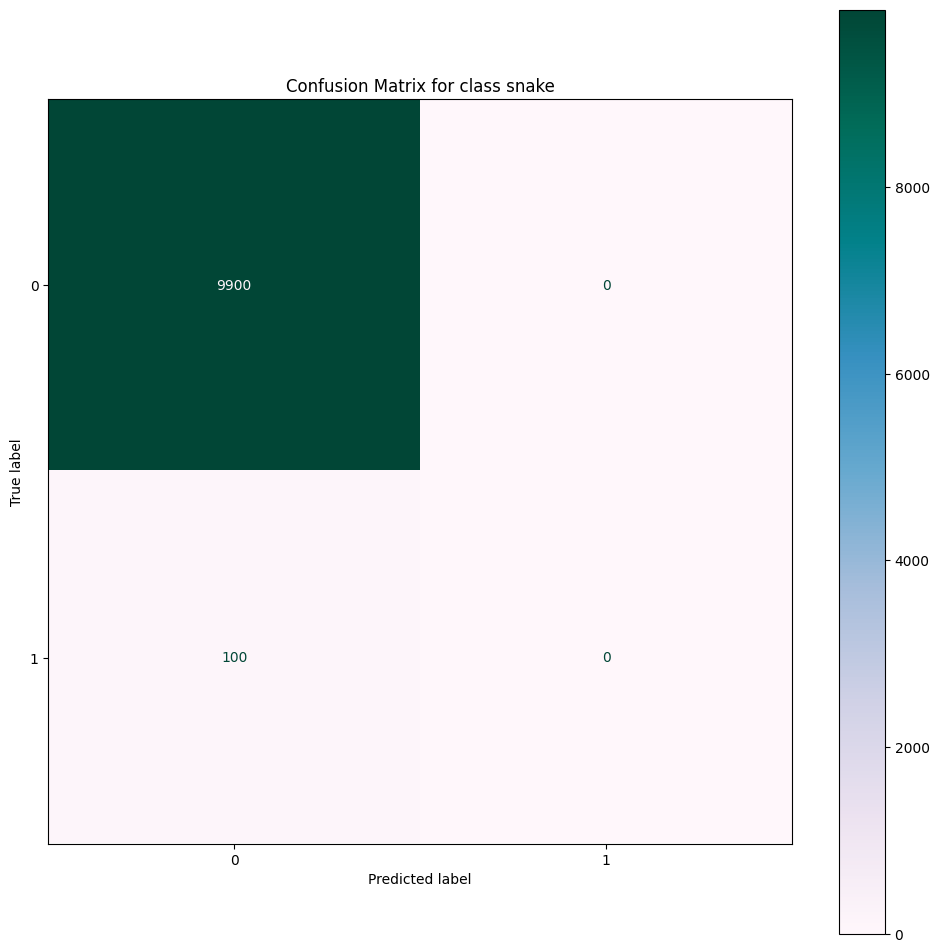

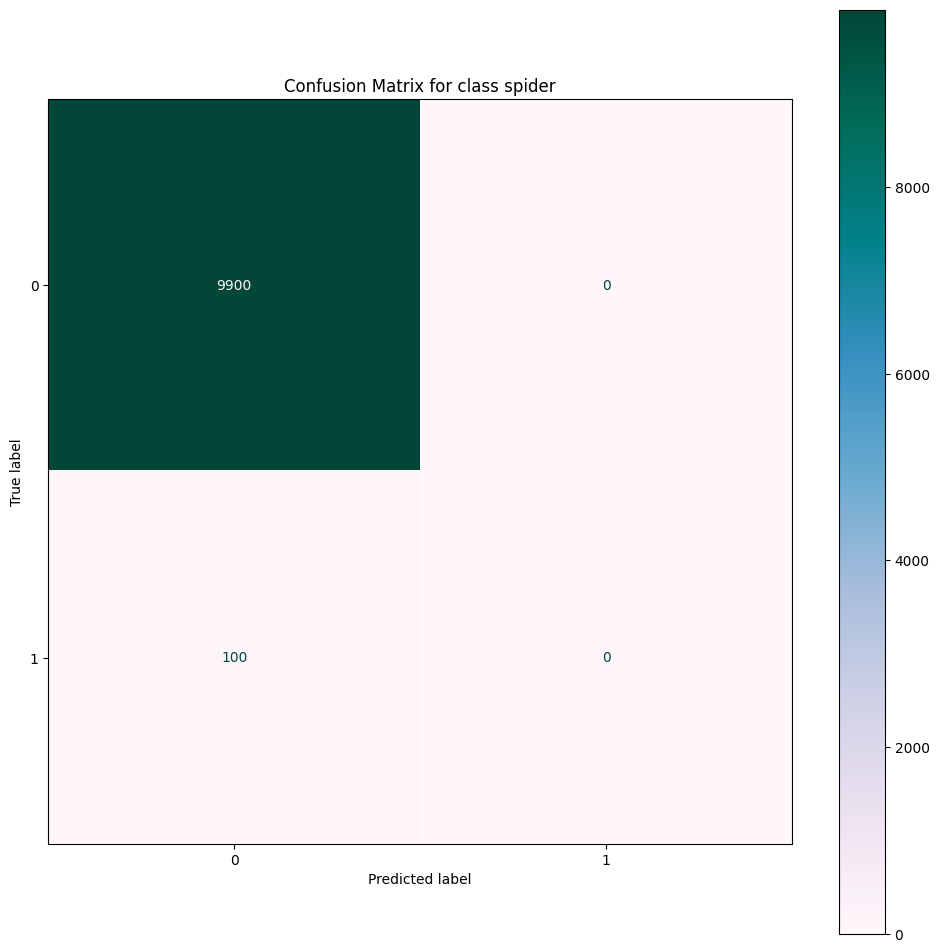

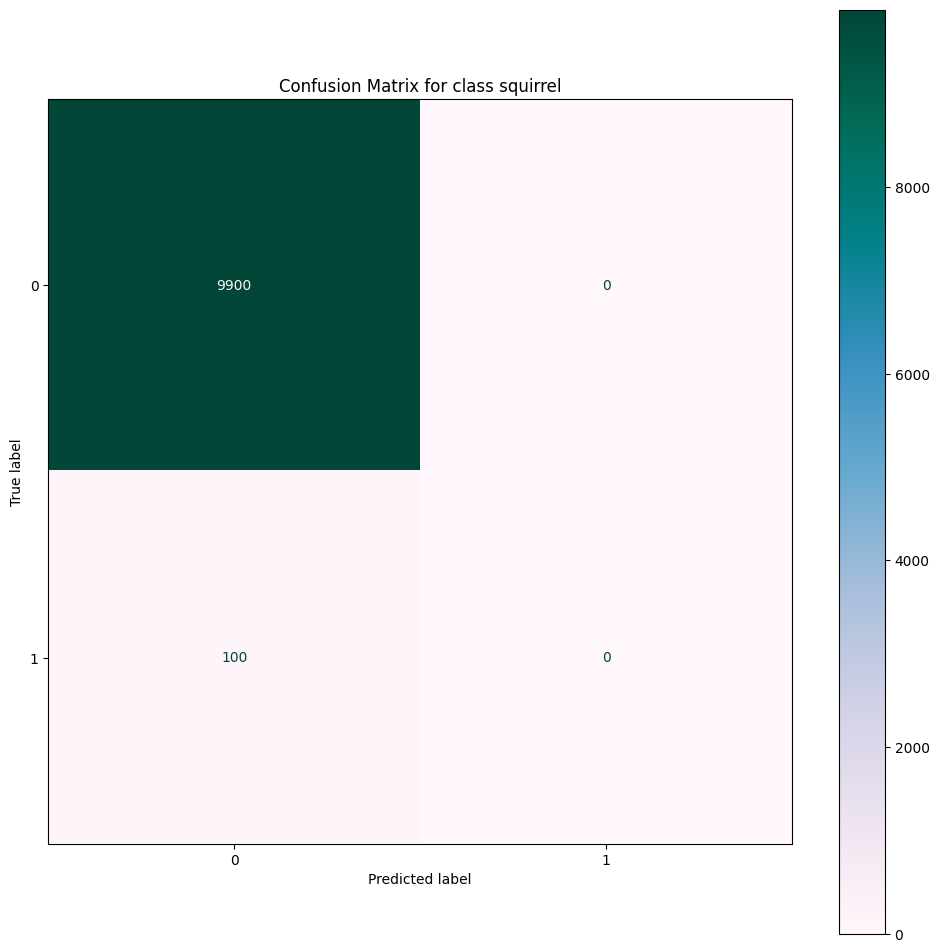

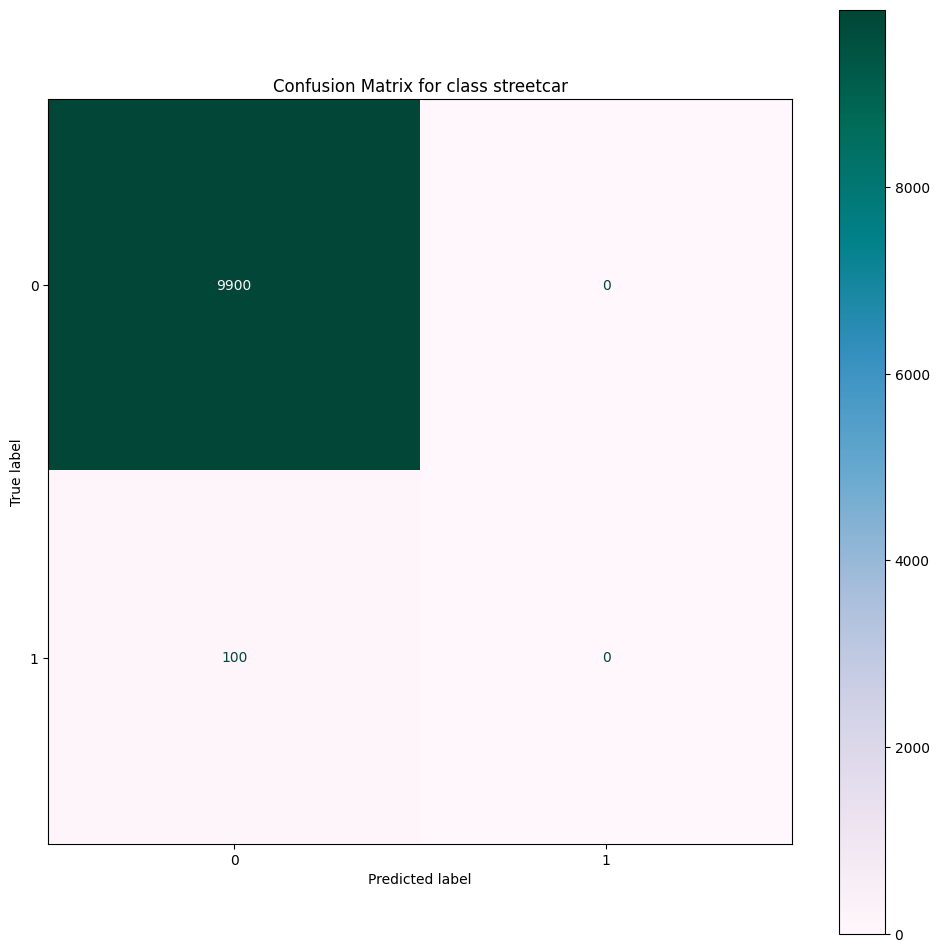

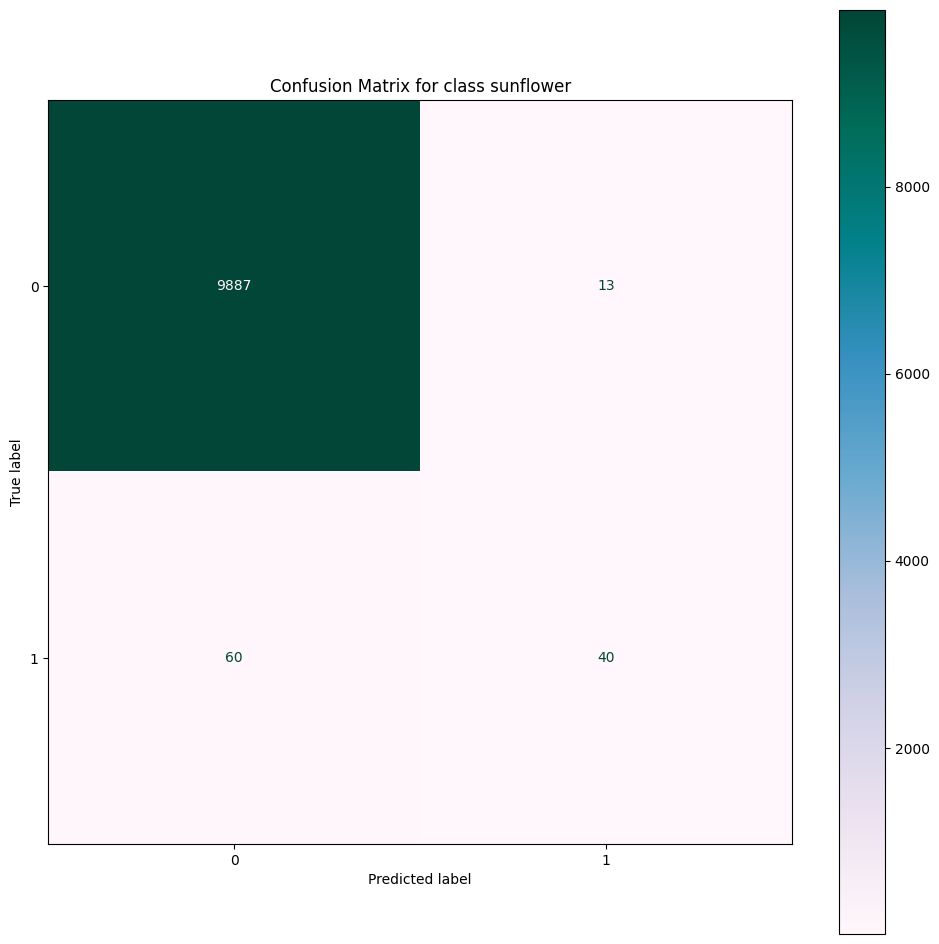

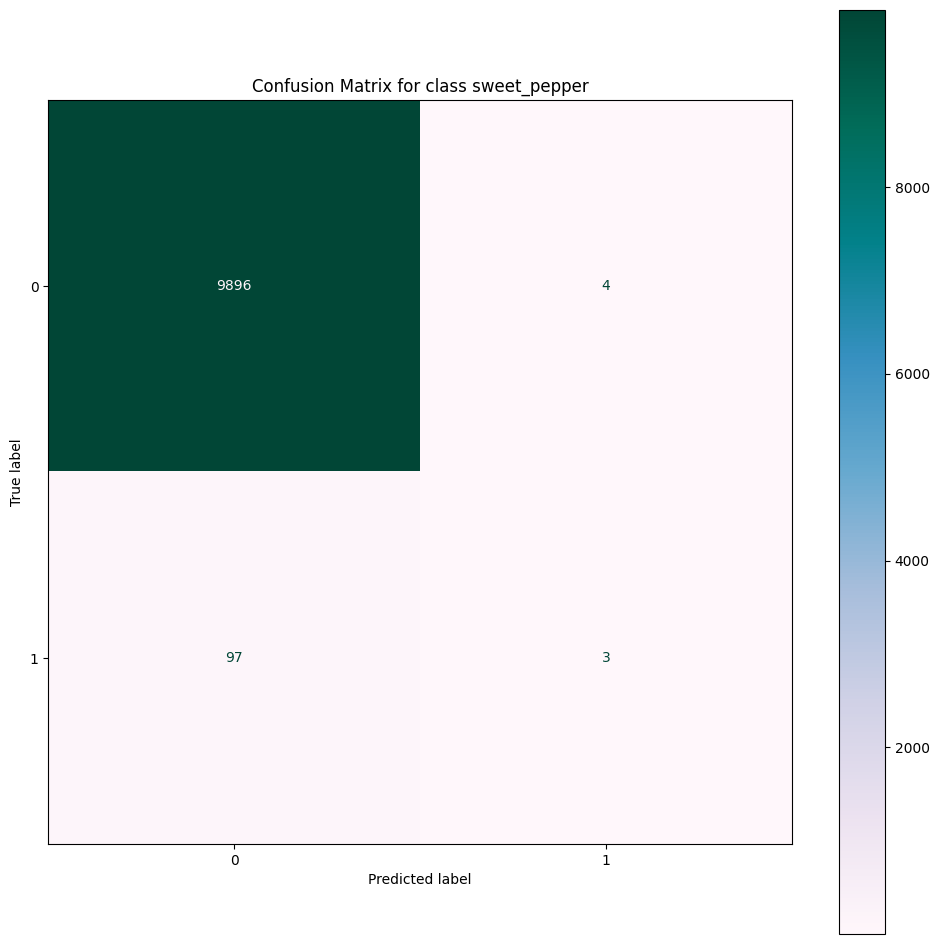

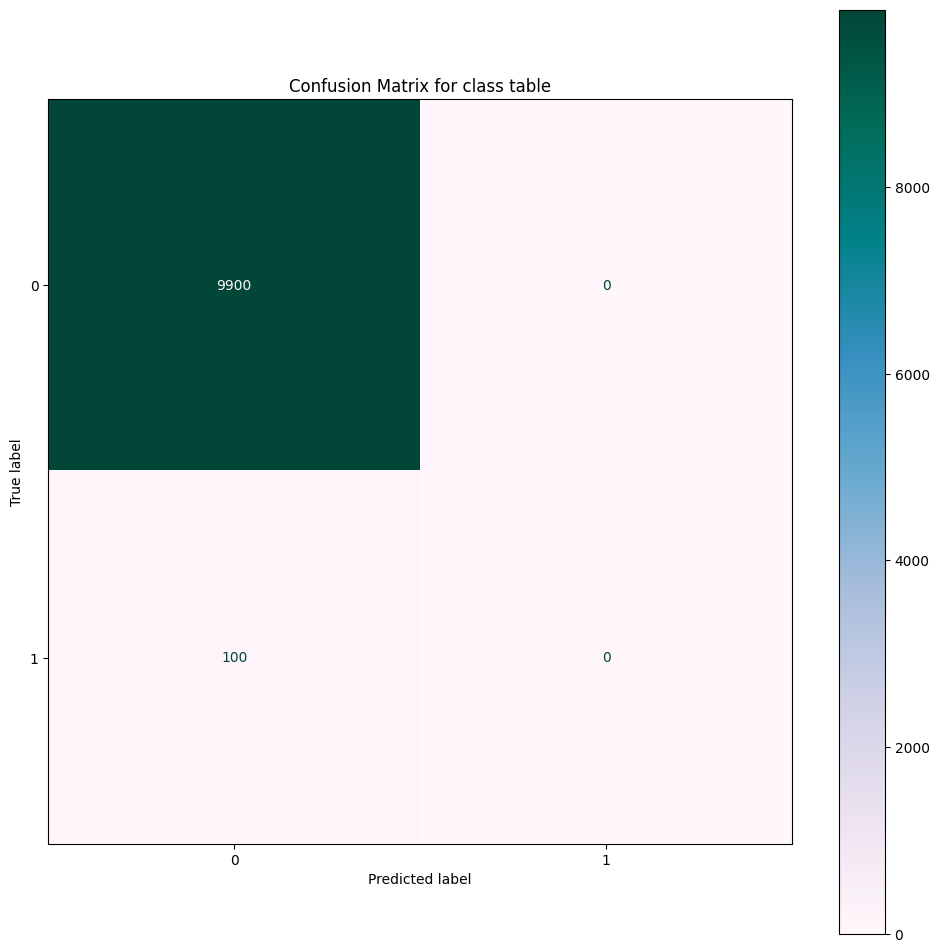

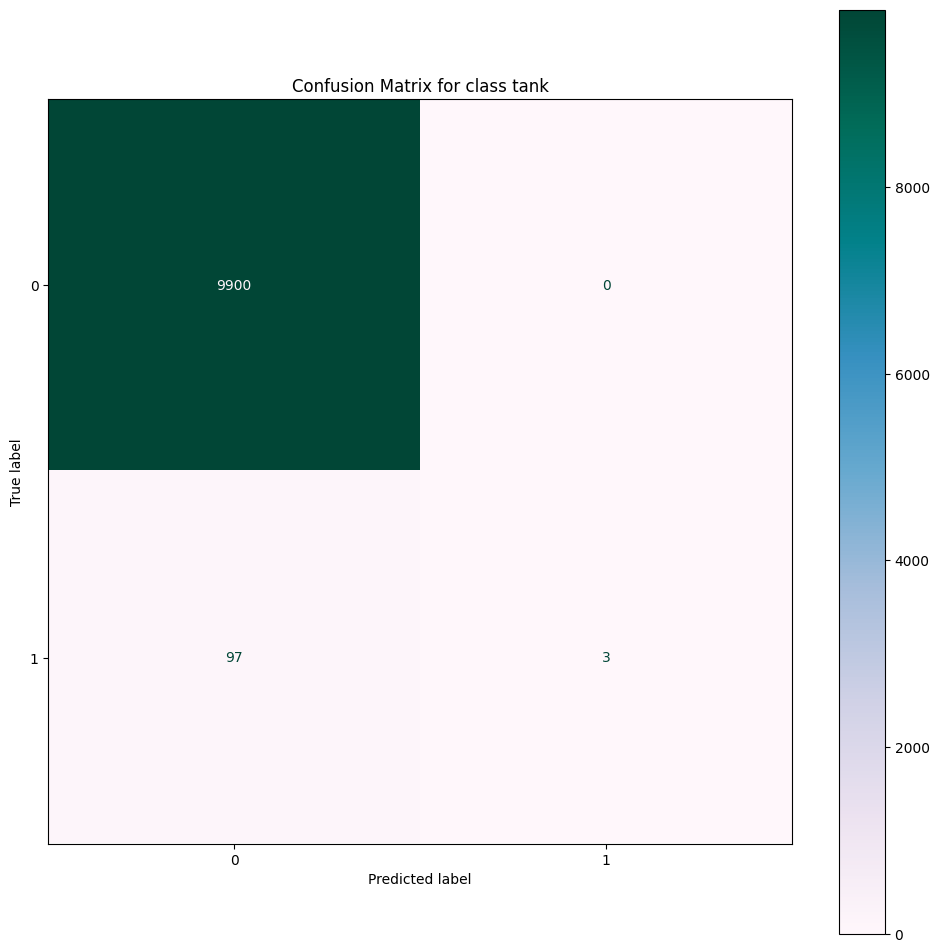

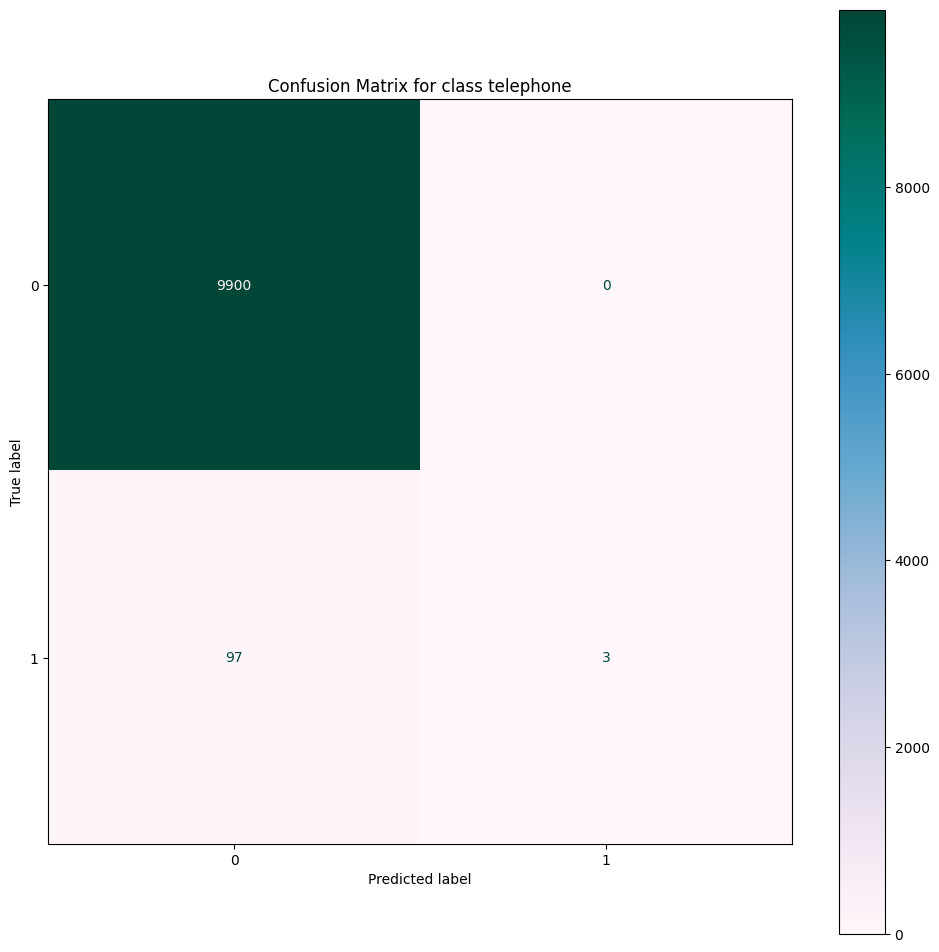

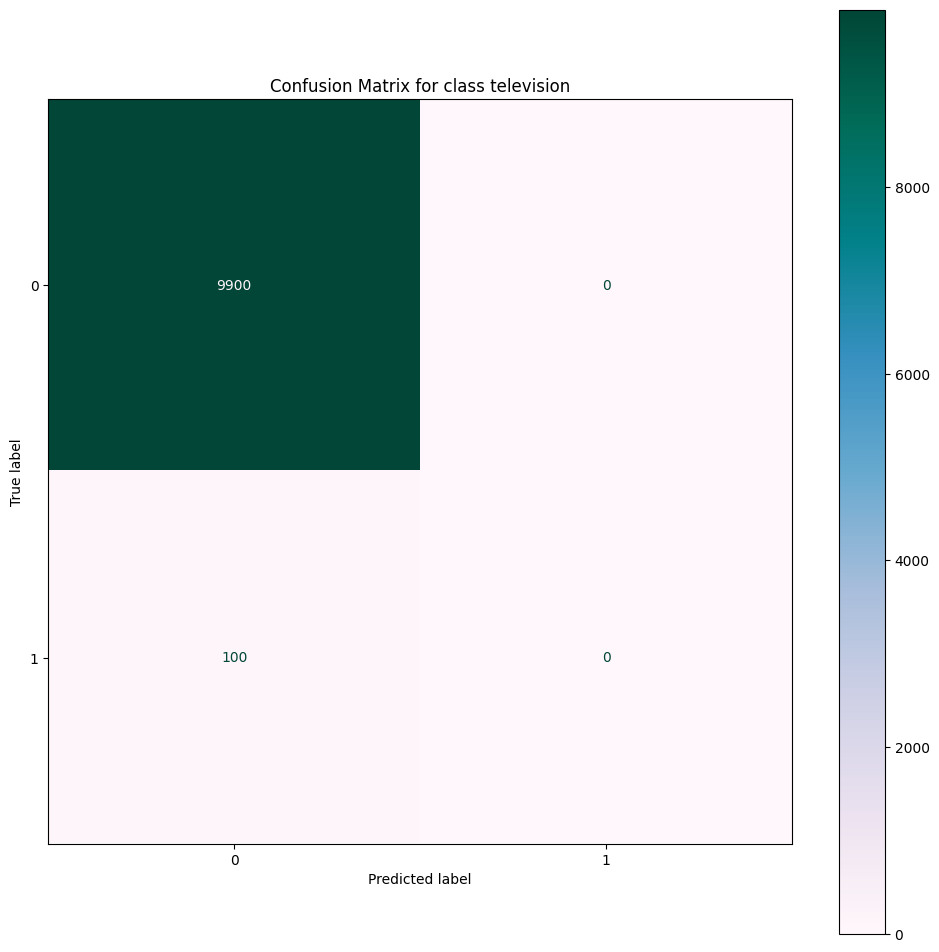

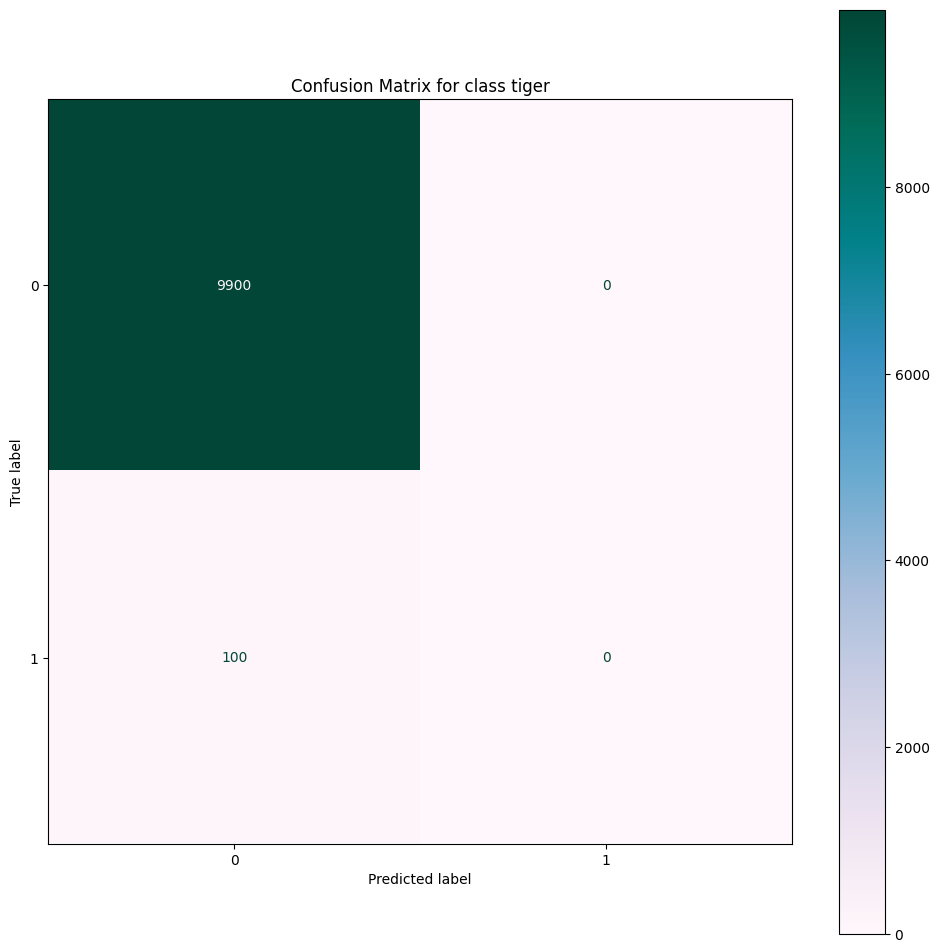

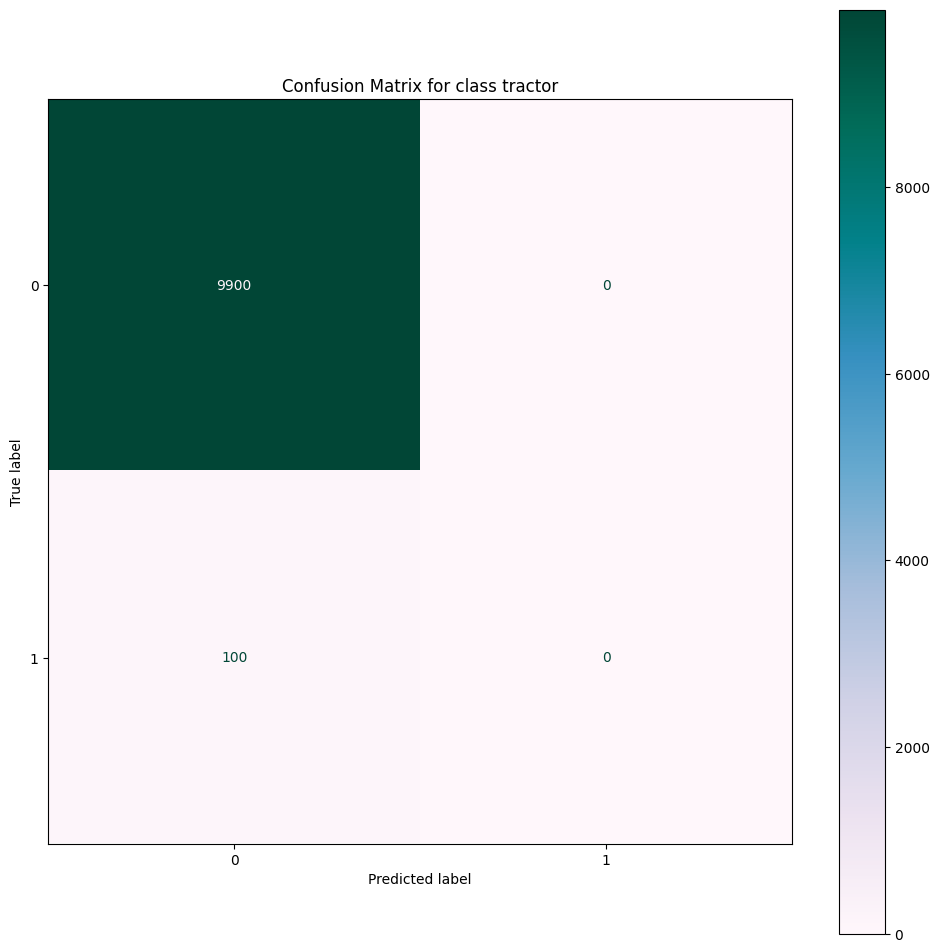

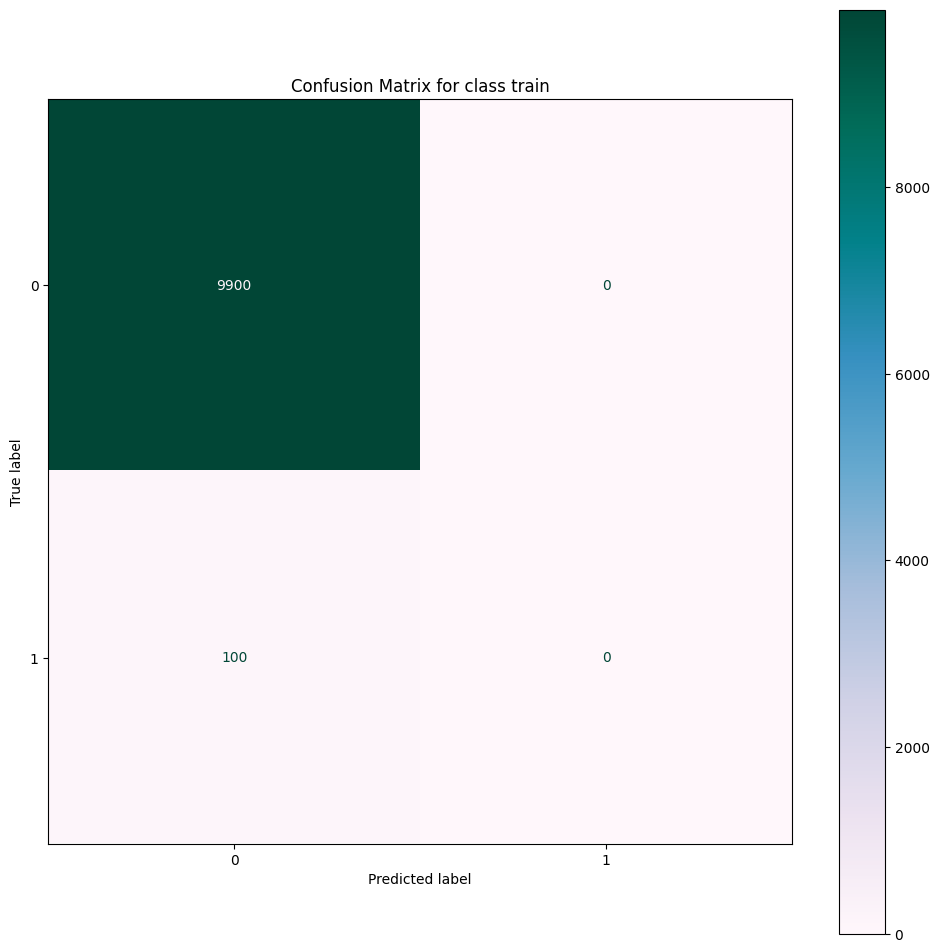

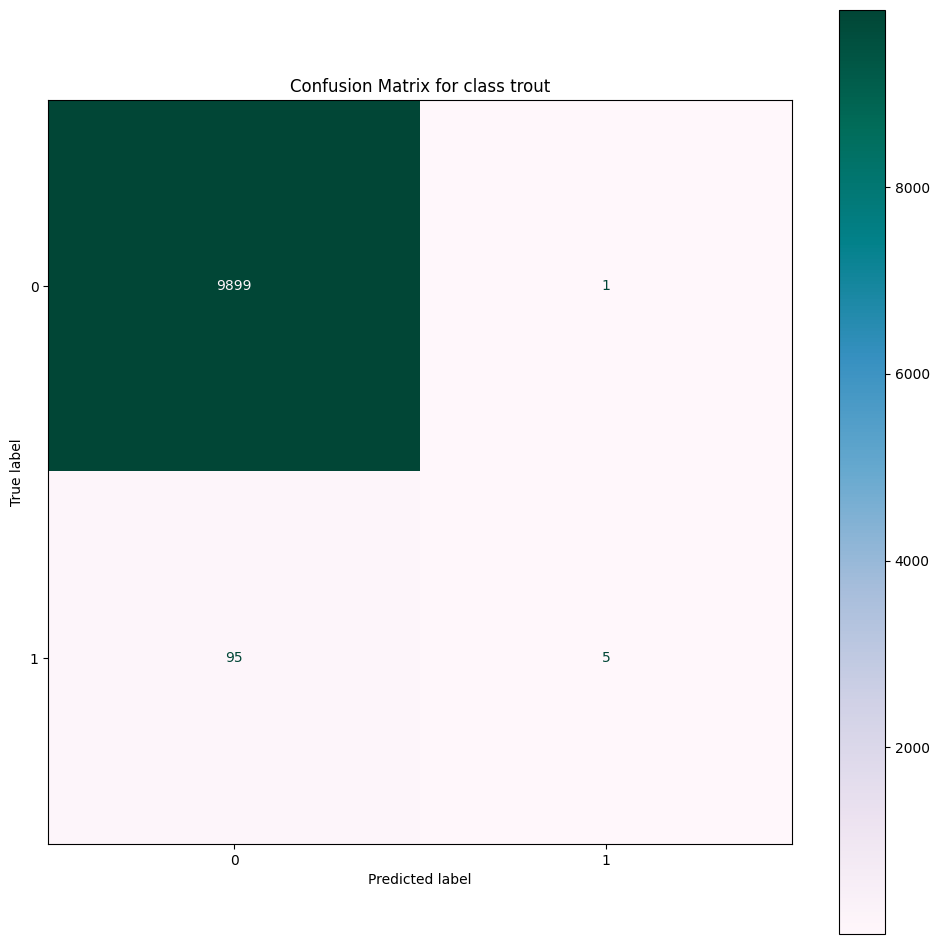

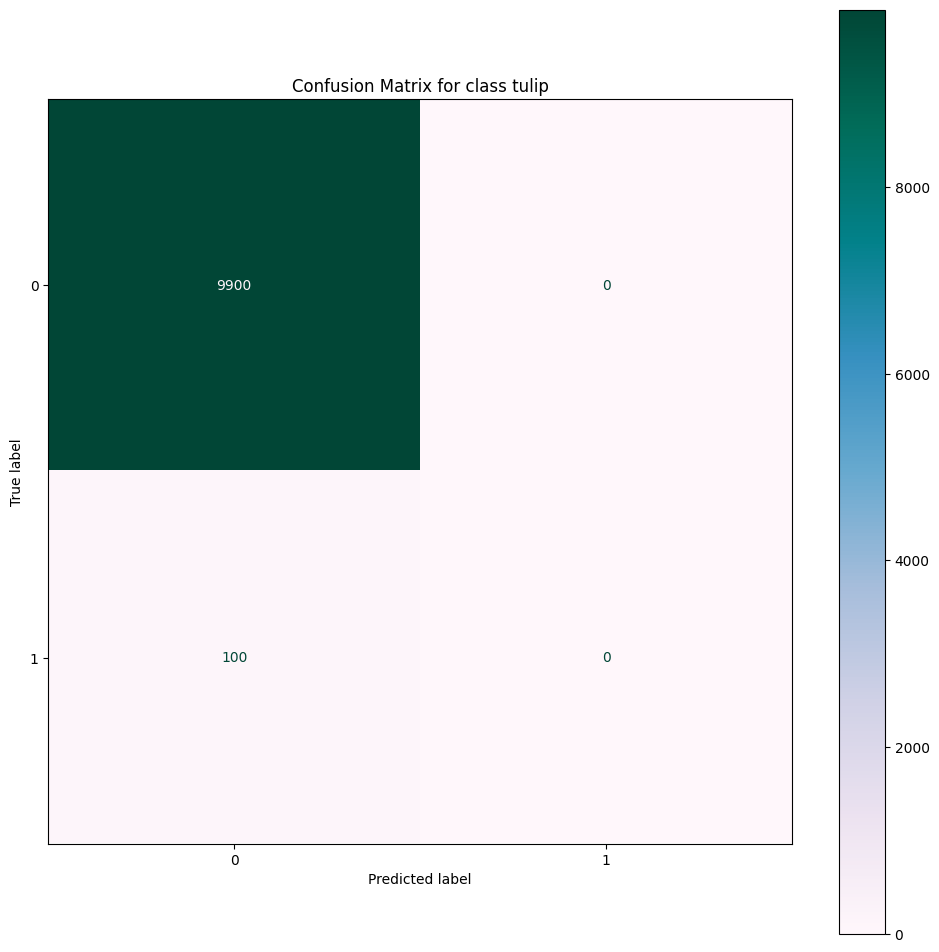

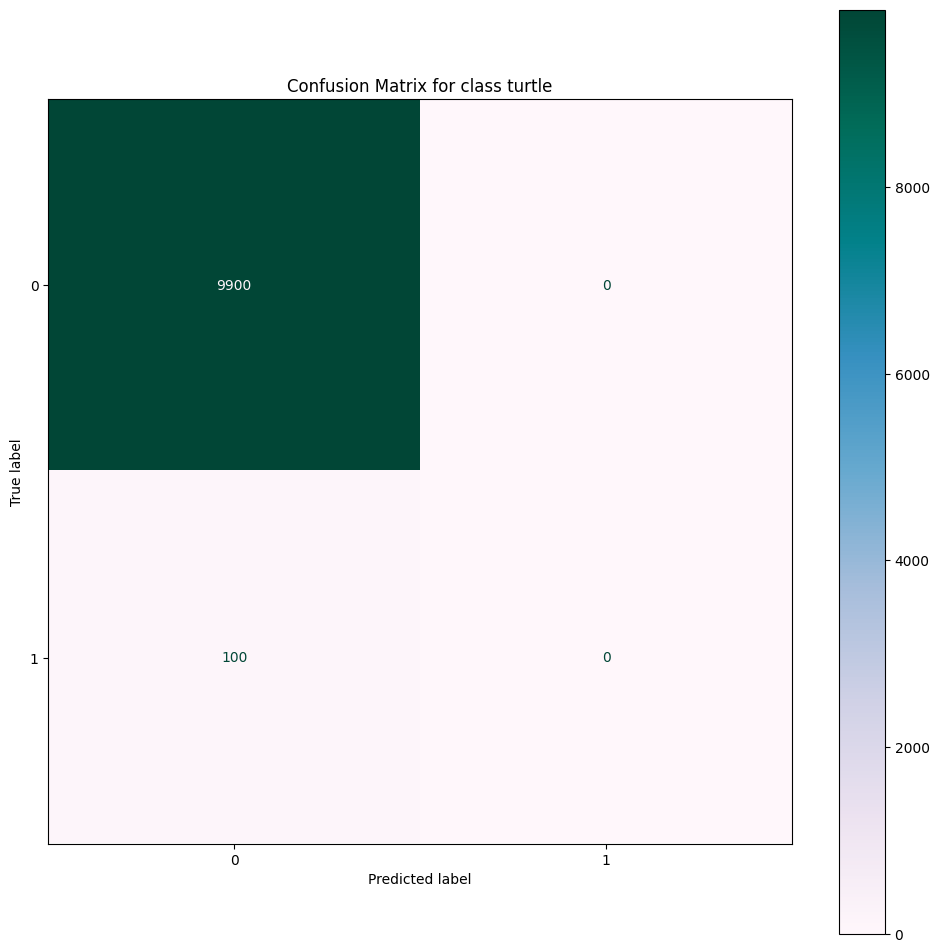

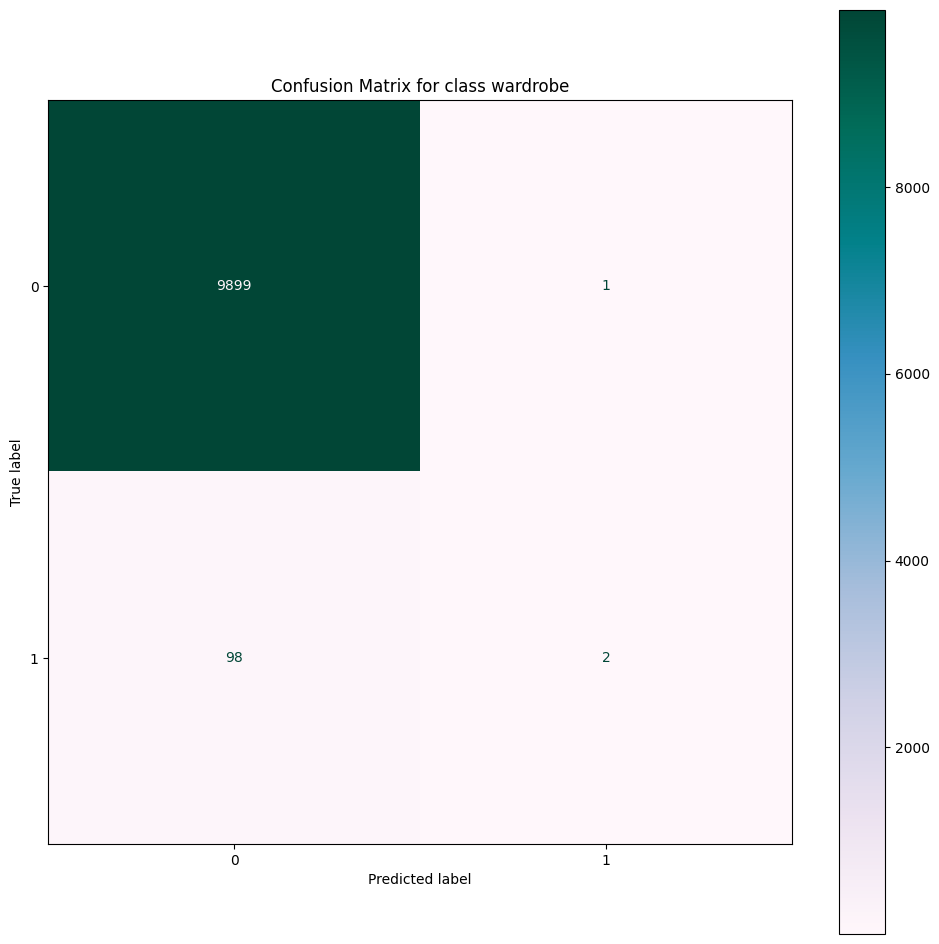

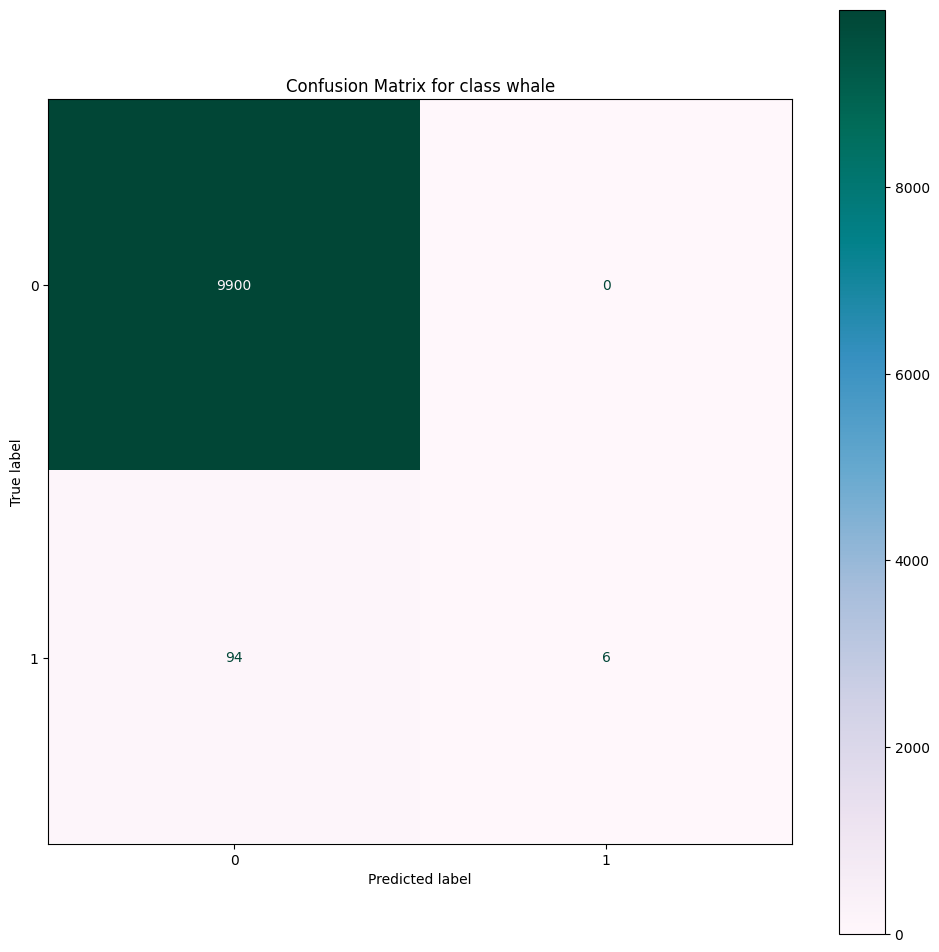

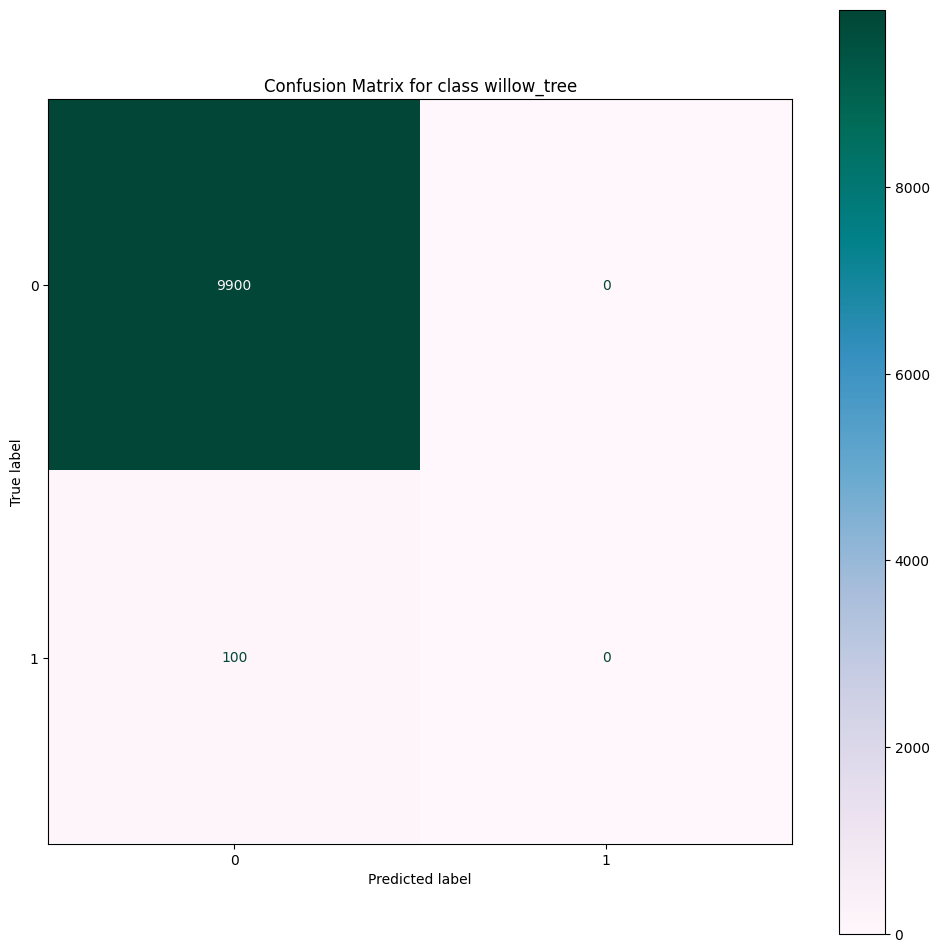

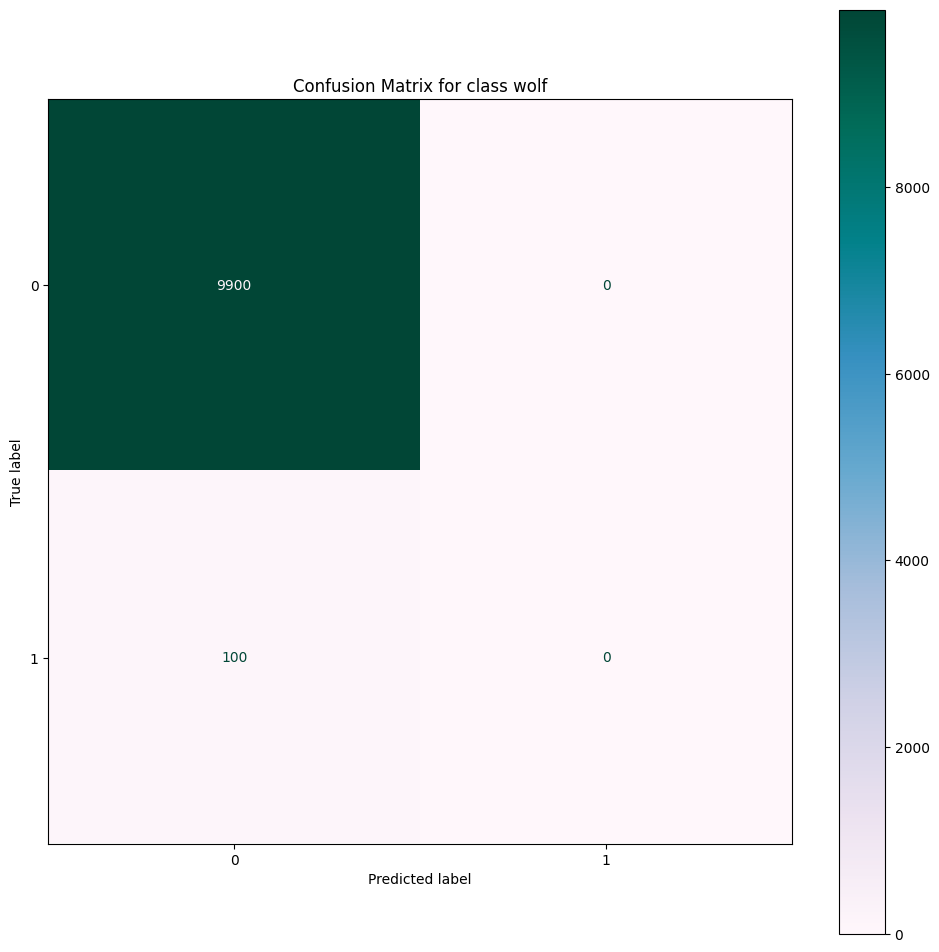

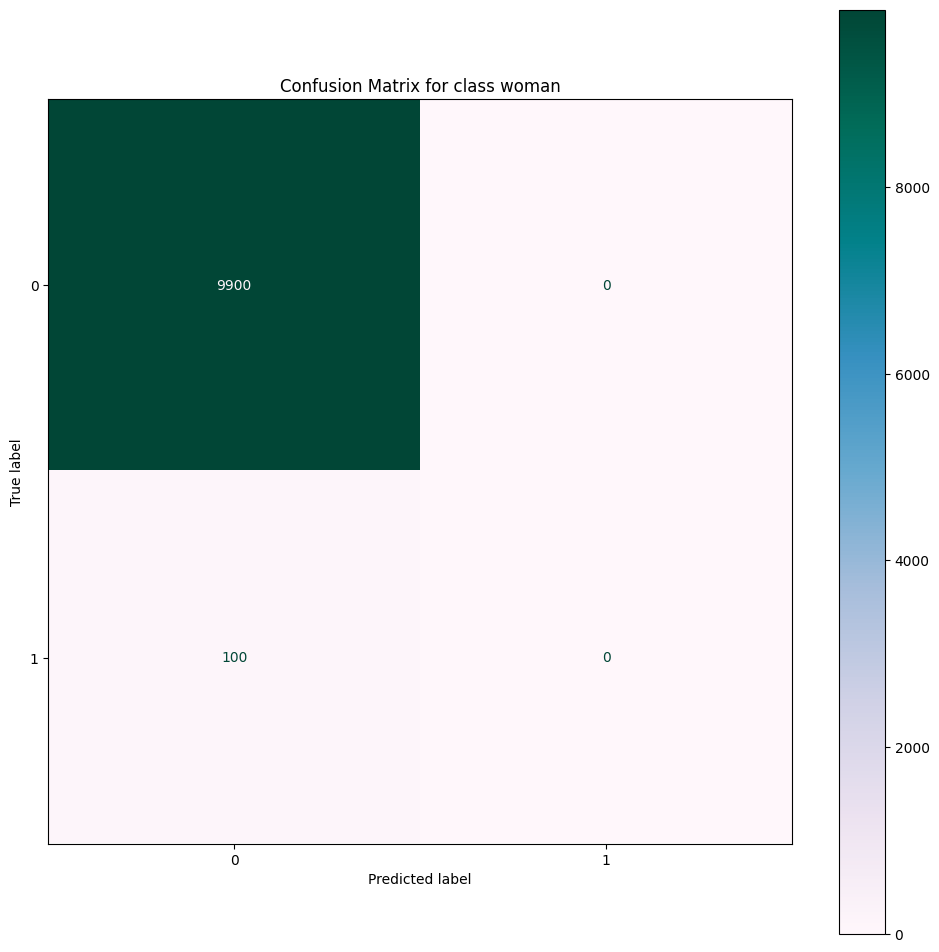

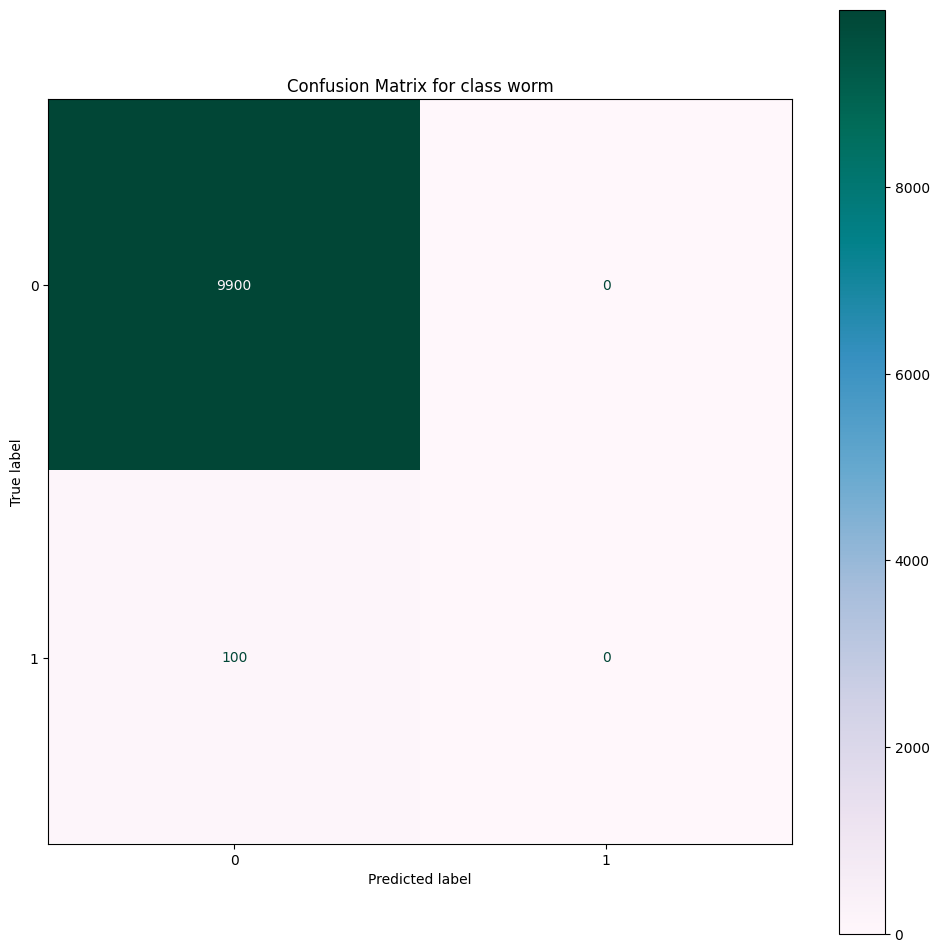

In [ ]:
plt.rcParams['figure.figsize'] = (12,12)
y_pred = model.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

multilabel_confusion = multilabel_confusion_matrix(y_test, y_pred_binary)
for i in range(len(classes)):
    class_name = classes[i]
    confusion_matrix_i = multilabel_confusion[i]
    vis = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_i, display_labels=[0, 1])
    vis.plot(cmap=plt.cm.PuBuGn)
    plt.title(f'Confusion Matrix for class {class_name}')
    plt.show()